<a href="https://colab.research.google.com/github/KeshvanMV/GTD-WHR-Analysis/blob/main/GTD_WHR_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

This project explores the intriguing relationship between societal happiness and the incidence of terrorism. By analyzing data from the Global Terrorism Database (GTD) and the World Happiness Report (WHR), we aim to uncover patterns and insights into whether a nation's well-being can act as a deterrent against extremism.

## **Motivation**

The motivation behind this project stems from the observation that some countries experience significantly lower rates of terrorism than others. We hypothesize that societal factors, particularly happiness levels, might play a crucial role in influencing a nation's vulnerability to terrorism.

## **Data Sources**

The project leverages two comprehensive datasets:

- **Global Terrorism Database (GTD):** Provides detailed records of over 180,000 terrorist incidents worldwide, encompassing information on attack locations, targets, perpetrators, and casualties.
- **World Happiness Report (WHR):** Offers insights into national happiness levels based on various factors such as GDP per capita, social support, life expectancy, and freedom.

## **Objectives**

The primary objectives of this project are:

- To investigate the correlation between national happiness scores and the frequency of terrorist attacks.
- To identify potential societal factors that contribute to a nation's resilience against terrorism.
- To contribute to a better understanding of the complex dynamics between societal well-being and extremism.

## **Methodology**

The project employs a data-driven approach, involving data cleaning, merging, and statistical analysis. We will:

- Clean and preprocess the GTD and WHR datasets to ensure data quality and consistency.
- Merge the datasets based on country and year to enable comparative analysis.
- Conduct statistical analysis, including correlation analysis and regression modeling, to explore the relationship between happiness and terrorism.

## **Expected Outcomes**

We anticipate that this project will shed light on the intricate relationship between societal happiness and terrorism. The findings could potentially inform policies aimed at promoting peace and security by addressing underlying societal factors that contribute to extremism.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub

# Download the Global Terrorism Database
path_gtd = kagglehub.dataset_download("START-UMD/gtd")
print("Path to Global Terrorism Database files:", path_gtd)

# Download the World Happiness Report
path_whr = kagglehub.dataset_download("usamabuttar/world-happiness-report-2005-present")
print("Path to World Happiness Report files:", path_whr)


100%|██████████| 28.7M/28.7M [00:01<00:00, 23.1MB/s]

Extracting files...


Path to Global Terrorism Database files: /root/.cache/kagglehub/datasets/START-UMD/gtd/versions/3


100%|██████████| 123k/123k [00:00<00:00, 580kB/s]

Extracting files...
Path to World Happiness Report files: /root/.cache/kagglehub/datasets/usamabuttar/world-happiness-report-2005-present/versions/1


In [ ]:
import os

# List files in the Global Terrorism Database directory
files_gtd = os.listdir(path_gtd)
print("Files in Global Terrorism Database directory:", files_gtd)

# List files in the World Happiness Report directory
files_whr = os.listdir(path_whr)
print("Files in World Happiness Report directory:", files_whr)


Files in Global Terrorism Database directory: ['globalterrorismdb_0718dist.csv']
Files in World Happiness Report directory: ['World Happiness Report.csv']


In [ ]:
# Read the Global Terrorism Database CSV file with specified encoding
gtd_data = pd.read_csv(os.path.join(path_gtd, 'globalterrorismdb_0718dist.csv'), encoding='ISO-8859-1')

# Read the World Happiness Report CSV file with specified encoding
whr_data = pd.read_csv(os.path.join(path_whr, 'World Happiness Report.csv'), encoding='ISO-8859-1')


In [ ]:
gtd_data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [ ]:
whr_data.head()

Country Name Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
0  Afghanistan         South Asia  2008     3.723590            7.350416   
1  Afghanistan         South Asia  2009     4.401778            7.508646   
2  Afghanistan         South Asia  2010     4.758381            7.613900   
3  Afghanistan         South Asia  2011     3.831719            7.581259   
4  Afghanistan         South Asia  2012     3.782938            7.660506   

   Social Support  Healthy Life Expectancy At Birth  \
0        0.450662                         50.500000   
1        0.552308                         50.799999   
2        0.539075                         51.099998   
3        0.521104                         51.400002   
4        0.520637                         51.700001   

   Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
0                      0.718114    0.167652                   0.881686   
1                      0.678896    0.190809                   0.850035   
2                      0.600127    0.121316                   0.706766   
3                      0.495901    0.163571                   0.731109   
4                      0.530935    0.237588                   0.775620   

   Positive Affect  Negative Affect  Confidence In National Government  
0         0.414297         0.258195                           0.612072  
1         0.481421         0.237092                           0.611545  
2         0.516907         0.275324                           0.299357  
3         0.479835         0.267175                           0.307386  
4         0.613513         0.267919                           0.435440

In [ ]:
# Renaming columns by replacing spaces with underscores
whr_data.rename(columns={
    'Country Name': 'Country_Name',
    'Regional Indicator': 'Regional_Indicator',
    'Year': 'Year',
    'Life Ladder': 'Life_Ladder',
    'Log GDP Per Capita': 'Log_GDP_Per_Capita',
    'Social Support': 'Social_Support',
    'Healthy Life Expectancy At Birth': 'Healthy_Life_Expectancy_At_Birth',
    'Freedom To Make Life Choices': 'Freedom_To_Make_Life_Choices',
    'Generosity': 'Generosity',
    'Perceptions Of Corruption': 'Perceptions_Of_Corruption',
    'Positive Affect': 'Positive_Affect',
    'Negative Affect': 'Negative_Affect',
    'Confidence In National Government': 'Confidence_In_National_Government'
}, inplace=True)

# Display the updated DataFrame to confirm
print("Updated column names are:")
print(whr_data.columns)


Updated column names are:
Index(['Country_Name', 'Regional_Indicator', 'Year', 'Life_Ladder',
       'Log_GDP_Per_Capita', 'Social_Support',
       'Healthy_Life_Expectancy_At_Birth', 'Freedom_To_Make_Life_Choices',
       'Generosity', 'Perceptions_Of_Corruption', 'Positive_Affect',
       'Negative_Affect', 'Confidence_In_National_Government'],
      dtype='object')


In [ ]:
# Display columns with null values
null_columns = gtd_data.columns[gtd_data.isnull().any()]
null_data = gtd_data[null_columns].isnull().sum()
null_data

approxdate    172452
resolution    179471
provstate        421
city             435
latitude        4556
               ...  
addnotes      153402
scite1         66191
scite2        104758
scite3        138175
related       156653
Length: 106, dtype: int64

In [ ]:
gtd_data.shape

(181691, 135)

In [ ]:
whr_data.shape

(2199, 13)

In [ ]:
# Filter data where Year is between 2005 and 2017
gt = gtd_data[(gtd_data['iyear'] >= 2005) & (gtd_data['iyear'] <= 2017)]
gt.shape  # Display the first few rows of the filtered dataframe


(104358, 135)

In [ ]:
# Get the total number of unique countries in whr_data
total_unique_countries_whr = whr_data['Country_Name'].nunique()
print("Total unique countries in World Happiness Report:", total_unique_countries_whr)


Total unique countries in World Happiness Report: 165


In [ ]:
# Get the total number of unique countries in gt
total_unique_countries_gt = gt['country_txt'].nunique()
print("Total unique countries in Global Terrorism Database:", total_unique_countries_gt)


Total unique countries in Global Terrorism Database: 158


In [ ]:
whr = whr_data.copy()

In [ ]:
whr['Country_Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 

In [ ]:
# Get unique countries from both datasets
whr_countries = set(whr_data['Country_Name'].unique())
gt_countries = set(gt['country_txt'].unique())

# Find countries that are not common
not_common_whr = whr_countries - gt_countries
not_common_gt = gt_countries - whr_countries

# Create DataFrames to display the results
not_common_whr_df = pd.DataFrame({
    'Country': list(not_common_whr),
    'In WHR': [1] * len(not_common_whr),
    'In GT': [0] * len(not_common_whr)
})

not_common_gt_df = pd.DataFrame({
    'Country': list(not_common_gt),
    'In WHR': [0] * len(not_common_gt),
    'In GT': [1] * len(not_common_gt)
})

# Combine the DataFrames
not_common_df = pd.concat([not_common_whr_df, not_common_gt_df], ignore_index=True)

# Display the DataFrame
print(not_common_df)


                             Country  In WHR  In GT
0                           Suriname       1      0
1                           Botswana       1      0
2                             Gambia       1      0
3                            Namibia       1      0
4                           Slovakia       1      0
5           Taiwan Province of China       1      0
6          Hong Kong S.A.R. of China       1      0
7                Congo (Brazzaville)       1      0
8             Bosnia and Herzegovina       1      0
9                            Comoros       1      0
10                 Somaliland region       1      0
11                         Lithuania       1      0
12                        Luxembourg       1      0
13                   North Macedonia       1      0
14                          Slovenia       1      0
15                           Czechia       1      0
16                           Turkiye       1      0
17                  Congo (Kinshasa)       1      0
18          

In [ ]:
# Get unique countries from both datasets
whr_countries = set(whr['Country_Name'].unique())
gt_countries = set(gt['country_txt'].unique())

# Find mismatched country names
mismatched_whr = whr_countries - gt_countries
mismatched_gt = gt_countries - whr_countries

print("Mismatched countries in WHR:", mismatched_whr)
print("Mismatched countries in GT:", mismatched_gt)


Mismatched countries in WHR: {'Suriname', 'Botswana', 'Gambia', 'Namibia', 'Slovakia', 'Taiwan Province of China', 'Hong Kong S.A.R. of China', 'Congo (Brazzaville)', 'Bosnia and Herzegovina', 'Comoros', 'Somaliland region', 'Lithuania', 'Luxembourg', 'North Macedonia', 'Slovenia', 'Czechia', 'Turkiye', 'Congo (Kinshasa)', 'Costa Rica', 'Mongolia', 'Mauritius', 'Singapore', 'El Salvador', 'Oman', 'Eswatini', 'State of Palestine'}
Mismatched countries in GT: {'Bahamas', 'West Bank and Gaza Strip', 'Democratic Republic of the Congo', 'Bosnia-Herzegovina', 'Taiwan', 'Serbia-Montenegro', 'Hong Kong', 'Papua New Guinea', 'Republic of the Congo', 'Macedonia', 'Slovak Republic', 'Turkey', 'Eritrea', 'Western Sahara', 'Czech Republic', 'Swaziland', 'East Timor', 'Guinea-Bissau', 'Equatorial Guinea'}


In [ ]:
# Create a mapping of mismatched country names
country_name_mapping = {
    'United States': 'United States',
    'South Korea': 'South Korea',
    'North Korea': 'North Korea',
    'Russia': 'Russian Federation',
    'Iran': 'Iran',
    'Viet Nam': 'Vietnam',
    'Syria': 'Syrian Arab Republic',
    'Czechia': 'Czech Republic',
    'Laos': "Lao People's Democratic Republic",
    'Ivory Coast': "Côte d'Ivoire",
    'Congo (Kinshasa)': 'Democratic Republic of the Congo',
    'Congo (Brazzaville)': 'Republic of the Congo',
    'Eswatini': 'Swaziland',
    'Turkiye': 'Turkey',
    'State of Palestine': 'Palestine',
    'North Macedonia': 'Macedonia',
    'Hong Kong S.A.R. of China': 'Hong Kong',
    'Taiwan Province of China': 'Taiwan'
}

# Apply the mapping to the WHR dataset
whr['Country_Name'] = whr['Country_Name'].replace(country_name_mapping)

# Verify the changes
whr_countries_updated = set(whr_data['Country_Name'].unique())
mismatched_whr_updated = whr_countries_updated - gt_countries

print("Updated mismatched countries in WHR:", mismatched_whr_updated)


Updated mismatched countries in WHR: {'Suriname', 'Botswana', 'Gambia', 'Namibia', 'Slovakia', 'Taiwan Province of China', 'Hong Kong S.A.R. of China', 'Congo (Brazzaville)', 'Bosnia and Herzegovina', 'Comoros', 'Somaliland region', 'Lithuania', 'Luxembourg', 'North Macedonia', 'Slovenia', 'Czechia', 'Turkiye', 'Congo (Kinshasa)', 'Costa Rica', 'Mongolia', 'Mauritius', 'Singapore', 'El Salvador', 'Oman', 'Eswatini', 'State of Palestine'}


In [ ]:
# Updated mapping of mismatched country names
country_name_mapping.update({
    'Slovenia': 'Slovenia',
    'Hong Kong S.A.R. of China': 'Hong Kong',
    'Oman': 'Oman',
    'Bosnia and Herzegovina': 'Bosnia-Herzegovina',
    'State of Palestine': 'West Bank and Gaza Strip',  # Assuming West Bank and Gaza Strip in GT
    'North Macedonia': 'Macedonia',
    'Namibia': 'Namibia',
    'Comoros': 'Comoros',
    'Taiwan Province of China': 'Taiwan',
    'Czechia': 'Czech Republic',
    'Slovakia': 'Slovakia',
    'Gambia': 'Gambia',
    'Turkiye': 'Turkey',
    'Luxembourg': 'Luxembourg',
    'Botswana': 'Botswana',
    'Eswatini': 'Swaziland',
    'Mauritius': 'Mauritius',
    'Mongolia': 'Mongolia',
    'Lithuania': 'Lithuania',
    'Congo (Kinshasa)': 'Democratic Republic of Congo',
    'Suriname': 'Suriname',
    'Congo (Brazzaville)': 'Republic of the Congo',
    'El Salvador': 'El Salvador',
    'Somaliland region': 'Somalia',  # Assuming it belongs to Somalia
    'Costa Rica': 'Costa Rica',
    'Singapore': 'Singapore'
})

# Apply the updated mapping to the WHR dataset
whr['Country_Name'] = whr['Country_Name'].replace(country_name_mapping)

# Verify the changes
whr_countries_updated = set(whr['Country_Name'].unique())
mismatched_whr_updated = whr_countries_updated - gt_countries

print("Updated mismatched countries in WHR:", mismatched_whr_updated)


Updated mismatched countries in WHR: {'Suriname', 'Botswana', 'Gambia', 'Namibia', 'Slovakia', 'Palestine', 'Comoros', 'Lithuania', 'Luxembourg', 'Slovenia', 'Syrian Arab Republic', 'Costa Rica', 'Russian Federation', 'Mongolia', "Lao People's Democratic Republic", 'Mauritius', 'Singapore', 'El Salvador', 'Oman', "Côte d'Ivoire"}


In [ ]:
# Further update the mapping of mismatched country names
country_name_mapping.update({
    'Slovenia': 'Slovenia',
    'Oman': 'Oman',
    'Namibia': 'Namibia',
    'Comoros': 'Comoros',
    'Palestine': 'West Bank and Gaza Strip',  # Assuming it should match this in GT
    'Russian Federation': 'Russia',
    'Slovakia': 'Slovakia',
    'Gambia': 'Gambia',
    'Syrian Arab Republic': 'Syria',
    'Luxembourg': 'Luxembourg',
    'Botswana': 'Botswana',
    'Mauritius': 'Mauritius',
    "Côte d'Ivoire": "Ivory Coast",
    'Mongolia': 'Mongolia',
    'Lithuania': 'Lithuania',
    'Suriname': 'Suriname',
    'El Salvador': 'El Salvador',
    "Lao People's Democratic Republic": 'Laos',
    'Costa Rica': 'Costa Rica',
    'Singapore': 'Singapore'
})

# Apply the updated mapping to the WHR dataset again
whr['Country_Name'] = whr['Country_Name'].replace(country_name_mapping)

# Verify the changes again
whr_countries_updated = set(whr['Country_Name'].unique())
mismatched_whr_updated = whr_countries_updated - gt_countries

print("Updated mismatched countries in WHR:", mismatched_whr_updated)


Updated mismatched countries in WHR: {'Slovenia', 'Suriname', 'Singapore', 'El Salvador', 'Oman', 'Comoros', 'Botswana', 'Costa Rica', 'Lithuania', 'Namibia', 'Gambia', 'Slovakia', 'Mongolia', 'Luxembourg', 'Mauritius'}


In [ ]:
# Final mismatched countries
mismatched_countries = ['Mongolia', 'Slovenia', 'Comoros', 'Costa Rica', 'El Salvador', 'Oman', 'Slovakia', 'Suriname', 'Gambia', 'Luxembourg', 'Botswana', 'Mauritius', 'Namibia', 'Singapore', 'Lithuania']

# Check if these countries are present in WHR dataset
mismatched_whr_presence = whr[whr['Country_Name'].isin(mismatched_countries)]
print("Mismatched countries in WHR presence check:\n", mismatched_whr_presence[['Country_Name']].drop_duplicates())

# Check if these countries are present in GT dataset
mismatched_gt_presence = gt[gt['country_txt'].isin(mismatched_countries)]
print("Mismatched countries in GT presence check:\n", mismatched_gt_presence[['country_txt']].drop_duplicates())


Mismatched countries in WHR presence check:
      Country_Name
229      Botswana
414       Comoros
443    Costa Rica
577   El Salvador
667        Gambia
1138    Lithuania
1155   Luxembourg
1252    Mauritius
1295     Mongolia
1355      Namibia
1485         Oman
1710    Singapore
1724     Slovakia
1737     Slovenia
1848     Suriname
Mismatched countries in GT presence check:
 Empty DataFrame
Columns: [country_txt]
Index: []


In [ ]:
whr1 = whr.copy()

In [ ]:
# List of countries to remove from WHR dataset
countries_to_remove = ['Mongolia', 'Slovenia', 'Comoros', 'Costa Rica', 'El Salvador', 'Oman', 'Slovakia', 'Suriname', 'Gambia', 'Luxembourg', 'Botswana', 'Mauritius', 'Namibia', 'Singapore', 'Lithuania']

# Remove these countries from the WHR dataset
whr1 = whr1[~whr1['Country_Name'].isin(countries_to_remove)]



In [ ]:
# Get unique countries from the filtered WHR dataset
whr_countries_filtered = set(whr1['Country_Name'].unique())
gt_countries = set(gt['country_txt'].unique())

# Find mismatched country names after filtering
mismatched_whr_final = whr_countries_filtered - gt_countries
mismatched_gt_final = gt_countries - whr_countries_filtered

print("Countries in WHR but not in GT:", mismatched_whr_final)
print("Countries in GT but not in WHR:", mismatched_gt_final)


Countries in WHR but not in GT: set()
Countries in GT but not in WHR: {'Serbia-Montenegro', 'Bahamas', 'Papua New Guinea', 'Guinea-Bissau', 'Slovak Republic', 'Western Sahara', 'Equatorial Guinea', 'Eritrea', 'East Timor'}


In [ ]:
gt1 = gt.copy()

In [ ]:
# List of countries to remove from GT dataset
countries_to_remove_from_gt = ['Guinea-Bissau', 'Equatorial Guinea', 'Eritrea', 'Slovak Republic', 'East Timor', 'Papua New Guinea', 'Western Sahara', 'Serbia-Montenegro', 'Bahamas']

# Remove these countries from the GT dataset
gt1 = gt[~gt['country_txt'].isin(countries_to_remove_from_gt)]



In [ ]:
# Get unique countries from the filtered WHR dataset
whr_countries_filtered = set(whr1['Country_Name'].unique())
gt_countries = set(gt1['country_txt'].unique())

# Find mismatched country names after filtering
mismatched_whr_final = whr_countries_filtered - gt_countries
mismatched_gt_final = gt_countries - whr_countries_filtered

print("Countries in WHR but not in GT:", mismatched_whr_final)
print("Countries in GT but not in WHR:", mismatched_gt_final)


Countries in WHR but not in GT: set()
Countries in GT but not in WHR: set()


In [ ]:
missing_percentages = (gt1.isnull().sum() / len(gt1)) * 100
print(missing_percentages.sort_values(ascending=False))


weapsubtype4_txt    99.996166
weaptype4_txt       99.996166
weaptype4           99.996166
weapsubtype4        99.996166
gsubname3           99.981787
                      ...    
dbsource             0.000000
INT_LOG              0.000000
INT_IDEO             0.000000
INT_MISC             0.000000
INT_ANY              0.000000
Length: 135, dtype: float64


So to view all the missing value

In [ ]:
# Initialize a DataFrame to store the result with additional index column
table = pd.DataFrame(index=range(45))

# Calculate the percentage of missing values for each column
missing_percentages = (gt1.isnull().sum() / len(gt1)) * 100

# Sort the missing percentages in descending order
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)

# Calculate the number of groups of 45 columns
num_groups = (len(sorted_missing_percentages.index) + 44) // 45

# Create columns for column names and missing percentages
for i in range(num_groups):
    start_index = i * 45
    end_index = min(start_index + 45, len(sorted_missing_percentages))
    col_names = pd.Series(sorted_missing_percentages.index[start_index:end_index])
    missing_vals = sorted_missing_percentages.iloc[start_index:end_index]

    table[f'Col Names {i+1}'] = col_names.reset_index(drop=True)
    table[f'Group {i+1}'] = missing_vals.reset_index(drop=True)

# Add the index column
table.insert(0, 'Index', table.index + 1)

# Display the table
print(table)


    Index       Col Names 1    Group 1         Col Names 2    Group 2  \
0       1  weapsubtype4_txt  99.996166    weapsubtype2_txt  92.530890   
1       2     weaptype4_txt  99.996166           nreleased  92.045858   
2       3         weaptype4  99.996166          nhostkidus  91.904949   
3       4      weapsubtype4  99.996166      hostkidoutcome  91.876192   
4       5         gsubname3  99.981787  hostkidoutcome_txt  91.876192   
5       6        claimmode3  99.902227            nhostkid  91.864689   
6       7    claimmode3_txt  99.902227               corp2  91.841684   
7       8         gsubname2  99.880180           weaptype2  91.641345   
8       9            divert  99.879221       weaptype2_txt  91.641345   
9      10     kidhijcountry  99.831293         natlty2_txt  91.347066   
10     11       guncertain3  99.735437        targsubtype2  91.347066   
11     12            claim3  99.732561             natlty2  91.347066   
12     13            gname3  99.731603    targsubty

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentages = (gt1.isnull().sum() / len(gt1)) * 100

# Identify columns with more than 95% missing values
columns_to_drop = missing_percentages[missing_percentages > 95].index

# Drop these columns from gt1
gt1 = gt1.drop(columns=columns_to_drop)

# Display the remaining columns
print("Remaining columns in gt1 after dropping columns with more than 95% missing values:")
print(gt1.columns)


Remaining columns in gt1 after dropping columns with more than 95% missing values:
Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city',
       'latitude', 'longitude', 'specificity', 'vicinity', 'location',
       'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative',
       'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'targtype1',
       'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1',
       'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'gname', 'motive', 'guncertain1', 'individual', 'nperps', 'nperpcap',
       'claimed', 'claimmode', 'claimmode_txt', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'weaptype2', 'weaptype2_txt',
       'weapsubt

In [ ]:
gt2 = gt1.copy()

In [ ]:
# List of columns to drop
columns_to_drop = ['claimmode', 'claimmode_txt',
     'nhostkid', 'nhostkidus','hostkidoutcome', 'ransom', 'guncertain1', 'corp1', 'corp2',
    'scite1', 'scite2', 'scite3', 'eventid', 'multiple', 'doubtterr', 'extended', 'vicinity',
   'region_txt', 'country'
]
# 'weaptype4', 'gsubname3', 'claimmode3', 'ransomamt', 'ransomamtus', 'ransompaid', 'guncertain2', 'gsubname', 'gsubname2', 'weaptype4_txt', 'gsubname3_txt', 'claimmode3_txt'

# Drop the columns
gt2.drop(columns=columns_to_drop, inplace=True)

# Check the resulting dataset
print(f"Remaining columns: {gt2.columns}")


Remaining columns: Index(['iyear', 'imonth', 'iday', 'approxdate', 'country_txt', 'region',
       'provstate', 'city', 'latitude', 'longitude', 'specificity', 'location',
       'summary', 'crit1', 'crit2', 'crit3', 'alternative', 'alternative_txt',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2',
       'attacktype2_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'target2',
       'natlty2', 'natlty2_txt', 'gname', 'motive', 'individual', 'nperps',
       'nperpcap', 'claimed', 'weaptype1', 'weaptype1_txt', 'weapsubtype1',
       'weapsubtype1_txt', 'weaptype2', 'weaptype2_txt', 'weapsubtype2',
       'weapsubtype2_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'ndays',
       'hos

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentages = (gt2.isnull().sum() / len(gt2)) * 100

# Identify columns with more than 95% missing values
columns_to_drop = missing_percentages[missing_percentages > 95].index

# Drop these columns from gt2
gt2_filtered = gt2.drop(columns=columns_to_drop)

# Calculate the percentage of missing values for each remaining column in gt2_filtered
remaining_missing_percentages = (gt2_filtered.isnull().sum() / len(gt2_filtered)) * 100

# Sort the remaining missing percentages in descending order
sorted_missing_percentages = remaining_missing_percentages.sort_values(ascending=False)

# Determine the number of groups of 45 columns each
num_groups = (len(sorted_missing_percentages) + 19) // 20

# Create a DataFrame for the table with an additional index column
table = pd.DataFrame(index=range(20))

# Populate the table with column names and missing percentages
for i in range(num_groups):
    start_index = i * 20
    end_index = min(start_index + 20, len(sorted_missing_percentages))
    col_names = pd.Series(sorted_missing_percentages.index[start_index:end_index])
    missing_vals = sorted_missing_percentages.iloc[start_index:end_index]

    table[f'Col Names {i+1}'] = col_names.reset_index(drop=True)
    table[f'Group {i+1}'] = missing_vals.reset_index(drop=True)

# Display the table
print(table)



           Col Names 1    Group 1       Col Names 2    Group 2    Col Names 3  \
0      attacktype2_txt  94.766255          addnotes  77.289764       latitude   
1          attacktype2  94.766255         propvalue  72.523796      longitude   
2                ndays  94.024328            motive  61.973870       nwoundus   
3         weapsubtype2  92.530890    propextent_txt  59.996357           city   
4     weapsubtype2_txt  92.530890        propextent  59.996357        nkillus   
5            nreleased  92.045858        weapdetail  51.830373        target1   
6   hostkidoutcome_txt  91.876192       propcomment  50.440459      provstate   
7        weaptype2_txt  91.641345          location  50.367608    specificity   
8            weaptype2  91.641345  weapsubtype1_txt   8.079714      ishostkid   
9              natlty2  91.347066      weapsubtype1   8.079714          iyear   
10    targsubtype2_txt  91.347066            nwound   7.097189           iday   
11         natlty2_txt  91.3

In [ ]:
# List of columns to drop based on relevance
columns_to_drop = [
    'ndays', 'nreleased', 'related', 'alternative',
     'addnotes', 'weapsubtype2', 'weapsubtype2_txt',
    'targsubtype2', 'targsubtype2_txt', 'natlty2', 'natlty2_txt', 'latitude', 'longitude',
    'approxdate', 'propcomment', 'property'
]

# Drop these columns
gt2.drop(columns=columns_to_drop, inplace=True, axis=1)

# Check remaining columns
print(f"Remaining columns: {gt2.columns.tolist()}")


Remaining columns: ['iyear', 'imonth', 'iday', 'country_txt', 'region', 'provstate', 'city', 'specificity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'alternative_txt', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'target2', 'gname', 'motive', 'individual', 'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'weaptype2', 'weaptype2_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'propextent', 'propextent_txt', 'propvalue', 'ishostkid', 'hostkidoutcome_txt', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']


In [ ]:
# Calculate the percentage of missing values for each column
missing_percentages = (gt2.isnull().sum() / len(gt2)) * 100

# Identify columns with more than 95% missing values
columns_to_drop = missing_percentages[missing_percentages > 95].index

# Drop these columns from gt2
gt2_filtered = gt2.drop(columns=columns_to_drop)

# Calculate the percentage of missing values for each remaining column in gt2_filtered
remaining_missing_percentages = (gt2_filtered.isnull().sum() / len(gt2_filtered)) * 100

# Sort the remaining missing percentages in descending order
sorted_missing_percentages = remaining_missing_percentages.sort_values(ascending=False)

# Determine the number of groups of 45 columns each
num_groups = (len(sorted_missing_percentages) + 14) // 15

# Create a DataFrame for the table with an additional index column
table = pd.DataFrame(index=range(15))

# Populate the table with column names and missing percentages
for i in range(num_groups):
    start_index = i * 15
    end_index = min(start_index + 15, len(sorted_missing_percentages))
    col_names = pd.Series(sorted_missing_percentages.index[start_index:end_index])
    missing_vals = sorted_missing_percentages.iloc[start_index:end_index]

    table[f'Col Names {i+1}'] = col_names.reset_index(drop=True)
    table[f'Group {i+1}'] = missing_vals.reset_index(drop=True)

# Add the index column
# table.insert(0, 'Index', table.index + 1)

# Display the table
print(table)


           Col Names 1    Group 1       Col Names 2   Group 2  \
0          attacktype2  94.766255      weapsubtype1  8.079714   
1      attacktype2_txt  94.766255  weapsubtype1_txt  8.079714   
2   hostkidoutcome_txt  91.876192            nwound  7.097189   
3            weaptype2  91.641345      targsubtype1  6.388812   
4        weaptype2_txt  91.641345  targsubtype1_txt  6.388812   
5              target2  91.187945            nperps  6.347594   
6        targtype2_txt  91.163023             nkill  3.873547   
7            targtype2  91.163023          nwoundte  3.673207   
8      alternative_txt  83.953682          nkillter  2.172100   
9            propvalue  72.523796          nperpcap  1.810722   
10              motive  61.973870       natlty1_txt  1.045790   
11          propextent  59.996357           natlty1  1.045790   
12      propextent_txt  59.996357          nwoundus  0.421767   
13          weapdetail  51.830373              city  0.416974   
14            location  5

In [ ]:
gt2.hostkidoutcome_txt.unique()

array([nan, 'Unknown', 'Hostage(s) released by perpetrators',
       'Hostage(s) killed (not during rescue attempt)',
       'Successful Rescue', 'Combination',
       'Hostage(s) escaped (not during rescue attempt)',
       'Attempted Rescue'], dtype=object)

In [ ]:
gt1.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city',
       'latitude', 'longitude', 'specificity', 'vicinity', 'location',
       'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative',
       'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'targtype1',
       'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1',
       'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'gname', 'motive', 'guncertain1', 'individual', 'nperps', 'nperpcap',
       'claimed', 'claimmode', 'claimmode_txt', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'weaptype2', 'weaptype2_txt',
       'weapsubtype2', 'weapsubtype2_txt', 'weapdetail', 'nkill', 'nkillus',
       'nkillter', 'nw

In [ ]:
# List of expected text columns in gt2
expected_text_columns = ['attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'weaptype1_txt', 'targsubtype1_txt']

# Check if the text columns exist in gt2
missing_text_columns = [col for col in expected_text_columns if col not in gt2.columns]

if not missing_text_columns:
    print("All expected text columns are present in gt2.")
else:
    print("The following text columns are missing in gt2:", missing_text_columns)


All expected text columns are present in gt2.


In [ ]:
gt3 = gt2.copy()

In [ ]:
# List of expected text columns in gt2
expected_text_columns = ['attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'weaptype1_txt', 'targsubtype1_txt']

# Check if the text columns exist in gt2
missing_text_columns = [col for col in expected_text_columns if col not in gt3.columns]

if not missing_text_columns:
    print("All expected text columns are present in gt3.")
else:
    print("The following text columns are missing in gt3:", missing_text_columns)

All expected text columns are present in gt3.


In [ ]:
mapping_pairs = [
    ('attacktype1', 'attacktype1_txt'),
    ('targtype1', 'targtype1_txt'),
    ('natlty1', 'natlty1_txt'),
    ('weaptype1', 'weaptype1_txt'),
    ('targsubtype1', 'targsubtype1_txt')
]

# Validate correct column mappings
for numeric_col, text_col in mapping_pairs:
    if numeric_col not in gt3.columns or text_col not in gt3.columns:
        raise ValueError(f"One of the needed columns: {numeric_col} or {text_col} is missing in the dataset")


Purpose: This code is used to ensure that the dataset gt3 contains specific pairs of columns, where each numeric column (e.g., attacktype1) has a corresponding descriptive text column (e.g., attacktype1_txt). The validation loop checks for the presence of these column pairs and raises an error if any required column is missing. This validation step helps maintain data consistency and prevents errors in subsequent operations that rely on these columns.

In [ ]:
# Example for attack type merging
gt3['attacktype1'] = gt3['attacktype1_txt'].combine_first(gt3['attacktype1'])

# Repeat for other pairs
for numeric_col, text_col in mapping_pairs:
    gt3[numeric_col] = gt3[text_col].combine_first(gt3[numeric_col])
    gt3.drop(columns=[text_col], inplace=True)


Purpose: This code is used to replace numeric codes with their corresponding descriptive text values in the DataFrame gt3. For each pair of columns, it combines the descriptive text column with the numeric column using the combine_first method, which fills any missing values in the text column with values from the numeric column. After the replacement, the original text columns are dropped from the DataFrame to avoid redundancy. This process enhances the readability and interpretability of the dataset by using descriptive text values instead of numeric codes.

In [ ]:
# Check if target type columns have incorrect replacements
unusual_entries = gt3[gt3['targtype1'].isin(['Suicide Bombing', 'Firearms'])]
if not unusual_entries.empty:
    print("Warning: Unusual entries found in target type columns.")
    print(unusual_entries)
else:
    print("No unusual entries found, combining successful.")


No unusual entries found, combining successful.


In [ ]:
# List of columns where numeric codes were replaced by text descriptions
columns_replaced = ['attacktype1', 'targtype1', 'natlty1', 'weaptype1', 'targsubtype1']

# Check if these columns have alphabetic descriptions
for col in columns_replaced:
    unique_values = gt3[col].unique()
    if any(isinstance(value, str) for value in unique_values):
        print(f'Column {col}: Replaced with alphabetic descriptions')
    else:
        print(f'Column {col}: Remains as numeric codes')


Column attacktype1: Replaced with alphabetic descriptions
Column targtype1: Replaced with alphabetic descriptions
Column natlty1: Replaced with alphabetic descriptions
Column weaptype1: Replaced with alphabetic descriptions
Column targsubtype1: Replaced with alphabetic descriptions


In [ ]:
gt3

iyear  imonth  iday         country_txt  region          provstate  \
77333    2005       1     1                Iraq      10            Baghdad   
77334    2005       1     1                Peru       3           Apurimac   
77335    2005       1     1            Colombia       3             Arauca   
77336    2005       1     1  Bosnia-Herzegovina       9   Republika Srpska   
77337    2005       1     1               India       6  Jammu and Kashmir   
...       ...     ...   ...                 ...     ...                ...   
181686   2017      12    31             Somalia      11    Middle Shebelle   
181687   2017      12    31               Syria      10           Lattakia   
181688   2017      12    31         Philippines       5        Maguindanao   
181689   2017      12    31               India       6            Manipur   
181690   2017      12    31         Philippines       5        Maguindanao   

                 city  specificity  \
77333         Baghdad          1.0   
77334     Andahuaylas          1.0   
77335            Tame          1.0   
77336          Tukovi          1.0   
77337        Anantnag          1.0   
...               ...          ...   
181686  Ceelka Geelow          2.0   
181687         Jableh          1.0   
181688       Kubentog          2.0   
181689         Imphal          1.0   
181690  Cotabato City          1.0   

                                                 location  \
77333                                                 NaN   
77334                                                 NaN   
77335                                                 NaN   
77336                                                 NaN   
77337                                                 NaN   
...                                                   ...   
181686     The incident occurred near the town of Balcad.   
181687     The incident occurred at the Humaymim Airport.   
181688  The incident occurred in the Datu Hoffer distr...   
181689  The incident occurred in the Mantripukhri neig...   
181690                                                NaN   

                                                  summary  ...  propextent  \
77333   01/01/2005: A suicide bomber killed four peopl...  ...         3.0   
77334   01/01/2005: Approximately 150 members of the E...  ...         4.0   
77335   01/01/2005: Suspected members of the Revolutio...  ...         NaN   
77336   01/01/2005: A girl was wounded when an unknown...  ...         3.0   
77337   01/01/2005: Unknown attackers detonated an imp...  ...         3.0   
...                                                   ...  ...         ...   
181686  12/31/2017: Assailants opened fire on a Somali...  ...         NaN   
181687  12/31/2017: Assailants launched mortars at the...  ...         4.0   
181688  12/31/2017: Assailants set fire to houses in K...  ...         4.0   
181689  12/31/2017: Assailants threw a grenade at a Fo...  ...         NaN   
181690  12/31/2017: An explosive device was discovered...  ...         NaN   

                     propextent_txt  propvalue ishostkid  hostkidoutcome_txt  \
77333   Minor (likely < $1 million)      -99.0       0.0                 NaN   
77334                       Unknown      -99.0       1.0             Unknown   
77335                           NaN        NaN       0.0                 NaN   
77336   Minor (likely < $1 million)      -99.0       0.0                 NaN   
77337   Minor (likely < $1 million)      -99.0       0.0                 NaN   
...                             ...        ...       ...                 ...   
181686                          NaN        NaN       0.0                 NaN   
181687                      Unknown      -99.0       0.0                 NaN   
181688                      Unknown      -99.0       0.0                 NaN   
181689                          NaN        NaN       0.0                 NaN   
181690                          NaN        NaN       0.0        

In [ ]:
# Create combined columns for total casualties
gt3['total_killed'] = gt3[['nkill', 'nkillus']].sum(axis=1, skipna=True)
gt3['total_wounded'] = gt3[['nwound', 'nwoundus']].sum(axis=1, skipna=True)

# Drop the original columns
gt3.drop(columns=['nkill', 'nkillus', 'nwound', 'nwoundus'], inplace=True)


The purpose of this code is to create combined columns for total casualties by summing related columns in the DataFrame gt3. Specifically, it combines the number of people killed (both US and non-US) into a single column total_killed, and the number of people wounded (both US and non-US) into a single column total_wounded. After creating these combined columns, the original columns (nkill, nkillus, nwound, and nwoundus) are dropped from the DataFrame to avoid redundancy. This approach reflects the idea that all casualties are equally important and simplifies the dataset for analysis.

This process not only streamlines the dataset but also aligns with the principle that all human lives are valuable, irrespective of their nationality.

In [ ]:
gt3.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region', 'provstate', 'city',
       'specificity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'alternative_txt', 'success', 'suicide', 'attacktype1', 'attacktype2',
       'attacktype2_txt', 'targtype1', 'targsubtype1', 'target1', 'natlty1',
       'targtype2', 'targtype2_txt', 'target2', 'gname', 'motive',
       'individual', 'nperps', 'nperpcap', 'claimed', 'weaptype1',
       'weapsubtype1', 'weapsubtype1_txt', 'weaptype2', 'weaptype2_txt',
       'weapdetail', 'nkillter', 'nwoundte', 'propextent', 'propextent_txt',
       'propvalue', 'ishostkid', 'hostkidoutcome_txt', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'total_killed', 'total_wounded'],
      dtype='object')

In [ ]:
# List of columns to remove
columns_to_remove = ['targtype2', 'weapsubtype1', 'weaptype2', 'propextent']

# Remove the specified columns from gt3
gt3 = gt3.drop(columns=columns_to_remove)

# Display the remaining columns to confirm
print("Remaining columns after removal:")
print(gt3.columns)


Remaining columns after removal:
Index(['iyear', 'imonth', 'iday', 'country_txt', 'region', 'provstate', 'city',
       'specificity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'alternative_txt', 'success', 'suicide', 'attacktype1', 'attacktype2',
       'attacktype2_txt', 'targtype1', 'targsubtype1', 'target1', 'natlty1',
       'targtype2_txt', 'target2', 'gname', 'motive', 'individual', 'nperps',
       'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1_txt', 'weaptype2_txt',
       'weapdetail', 'nkillter', 'nwoundte', 'propextent_txt', 'propvalue',
       'ishostkid', 'hostkidoutcome_txt', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY', 'total_killed', 'total_wounded'],
      dtype='object')


In [ ]:
gt3.rename(columns={
    'iyear': 'incident_year',
    'imonth': 'incident_month',
    'iday': 'incident_day',
    'country_txt': 'country',
    'region': 'region',
    'provstate': 'province_state',
    'city': 'city',
    'specificity': 'specificity',
    'location': 'location',
    'summary': 'summary',
    'crit1': 'criterion_1',
    'crit2': 'criterion_2',
    'crit3': 'criterion_3',
    'alternative_txt': 'alternative_target',
    'success': 'success_of_attack',
    'suicide': 'suicide_attack',
    'attacktype1': 'primary_attack_type',
    'attacktype2': 'secondary_attack_type',
    'attacktype2_txt': 'secondary_attack_type_description',
    'targtype1': 'primary_target_type',
    'targsubtype1': 'primary_target_subtype',
    'target1': 'primary_target_description',
    'natlty1': 'nationality_of_primary_target',
    'targtype2_txt': 'secondary_target_type_description',
    'target2': 'secondary_target_description',
    'gname': 'gname',
    'motive': 'motive',
    'individual': 'individual_perpetrator',
    'nperps': 'number_of_perpetrators',
    'nperpcap': 'number_of_perpetrators_captured',
    'claimed': 'claim_of_responsibility',
    'weaptype1': 'primary_weapon_type',
    'weapsubtype1_txt': 'primary_weapon_subtype_description',
    'weaptype2_txt': 'secondary_weapon_type_description',
    'weapdetail': 'weapon_details',
    'nkillter': 'number_of_terrorists_killed',
    'nwoundte': 'number_of_terrorists_wounded',
    'propextent_txt': 'property_damage_extent',
    'propvalue': 'value_of_property_damage',
    'ishostkid': 'hostage_kidnapping_involved',
    'hostkidoutcome_txt': 'hostage_kidnapping_outcome',

}, inplace=True)

# Display the updated column names
print("Updated column names in gt3:")
print(gt3.columns)


Updated column names in gt3:
Index(['incident_year', 'incident_month', 'incident_day', 'country', 'region',
       'province_state', 'city', 'specificity', 'location', 'summary',
       'criterion_1', 'criterion_2', 'criterion_3', 'alternative_target',
       'success_of_attack', 'suicide_attack', 'primary_attack_type',
       'secondary_attack_type', 'secondary_attack_type_description',
       'primary_target_type', 'primary_target_subtype',
       'primary_target_description', 'nationality_of_primary_target',
       'secondary_target_type_description', 'secondary_target_description',
       'gname', 'motive', 'individual_perpetrator', 'number_of_perpetrators',
       'number_of_perpetrators_captured', 'claim_of_responsibility',
       'primary_weapon_type', 'primary_weapon_subtype_description',
       'secondary_weapon_type_description', 'weapon_details',
       'number_of_terrorists_killed', 'number_of_terrorists_wounded',
       'property_damage_extent', 'value_of_property_damage',

In [ ]:
# Remove the 'secondary_attack_type' column from gt3
gt3.drop(columns=['secondary_attack_type'], inplace=True)

# Display the remaining columns to confirm
print("Remaining columns after removing 'secondary_attack_type':")
print(gt3.columns)


Remaining columns after removing 'secondary_attack_type':
Index(['incident_year', 'incident_month', 'incident_day', 'country', 'region',
       'province_state', 'city', 'specificity', 'location', 'summary',
       'criterion_1', 'criterion_2', 'criterion_3', 'alternative_target',
       'success_of_attack', 'suicide_attack', 'primary_attack_type',
       'secondary_attack_type_description', 'primary_target_type',
       'primary_target_subtype', 'primary_target_description',
       'nationality_of_primary_target', 'secondary_target_type_description',
       'secondary_target_description', 'gname', 'motive',
       'individual_perpetrator', 'number_of_perpetrators',
       'number_of_perpetrators_captured', 'claim_of_responsibility',
       'primary_weapon_type', 'primary_weapon_subtype_description',
       'secondary_weapon_type_description', 'weapon_details',
       'number_of_terrorists_killed', 'number_of_terrorists_wounded',
       'property_damage_extent', 'value_of_property_dama

In [ ]:
# Remove the specified columns from gt3
columns_to_remove = ['region', 'location','claim_of_responsibility']
gt3.drop(columns=columns_to_remove, inplace=True)

# Display the remaining columns to confirm
print("Remaining columns after removal of 'region', 'location' and 'claim_of_responsibility':")
print(gt3.columns)


Remaining columns after removal of 'region', 'location' and 'claim_of_responsibility':
Index(['incident_year', 'incident_month', 'incident_day', 'country',
       'province_state', 'city', 'specificity', 'summary', 'criterion_1',
       'criterion_2', 'criterion_3', 'alternative_target', 'success_of_attack',
       'suicide_attack', 'primary_attack_type',
       'secondary_attack_type_description', 'primary_target_type',
       'primary_target_subtype', 'primary_target_description',
       'nationality_of_primary_target', 'secondary_target_type_description',
       'secondary_target_description', 'gname', 'motive',
       'individual_perpetrator', 'number_of_perpetrators',
       'number_of_perpetrators_captured', 'primary_weapon_type',
       'primary_weapon_subtype_description',
       'secondary_weapon_type_description', 'weapon_details',
       'number_of_terrorists_killed', 'number_of_terrorists_wounded',
       'property_damage_extent', 'value_of_property_damage',
       'hostage

In [ ]:
# Reset the index of gt3
gt3.reset_index(drop=True, inplace=True)

# Display the updated DataFrame to confirm
print("Index of gt3 has been reset")


Index of gt3 has been reset


In [ ]:
gt3.shape

(104323, 44)

In [ ]:
whr1.shape

(2036, 13)

In [ ]:
# Calculate the percentage of missing values for each column in gt3
missing_percentage_gt3 = (gt3.isnull().sum() / len(gt3)) * 100
# Sort the missing percentages in descending order
sorted_missing_gt3 = missing_percentage_gt3.sort_values(ascending=False)

print("Sorted Null Percentage Report for gt3:")
print(sorted_missing_gt3)


Sorted Null Percentage Report for gt3:
secondary_attack_type_description     94.766255
hostage_kidnapping_outcome            91.876192
secondary_weapon_type_description     91.641345
secondary_target_description          91.187945
secondary_target_type_description     91.163023
alternative_target                    83.953682
value_of_property_damage              72.523796
motive                                61.973870
property_damage_extent                59.996357
weapon_details                        51.830373
primary_weapon_subtype_description     8.079714
primary_target_subtype                 6.388812
number_of_perpetrators                 6.347594
number_of_terrorists_wounded           3.673207
number_of_terrorists_killed            2.172100
number_of_perpetrators_captured        1.810722
nationality_of_primary_target          1.045790
city                                   0.416974
primary_target_description             0.153370
province_state                         0.006710
s

In [ ]:
# Calculate the percentage of missing values for each column in whr1
missing_percentage_whr1 = (whr1.isnull().sum() / len(whr1)) * 100
# Sort the missing percentages in descending order
sorted_missing_whr1 = missing_percentage_whr1.sort_values(ascending=False)

print("Sorted Null Percentage Report for whr1:")
print(sorted_missing_whr1)


Sorted Null Percentage Report for whr1:
Confidence_In_National_Government    17.141454
Perceptions_Of_Corruption             5.599214
Regional_Indicator                    5.402750
Generosity                            3.585462
Healthy_Life_Expectancy_At_Birth      2.652259
Freedom_To_Make_Life_Choices          1.620825
Positive_Affect                       1.129666
Log_GDP_Per_Capita                    0.982318
Negative_Affect                       0.785855
Social_Support                        0.589391
Life_Ladder                           0.000000
Country_Name                          0.000000
Year                                  0.000000
dtype: float64


In [ ]:
whr1['Regional_Indicator'].unique()

array(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', nan, 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Sub-Saharan Africa', 'Southeast Asia',
       'East Asia'], dtype=object)

In [ ]:
whr1

Country_Name  Regional_Indicator  Year  Life_Ladder  Log_GDP_Per_Capita  \
0     Afghanistan          South Asia  2008     3.723590            7.350416   
1     Afghanistan          South Asia  2009     4.401778            7.508646   
2     Afghanistan          South Asia  2010     4.758381            7.613900   
3     Afghanistan          South Asia  2011     3.831719            7.581259   
4     Afghanistan          South Asia  2012     3.782938            7.660506   
...           ...                 ...   ...          ...                 ...   
2194     Zimbabwe  Sub-Saharan Africa  2018     3.616480            7.783066   
2195     Zimbabwe  Sub-Saharan Africa  2019     2.693523            7.697755   
2196     Zimbabwe  Sub-Saharan Africa  2020     3.159802            7.596050   
2197     Zimbabwe  Sub-Saharan Africa  2021     3.154578            7.656878   
2198     Zimbabwe  Sub-Saharan Africa  2022     3.296220            7.670123   

      Social_Support  Healthy_Life_Expectancy_At_Birth  \
0           0.450662                         50.500000   
1           0.552308                         50.799999   
2           0.539075                         51.099998   
3           0.521104                         51.400002   
4           0.520637                         51.700001   
...              ...                               ...   
2194        0.775388                         52.625000   
2195        0.759162                         53.099998   
2196        0.717243                         53.575001   
2197        0.685151                         54.049999   
2198        0.666172                         54.525002   

      Freedom_To_Make_Life_Choices  Generosity  Perceptions_Of_Corruption  \
0                         0.718114    0.167652                   0.881686   
1                         0.678896    0.190809                   0.850035   
2                         0.600127    0.121316                   0.706766   
3                         0.495901    0.163571                   0.731109   
4                         0.530935    0.237588                   0.775620   
...                            ...         ...                        ...   
2194                      0.762675   -0.051219                   0.844209   
2195                      0.631908   -0.047464                   0.830652   
2196                      0.643303    0.006313                   0.788523   
2197                      0.667636   -0.075575                   0.756945   
2198                      0.651987   -0.069513                   0.752632   

      Positive_Affect  Negative_Affect  Confidence_In_National_Government  
0            0.414297         0.258195                           0.612072  
1            0.481421         0.237092                           0.611545  
2            0.516907         0.275324                           0.299357  
3            0.479835         0.267175                           0.307386  
4            0.613513         0.267919                           0.435440  
...               ...              ...                                ...  
2194         0.657524         0.211726                           0.550508  
2195         0.658434         0.235354                           0.456455  
2196         0.660658         0.345736                           0.577302  
2197         0.609917         0.241682                           0.665703  
2198         0.640609         0.191350                                NaN  

[2036 rows x 13 columns]

In [ ]:
whr2 = whr1.copy()

In [ ]:
country_to_region = {
    'Angola': 'Sub-Saharan Africa',
    'Belize': 'Latin America and Caribbean',
    'Bhutan': 'Southern Asia',
    'Central African Republic': 'Sub-Saharan Africa',
    'Democratic Republic of the Congo': 'Sub-Saharan Africa',
    'Cuba': 'Latin America and Caribbean',
    'Czech Republic': 'Central and Eastern Europe',
    'Djibouti': 'Sub-Saharan Africa',
    'Swaziland': 'Sub-Saharan Africa',
    'Guyana': 'Latin America and Caribbean',
    'Qatar': 'Middle East and North Africa',
    'Somalia': 'Sub-Saharan Africa',
    'South Sudan': 'Sub-Saharan Africa',
    'West Bank and Gaza Strip': 'Middle East and North Africa',
    'Sudan': 'Sub-Saharan Africa',
    'Syria': 'Middle East and North Africa',
    'Trinidad and Tobago': 'Latin America and Caribbean',
    'Turkey': 'Middle East and North Africa'
}

# Apply the mapping to fill NaN values in 'Regional Indicator' column
whr2['Regional_Indicator'] = whr2.apply(
    lambda row: country_to_region[row['Country_Name']] if pd.isna(row['Regional_Indicator']) else row['Regional_Indicator'],
    axis=1
)

# Display the DataFrame to confirm
print("Updated whr2 with Regional Indicators filled in:")
whr2[['Country_Name', 'Regional_Indicator']]

Updated whr2 with Regional Indicators filled in:


Country_Name  Regional_Indicator
0     Afghanistan          South Asia
1     Afghanistan          South Asia
2     Afghanistan          South Asia
3     Afghanistan          South Asia
4     Afghanistan          South Asia
...           ...                 ...
2194     Zimbabwe  Sub-Saharan Africa
2195     Zimbabwe  Sub-Saharan Africa
2196     Zimbabwe  Sub-Saharan Africa
2197     Zimbabwe  Sub-Saharan Africa
2198     Zimbabwe  Sub-Saharan Africa

[2036 rows x 2 columns]

In [ ]:
# Calculate the percentage of missing values for each column in whr1
missing_percentage_whr1 = (whr2.isnull().sum() / len(whr2)) * 100
# Sort the missing percentages in descending order
sorted_missing_whr1 = missing_percentage_whr1.sort_values(ascending=False)

print("Sorted Null Percentage Report for whr1:")
print(sorted_missing_whr1)

Sorted Null Percentage Report for whr1:
Confidence_In_National_Government    17.141454
Perceptions_Of_Corruption             5.599214
Generosity                            3.585462
Healthy_Life_Expectancy_At_Birth      2.652259
Freedom_To_Make_Life_Choices          1.620825
Positive_Affect                       1.129666
Log_GDP_Per_Capita                    0.982318
Negative_Affect                       0.785855
Social_Support                        0.589391
Life_Ladder                           0.000000
Year                                  0.000000
Regional_Indicator                    0.000000
Country_Name                          0.000000
dtype: float64


In [ ]:
whr2['Perceptions_Of_Corruption'].unique()

array([0.88168633, 0.85003543, 0.70676607, ..., 0.78852278, 0.75694519,
       0.75263208])

In [ ]:
# Define columns to impute and their specified methods
columns_with_methods = {
    'Confidence_In_National_Government': 'country_mean',
    'Perceptions_Of_Corruption': 'country_mean',
    'Generosity': 'country_mean',
    'Healthy_Life_Expectancy_At_Birth': 'ffill',
    'Freedom_To_Make_Life_Choices': 'country_mean',
    'Positive_Affect': 'country_mean',
    'Log_GDP_Per_Capita': 'country_mean',
    'Negative_Affect': 'country_mean',
    'Social_Support': 'country_mean'  # or 'ffill'
}

# Function to fill NaN using the country's mean
def fill_with_country_mean(df, column):
    df[column] = df.groupby('Country_Name')[column].transform(lambda x: x.fillna(x.mean()))
    return df

# Apply the specified imputation methods to each column
for column, method in columns_with_methods.items():
    if method == 'country_mean':
        whr2 = fill_with_country_mean(whr2, column)
    elif method == 'ffill':
        whr2[column].fillna(method='ffill', inplace=True)

# Display the updated DataFrame to confirm the changes
print("Updated WHR dataset with imputed values:")
print(whr2.isnull().sum())


Updated WHR dataset with imputed values:
Country_Name                           0
Regional_Indicator                     0
Year                                   0
Life_Ladder                            0
Log_GDP_Per_Capita                     5
Social_Support                         0
Healthy_Life_Expectancy_At_Birth       0
Freedom_To_Make_Life_Choices           0
Generosity                             5
Perceptions_Of_Corruption             28
Positive_Affect                        1
Negative_Affect                        1
Confidence_In_National_Government    129
dtype: int64


Purpose:

The purpose of this code is to handle missing values (NaNs) in the whr2 dataset by using imputation methods that preserve important data patterns and regional distinctions. The code defines specific columns and their imputation methods to ensure that the missing values are filled in a meaningful way.

Thought Process:

- Country-Specific Averages:

    Purpose: Using country-specific averages ensures that the imputed values reflect national patterns rather than global trends, preserving regional distinctions in the data.

    Columns: Applied to columns such as 'Confidence_In_National_Government', 'Perceptions_Of_Corruption', 'Generosity', 'Freedom_To_Make_Life_Choices', 'Positive_Affect', 'Log_GDP_Per_Capita', 'Negative_Affect', and 'Social_Support'.

    Method: Mean imputation based on the average value of each column, grouped by 'Country_Name'.

- Forward Fill (ffill):

    Purpose: Forward fill is a smart choice for continuous data that doesn't fluctuate wildly year-to-year, ensuring temporal consistency.

    Column: Applied to 'Healthy_Life_Expectancy_At_Birth'.

    Method: Forward-fill replaces missing values with the last observed value within the same column.

In [ ]:
# Define columns to impute and their specified methods
columns_with_methods = {
    'Confidence_In_National_Government': 'country_mean',
    'Perceptions_Of_Corruption': 'country_mean',
    'Generosity': 'country_mean',
    'Healthy_Life_Expectancy_At_Birth': 'ffill',
    'Freedom_To_Make_Life_Choices': 'country_mean',
    'Positive_Affect': 'country_mean',
    'Log_GDP_Per_Capita': 'country_mean',
    'Negative_Affect': 'country_mean',
    'Social_Support': 'country_mean'  # or 'ffill'
}

# Enhanced function to handle extensive NaNs and ensure reliable mean calculation
def fill_with_country_mean(df, column):
    # Compute group means, handling cases where all are NaN by using global mean if necessary
    group_means = df.groupby('Country_Name')[column].transform(lambda x: x.fillna(x.mean()))
    global_mean = df[column].mean()
    df[column] = df[column].fillna(group_means).fillna(global_mean)
    return df

# Apply the specified imputation methods to each column
for column, method in columns_with_methods.items():
    if method == 'country_mean':
        whr2 = fill_with_country_mean(whr2, column)
    elif method == 'ffill':
        whr2[column].fillna(method='ffill', inplace=True)

# Display the updated DataFrame to confirm the changes
print("Updated WHR dataset with imputed values:")
print(whr2.isnull().sum())


Updated WHR dataset with imputed values:
Country_Name                         0
Regional_Indicator                   0
Year                                 0
Life_Ladder                          0
Log_GDP_Per_Capita                   0
Social_Support                       0
Healthy_Life_Expectancy_At_Birth     0
Freedom_To_Make_Life_Choices         0
Generosity                           0
Perceptions_Of_Corruption            0
Positive_Affect                      0
Negative_Affect                      0
Confidence_In_National_Government    0
dtype: int64


In [ ]:
whr3 = whr2.copy()

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentages = (gt3.isnull().sum() / len(gt3)) * 100

# Sort the missing percentages in descending order
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)

# Display the sorted missing percentages
print(sorted_missing_percentages.head(23))


secondary_attack_type_description     94.766255
hostage_kidnapping_outcome            91.876192
secondary_weapon_type_description     91.641345
secondary_target_description          91.187945
secondary_target_type_description     91.163023
alternative_target                    83.953682
value_of_property_damage              72.523796
motive                                61.973870
property_damage_extent                59.996357
weapon_details                        51.830373
primary_weapon_subtype_description     8.079714
primary_target_subtype                 6.388812
number_of_perpetrators                 6.347594
number_of_terrorists_wounded           3.673207
number_of_terrorists_killed            2.172100
number_of_perpetrators_captured        1.810722
nationality_of_primary_target          1.045790
city                                   0.416974
primary_target_description             0.153370
province_state                         0.006710
specificity                            0

In [ ]:
# Actions to be taken for each column

# Fill these columns with a word like 'UNKNOWN'
# motive                                61.973870
# property_damage_extent                59.996357
# weapon_details                        51.830373
# nationality_of_primary_target          1.045790
# city                                   0.416974
# primary_target_description             0.153370
# province_state                         0.006710
# specificity                            0.004793

# Fill these columns with 'NO SEC X' instead of just 'UNKNOWN' or 'NIL' as it better represents the actual situation:
# secondary_weapon_type_description     91.641345 ('NO SEC WEAPON')
# secondary_target_description          91.187945 ('NO SEC TARGET')
# secondary_target_type_description     91.163023 ('NO SEC TARGET TYPE')
# secondary_attack_type_description     94.766255 ('NO SEC ATTACK')
# alternative_target                    83.953682 ('NO SEC ALTERNATIVE')
# hostage_kidnapping_involved            0.000959 ('NO HOSTAGE SITUATION')
# hostage_kidnapping_outcome            91.876192 ('NO HOSTAGE SITUATION')

# Drop this column:
# value_of_property_damage              72.523796

# Fill these columns with 0:
# number_of_terrorists_killed            2.172100
# number_of_terrorists_wounded           3.673207
# primary_weapon_subtype_description     8.079714
# primary_target_subtype                 6.388812
# number_of_perpetrators                 6.347594
# number_of_perpetrators_captured        1.810722


In [ ]:
# Define mappings for descriptive placeholders
filled_with_descriptions = {
    'hostage_kidnapping_outcome': 'Unknown',
    'motive': 'Unknown',
    'property_damage_extent': 'Unknown',
    'weapon_details': 'Unknown',
    'nationality_of_primary_target': 'Unknown',
    'city': 'Unknown',
    'primary_target_description': 'Unknown',
    'province_state': 'Unknown',
    'specificity': 'Unknown'
}

# Define mappings for 'No Secondary' placeholders
no_sec_descriptions = {
    'secondary_weapon_type_description': 'No Secondary Weapon',
    'secondary_target_description': 'No Secondary Target',
    'secondary_target_type_description': 'No Secondary Target Type',
    'secondary_attack_type_description': 'No Secondary Attack',
    'alternative_target': 'No Alternative Target',
    'hostage_kidnapping_involved': 'No Hostage Situation'
}

# Filling with descriptive placeholders in gt3
for column, value in filled_with_descriptions.items():
    gt3[column].fillna(value, inplace=True)

# Filling with 'No Secondary' placeholders in gt3
for column, value in no_sec_descriptions.items():
    gt3[column].fillna(value, inplace=True)

# Drop the column with high missing data
gt3.drop(columns=['value_of_property_damage'], inplace=True)

# Filling specified columns with 0
fill_with_zero = [
    'number_of_terrorists_killed',
    'number_of_terrorists_wounded',
    'primary_weapon_subtype_description',
    'primary_target_subtype',
    'number_of_perpetrators',
    'number_of_perpetrators_captured'
]

for column in fill_with_zero:
    gt3[column].fillna(0, inplace=True)

# Display the updated DataFrame to confirm the changes
print("Updated gt3 dataset with specified imputations:")
print(gt3.isnull().any())


Updated gt3 dataset with specified imputations:
incident_year                         False
incident_month                        False
incident_day                          False
country                               False
province_state                        False
city                                  False
specificity                           False
summary                               False
criterion_1                           False
criterion_2                           False
criterion_3                           False
alternative_target                    False
success_of_attack                     False
suicide_attack                        False
primary_attack_type                   False
secondary_attack_type_description     False
primary_target_type                   False
primary_target_subtype                False
primary_target_description            False
nationality_of_primary_target         False
secondary_target_type_description     False
secondary_target_description

**Why These Steps Were Taken:**

1. Descriptive Placeholders: Keeping the dataset meaningful by using 'Unknown' for missing values (e.g., 'hostage_kidnapping_outcome'). This helps denote data absence clearly.

2. 'No Secondary' Placeholders: For columns with high absence of secondary data, specific placeholders (e.g., 'No Secondary Weapon') avoid ambiguities.

3. Dropping Column: With value_of_property_damage having significant missing data (72.52%), dropping it preserves clarity.

4. Filling with 0: Ensures completeness for numerical data while avoiding erroneous analysis results. Missing values are naturally interpreted as 0 for counts.

## Begining of Merge

In [ ]:
gt4 = gt3.copy()

In [ ]:
gt4.head()

incident_year  incident_month  incident_day             country  \
0           2005               1             1                Iraq   
1           2005               1             1                Peru   
2           2005               1             1            Colombia   
3           2005               1             1  Bosnia-Herzegovina   
4           2005               1             1               India   

      province_state         city specificity  \
0            Baghdad      Baghdad         1.0   
1           Apurimac  Andahuaylas         1.0   
2             Arauca         Tame         1.0   
3   Republika Srpska       Tukovi         1.0   
4  Jammu and Kashmir     Anantnag         1.0   

                                             summary  criterion_1  \
0  01/01/2005: A suicide bomber killed four peopl...            1   
1  01/01/2005: Approximately 150 members of the E...            1   
2  01/01/2005: Suspected members of the Revolutio...            1   
3  01/01/2005: A girl was wounded when an unknown...            1   
4  01/01/2005: Unknown attackers detonated an imp...            1   

   criterion_2  ...       property_damage_extent hostage_kidnapping_involved  \
0            1  ...  Minor (likely < $1 million)                         0.0   
1            1  ...                      Unknown                         1.0   
2            1  ...                      Unknown                         0.0   
3            1  ...  Minor (likely < $1 million)                         0.0   
4            1  ...  Minor (likely < $1 million)                         0.0   

   hostage_kidnapping_outcome  dbsource INT_LOG INT_IDEO INT_MISC INT_ANY  \
0                     Unknown     CETIS      -9       -9        1       1   
1                     Unknown     CETIS       0        0        0       0   
2                     Unknown     CETIS       0        0        0       0   
3                     Unknown     CETIS      -9       -9        0      -9   
4                     Unknown     CETIS      -9       -9        0      -9   

  total_killed total_wounded  
0          6.0           0.0  
1          4.0           0.0  
2         17.0           0.0  
3          0.0           1.0  
4          0.0          17.0  

[5 rows x 43 columns]

In [ ]:
whr3.head()

Country_Name Regional_Indicator  Year  Life_Ladder  Log_GDP_Per_Capita  \
0  Afghanistan         South Asia  2008     3.723590            7.350416   
1  Afghanistan         South Asia  2009     4.401778            7.508646   
2  Afghanistan         South Asia  2010     4.758381            7.613900   
3  Afghanistan         South Asia  2011     3.831719            7.581259   
4  Afghanistan         South Asia  2012     3.782938            7.660506   

   Social_Support  Healthy_Life_Expectancy_At_Birth  \
0        0.450662                         50.500000   
1        0.552308                         50.799999   
2        0.539075                         51.099998   
3        0.521104                         51.400002   
4        0.520637                         51.700001   

   Freedom_To_Make_Life_Choices  Generosity  Perceptions_Of_Corruption  \
0                      0.718114    0.167652                   0.881686   
1                      0.678896    0.190809                   0.850035   
2                      0.600127    0.121316                   0.706766   
3                      0.495901    0.163571                   0.731109   
4                      0.530935    0.237588                   0.775620   

   Positive_Affect  Negative_Affect  Confidence_In_National_Government  
0         0.414297         0.258195                           0.612072  
1         0.481421         0.237092                           0.611545  
2         0.516907         0.275324                           0.299357  
3         0.479835         0.267175                           0.307386  
4         0.613513         0.267919                           0.435440

In [ ]:
# Filter rows where 'Country Name' is 'Afghanistan' in whr3
us_rows_whr3 = whr3[whr3['Country_Name'] == 'Afghanistan']

# Filter rows where 'Country Name' is 'Afghanistan' in gt4
us_rows_gt4 = gt4[(gt4['country'] == 'Afghanistan') & (gt4['incident_year'] == 2005)]


In [ ]:
us_rows_whr3

Country_Name Regional_Indicator  Year  Life_Ladder  Log_GDP_Per_Capita  \
0   Afghanistan         South Asia  2008     3.723590            7.350416   
1   Afghanistan         South Asia  2009     4.401778            7.508646   
2   Afghanistan         South Asia  2010     4.758381            7.613900   
3   Afghanistan         South Asia  2011     3.831719            7.581259   
4   Afghanistan         South Asia  2012     3.782938            7.660506   
5   Afghanistan         South Asia  2013     3.572100            7.680333   
6   Afghanistan         South Asia  2014     3.130896            7.670638   
7   Afghanistan         South Asia  2015     3.982855            7.653833   
8   Afghanistan         South Asia  2016     4.220169            7.650370   
9   Afghanistan         South Asia  2017     2.661718            7.647830   
10  Afghanistan         South Asia  2018     2.694303            7.630801   
11  Afghanistan         South Asia  2019     2.375092            7.640086   
12  Afghanistan         South Asia  2021     2.436034            7.324032   
13  Afghanistan         South Asia  2022     1.281271            7.585588   

    Social_Support  Healthy_Life_Expectancy_At_Birth  \
0         0.450662                         50.500000   
1         0.552308                         50.799999   
2         0.539075                         51.099998   
3         0.521104                         51.400002   
4         0.520637                         51.700001   
5         0.483552                         52.000000   
6         0.525568                         52.299999   
7         0.528597                         52.599998   
8         0.559072                         52.924999   
9         0.490880                         53.250000   
10        0.507516                         53.575001   
11        0.419973                         53.900002   
12        0.454175                         54.549999   
13        0.228217                         54.875000   

    Freedom_To_Make_Life_Choices  Generosity  Perceptions_Of_Corruption  \
0                       0.718114    0.167652                   0.881686   
1                       0.678896    0.190809                   0.850035   
2                       0.600127    0.121316                   0.706766   
3                       0.495901    0.163571                   0.731109   
4                       0.530935    0.237588                   0.775620   
5                       0.577955    0.062666                   0.823204   
6                       0.508514    0.105755                   0.871242   
7                       0.388928    0.081652                   0.880638   
8                       0.522566    0.043916                   0.793246   
9                       0.427011   -0.119410                   0.954393   
10                      0.373536   -0.091106                   0.927606   
11                      0.393656   -0.106016                   0.923849   
12                      0.394306   -0.081011                   0.946299   
13                      0.368377    0.059799                   0.733198   

    Positive_Affect  Negative_Affect  Confidence_In_National_Government  
0          0.414297         0.258195                           0.612072  
1          0.481421         0.237092                           0.611545  
2          0.516907         0.275324                           0.299357  
3          0.479835         0.267175                           0.307386  
4          0.613513         0.267919                           0.435440  
5          0.547417         0.273328                           0.482847  
6          0.491641         0.374861                           0.409048  
7          0.491410         0.339276                           0.260557  
8          0.501409         0.348332                           0.324990  
9          0.435270         0.371326                           0.261179  
10         0.384561         0.404904                           0.3

In [ ]:
us_rows_gt4

incident_year  incident_month  incident_day      country province_state  \
36             2005               1             3  Afghanistan          Kunar   
101            2005               1            16  Afghanistan        Uruzgan   
123            2005               1            19  Afghanistan       Kandahar   
138            2005               1            22  Afghanistan        Uruzgan   
153            2005               1            25  Afghanistan       Kandahar   
...             ...             ...           ...          ...            ...   
1980           2005              12            23  Afghanistan       Kandahar   
1987           2005              12            25  Afghanistan          Farah   
1992           2005              12            26  Afghanistan          Zabul   
1995           2005              12            28  Afghanistan       Kandahar   
2002           2005              12            30  Afghanistan        Helmand   

                      city specificity  \
36                Asadabad         1.0   
101              Sar Marda         1.0   
123   Spin Boldak district         3.0   
138            Char Chinah         3.0   
153                Unknown         4.0   
...                    ...         ...   
1980      Panjwai district         3.0   
1987     Gulistan district         3.0   
1992      Shinkay district         3.0   
1995              Kandahar         1.0   
2002            Hazar Juft         2.0   

                                                summary  criterion_1  \
36    01/03/2005: One US soldier was killed and thre...            1   
101   01/16/2005: Members of the Taliban bombed a mo...            1   
123   01/19/2005: Suspected Taliban members fired a ...            1   
138   01/22/2005: Suspected Taliban members killed W...            1   
153   01/25/2005: Taliban members killed two police ...            1   
...                                                 ...          ...   
1980  12/23/2005: Seven suspected Taliban insurgents...            1   
1987  12/25/2005: In one of two Taliban kidnapping i...            1   
1992  12/26/2005: In an incident similar to a previo...            1   
1995  12/28/2005: In one of several similar incident...            1   
2002  12/30/2005: A remote-controlled bomb killed fo...            1   

      criterion_2  ...                         property_damage_extent  \
36              1  ...                                        Unknown   
101             1  ...                                        Unknown   
123             1  ...                    Minor (likely < $1 million)   
138             1  ...                    Minor (likely < $1 million)   
153             1  ...                                        Unknown   
...           ...  ...                                            ...   
1980            1  ...  Major (likely >= $1 million but < $1 billion)   
1987            1  ...                                        Unknown   
1992            1  ...                                        Unknown   
1995            1  ...                    Minor (likely < $1 million)   
2002            1  ...                                        Unknown   

     hostage_kidnapping_involved  hostage_kidnapping_outcome  dbsource  \
36                           0.0                     Unknown     CETIS   
101                          0.0                     Unknown     CETIS   
123                          0.0                     Unknown     CETIS   
138                          0.0                     Unknown     CETIS   
153                          0.0                     Unknown     CETIS   
...                          ...                         ...       ...   
1980                         0.0                     Unknown     CETIS   
1987                         1.0                     Unknown     CETIS   
1992                         1.0                     Unknown     CETIS   
1995                         0.0              

In [ ]:
gt5 = gt4.copy()
whr4 = whr3.copy()

In [ ]:
whr4.columns

Index(['Country_Name', 'Regional_Indicator', 'Year', 'Life_Ladder',
       'Log_GDP_Per_Capita', 'Social_Support',
       'Healthy_Life_Expectancy_At_Birth', 'Freedom_To_Make_Life_Choices',
       'Generosity', 'Perceptions_Of_Corruption', 'Positive_Affect',
       'Negative_Affect', 'Confidence_In_National_Government'],
      dtype='object')

In [ ]:
# Grouping and aggregating GTR by year and country
gtr_yearly = gt5.groupby(['incident_year', 'country']).agg({
    'total_killed': 'sum',
    'total_wounded': 'sum',
    'city': lambda x: ', '.join(x.value_counts().index[:3]) if not x.empty else 'Unknown',
    'primary_attack_type': lambda x: x.value_counts().idxmax() if not x.empty else 'None',
    'primary_target_type': lambda x: x.mode()[0] if not x.empty else 'None',
    'primary_target_subtype': lambda x: x.mode()[0] if not x.empty else 'None',
    'nationality_of_primary_target': lambda x: x.mode()[0] if not x.empty else 'Unknown',
    'primary_weapon_type': lambda x: x.mode()[0] if not x.empty else 'None',
    'property_damage_extent': lambda x: x.mode()[0] if not x.empty else 'No Damage',
    'incident_year': 'count'
}).rename(columns={'incident_year': 'total_incidents'}).reset_index()

# Merge GTR and WHR on Year and Country
merged_data = pd.merge(
    gtr_yearly,
    whr4,
    left_on=['incident_year', 'country'],
    right_on=['Year', 'Country_Name'],
    how='outer'
)

# Handling NaNs by copying adjacent values from WHR columns
merged_data['incident_year'].fillna(merged_data['Year'], inplace=True)
merged_data['country'].fillna(merged_data['Country_Name'], inplace=True)

# Dropping redundant columns if needed
merged_data.drop(['Year', 'Country_Name'], axis=1, inplace=True)

# Output sample
merged_data.head()

incident_year      country  total_killed  total_wounded  \
0         2005.0  Afghanistan         370.0          425.0   
1         2005.0      Algeria         228.0          228.0   
2         2005.0    Argentina           0.0            0.0   
3         2005.0    Australia           NaN            NaN   
4         2005.0   Bangladesh          44.0          404.0   

                          city primary_attack_type   primary_target_type  \
0     Unknown, Kabul, Kandahar   Bombing/Explosion                Police   
1  Dellys, Zemmouri, Boumerdès   Bombing/Explosion              Military   
2                 Buenos Aires   Bombing/Explosion              Business   
3                          NaN                 NaN                   NaN   
4   Khulna, Chittagong, Sylhet   Bombing/Explosion  Government (General)   

                              primary_target_subtype  \
0                    Police Security Forces/Officers   
1  Military Personnel (soldiers, troops, officers...   
2                          Multinational Corporation   
3                                                NaN   
4                               Judge/Attorney/Court   

  nationality_of_primary_target primary_weapon_type  ... Life_Ladder  \
0                   Afghanistan          Explosives  ...         NaN   
1                       Algeria          Explosives  ...         NaN   
2                 United States          Explosives  ...         NaN   
3                           NaN                 NaN  ...    7.340688   
4                    Bangladesh          Explosives  ...         NaN   

   Log_GDP_Per_Capita Social_Support  Healthy_Life_Expectancy_At_Birth  \
0                 NaN            NaN                               NaN   
1                 NaN            NaN                               NaN   
2                 NaN            NaN                               NaN   
3           10.662058       0.967892                         69.800003   
4                 NaN            NaN                               NaN   

   Freedom_To_Make_Life_Choices  Generosity  Perceptions_Of_Corruption  \
0                           NaN         NaN                        NaN   
1                           NaN         NaN                        NaN   
2                           NaN         NaN                        NaN   
3                      0.934973    0.260251                   0.390416   
4                           NaN         NaN                        NaN   

   Positive_Affect  Negative_Affect  Confidence_In_National_Government  
0              NaN              NaN                                NaN  
1              NaN              NaN                                NaN  
2              NaN              NaN                                NaN  
3          0.76977         0.238012                           0.532063  
4              NaN              NaN                                NaN  

[5 rows x 23 columns]

In [ ]:
# Filter the combined data for years between 2007 and 2017
df_filtered = merged_data[(merged_data['incident_year'] >= 2007) & (merged_data['incident_year'] <= 2017)]

# Save the filtered data to a new dataframe
df = df_filtered

# Display the new filtered dataframe
print("Merged data for the United States, filtered by year (2007-2017):") # 10 Years
df


Merged data for the United States, filtered by year (2007-2017):


incident_year                   country  total_killed  total_wounded  \
196          2007.0               Afghanistan        1209.0         1159.0   
197          2007.0                   Albania           NaN            NaN   
198          2007.0                   Algeria         241.0          697.0   
199          2007.0                 Argentina           NaN            NaN   
200          2007.0                   Armenia           0.0            0.0   
...             ...                       ...           ...            ...   
1671         2017.0                   Vietnam           0.0            0.0   
1672         2017.0  West Bank and Gaza Strip          52.0           76.0   
1673         2017.0                     Yemen         762.0          722.0   
1674         2017.0                    Zambia           0.0            0.0   
1675         2017.0                  Zimbabwe           0.0            1.0   

                                city             primary_attack_type  \
196         Unknown, Kabul, Kandahar               Bombing/Explosion   
197                              NaN                             NaN   
198   Algiers, Constantine, Zemmouri               Bombing/Explosion   
199                              NaN                             NaN   
200                          Yerevan               Bombing/Explosion   
...                              ...                             ...   
1671      Bien Hoa, Ho Chi Minh City  Facility/Infrastructure Attack   
1672   Jerusalem, Alon Shvut, Hawara                   Armed Assault   
1673           Taizz, Sanaa, Unknown               Bombing/Explosion   
1674                          Lusaka  Facility/Infrastructure Attack   
1675               Kuwadzana, Harare  Facility/Infrastructure Attack   

       primary_target_type                             primary_target_subtype  \
196                 Police                    Police Security Forces/Officers   
197                    NaN                                                NaN   
198                 Police                    Police Security Forces/Officers   
199                    NaN                                                NaN   
200   Government (General)  Politician or Political Party Movement/Meeting...   
...                    ...                                                ...   
1671   Airports & Aircraft                                            Airport   
1672              Military  Military Personnel (soldiers, troops, officers...   
1673              Military  Military Personnel (soldiers, troops, officers...   
1674   Journalists & Media                           Marketplace/Plaza/Square   
1675              Business                                                  0   

     nationality_of_primary_target primary_weapon_type  ... Life_Ladder  \
196                    Afghanistan          Explosives  ...         NaN   
197                            NaN                 NaN  ...    4.634252   
198                        Algeria          Explosives  ...         NaN   
199                            NaN                 NaN  ...    6.073158   
200                        Armenia          Explosives  ...    4.881516   
...                            ...                 ...  ...         ...   
1671                       Vietnam          Incendiary  ...    5.175279   
1672                        Israel               Melee  ...    4.628133   
1673                         Yemen          Explosives  ...    3.253560   
1674                        Zambia          Incendiary  ...    3.932777   
1675                      Zimbabwe          Incendiary  ...    3.638300   

      Log_GDP_Per_Capita Social_Support  Healthy_Life_Expectancy_At_Birth  \
196                  NaN            NaN                               NaN   
197             9.121704       0.821372                         66.760002   
198                  NaN            NaN                               NaN   
199            10.0130

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1480 entries, 196 to 1675
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   incident_year                      1480 non-null   float64
 1   country                            1480 non-null   object 
 2   total_killed                       976 non-null    float64
 3   total_wounded                      976 non-null    float64
 4   city                               976 non-null    object 
 5   primary_attack_type                976 non-null    object 
 6   primary_target_type                976 non-null    object 
 7   primary_target_subtype             976 non-null    object 
 8   nationality_of_primary_target      976 non-null    object 
 9   primary_weapon_type                976 non-null    object 
 10  property_damage_extent             976 non-null    object 
 11  total_incidents                    976 non-null    float64


In [ ]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bosnia-Herzegovina',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of the Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Ethiopia',
       'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Liberia',
       'Libya', 'Macedonia', 'Malawi', 'Malaysia', 'Maldives', 'Mali',
       'Mauritania', 'Mexi

In [ ]:
df1 = df.copy()

In [ ]:
df1.Regional_Indicator.unique() # Before

array([nan, 'Central and Eastern Europe', 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'South Asia', 'Western Europe', 'Sub-Saharan Africa',
       'Southeast Asia', 'East Asia', 'Middle East and North Africa',
       'Southern Asia'], dtype=object)

In [ ]:
df1.Regional_Indicator.unique() # After

array([nan, 'Central and Eastern Europe', 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'South Asia', 'Western Europe', 'Sub-Saharan Africa',
       'Southeast Asia', 'East Asia', 'Middle East and North Africa',
       'Southern Asia'], dtype=object)

In [ ]:
import pandas as pd

# Define regions with grouped countries
region_groups = {
    'Southern Asia': {'Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'},
    'Middle East and North Africa': {'Algeria', 'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya',
                                     'Mauritania', 'Morocco', 'Qatar', 'Saudi Arabia', 'Sudan', 'Syria', 'Tunisia', 'Turkey',
                                     'United Arab Emirates', 'West Bank and Gaza Strip', 'Yemen'},
    'Latin America and Caribbean': {'Argentina', 'Belize', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Cuba', 'Dominican Republic',
                                    'Ecuador', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua',
                                    'Panama', 'Paraguay', 'Peru', 'Trinidad and Tobago', 'Uruguay', 'Venezuela'},
    'Western Europe': {'Austria', 'Belgium', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
                       'Ireland', 'Italy', 'Malta', 'Netherlands', 'Norway', 'Portugal', 'Spain', 'Sweden', 'Switzerland',
                       'United Kingdom'},
    'Central and Eastern Europe': {'Albania', 'Bosnia-Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Estonia', 'Hungary',
                                   'Kosovo', 'Latvia', 'Lithuania', 'Macedonia', 'Montenegro', 'Poland', 'Romania', 'Serbia', 'Slovakia', 'Slovenia'},
    'Sub-Saharan Africa': {'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Democratic Republic of the Congo',
                           'Djibouti', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar',
                           'Malawi', 'Mali', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Republic of the Congo', 'Rwanda', 'Senegal',
                           'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe'},
    'Eastern Asia': {'China', 'Hong Kong', 'Japan', 'South Korea', 'Taiwan'},
    'Southeastern Asia': {'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Thailand', 'Vietnam'},
    'Central Asia': {'Armenia', 'Azerbaijan', 'Belarus', 'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan'},
    'North America ': {'Canada', 'United States', 'New Zealand', 'Australia'}
}

# Create the country-to-region mapping dynamically
country_to_region = {country: region for region, countries in region_groups.items() for country in countries}

# Apply the mapping to fill NaN values in 'Regional_Indicator' column
df1['Regional_Indicator'] = df1['country'].map(country_to_region).fillna(df1['Regional_Indicator'])

# Display the updated DataFrame to confirm the changes
print("Updated df with Regional Indicators filled in:")
print(df1[['country', 'Regional_Indicator']].head())


Updated df with Regional Indicators filled in:
         country            Regional_Indicator
196  Afghanistan                 Southern Asia
197      Albania    Central and Eastern Europe
198      Algeria  Middle East and North Africa
199    Argentina   Latin America and Caribbean
200      Armenia                  Central Asia


In [ ]:
missing_percentages = (df1.isnull().sum() / len(df1)) * 100
print(missing_percentages.sort_values(ascending=False))

total_killed                         34.054054
city                                 34.054054
total_wounded                        34.054054
primary_attack_type                  34.054054
primary_target_type                  34.054054
nationality_of_primary_target        34.054054
primary_target_subtype               34.054054
total_incidents                      34.054054
property_damage_extent               34.054054
primary_weapon_type                  34.054054
Healthy_Life_Expectancy_At_Birth      9.121622
Perceptions_Of_Corruption             9.121622
Life_Ladder                           9.121622
Log_GDP_Per_Capita                    9.121622
Social_Support                        9.121622
Negative_Affect                       9.121622
Positive_Affect                       9.121622
Freedom_To_Make_Life_Choices          9.121622
Generosity                            9.121622
Confidence_In_National_Government     9.121622
country                               0.000000
incident_year

In [ ]:
def complete_imputation(df):
    columns_with_methods = {
        'Confidence_In_National_Government': 'mean',
        'Perceptions_Of_Corruption': 'mean',
        'Generosity': 'mean',
        'Healthy_Life_Expectancy_At_Birth': ['ffill', 'bfill'],
        'Freedom_To_Make_Life_Choices': 'mean',
        'Positive_Affect': 'mean',
        'Log_GDP_Per_Capita': 'mean',
        'Negative_Affect': 'mean',
        'Social_Support': 'mean',
        'Life_Ladder': ['ffill', 'bfill']
    }

    for col, methods in columns_with_methods.items():
        if isinstance(methods, list):
            for method in methods:
                df[col] = df[col].fillna(method=method)
                print(f"Debug: Remaining for {col} after {method} fill: {df[col].isnull().sum()}")
        elif methods == 'mean':
            df[col] = df.groupby('country')[col].transform(lambda x: x.fillna(x.mean()))
            if df[col].isnull().sum() > 0:
                overall_mean = df[col].mean()
                df[col].fillna(overall_mean, inplace=True)
                print(f"Debug: Remaining for {col} after overall mean fill: {df[col].isnull().sum()}")

    return df

# Apply the enhanced imputation strategy with overall mean fallback to df1
df1 = complete_imputation(df1)

print("\n Remaining missing values:\n", df1.isnull().sum())


Debug: Remaining for Confidence_In_National_Government after overall mean fill: 0
Debug: Remaining for Perceptions_Of_Corruption after overall mean fill: 0
Debug: Remaining for Generosity after overall mean fill: 0
Debug: Remaining for Healthy_Life_Expectancy_At_Birth after ffill fill: 1
Debug: Remaining for Healthy_Life_Expectancy_At_Birth after bfill fill: 0
Debug: Remaining for Freedom_To_Make_Life_Choices after overall mean fill: 0
Debug: Remaining for Positive_Affect after overall mean fill: 0
Debug: Remaining for Log_GDP_Per_Capita after overall mean fill: 0
Debug: Remaining for Negative_Affect after overall mean fill: 0
Debug: Remaining for Social_Support after overall mean fill: 0
Debug: Remaining for Life_Ladder after ffill fill: 1
Debug: Remaining for Life_Ladder after bfill fill: 0

 Remaining missing values:
 incident_year                          0
country                                0
total_killed                         504
total_wounded                        504
cit

In [ ]:
columns_to_fill = {
    'total_incidents': 0,
    'total_killed': 0,
    'total_wounded': 0,
    'city': 'No Incident',
    'primary_attack_type': 'No Attack',
    'primary_target_type': 'No Attack',
    'primary_weapon_type': 'No Attack',
    'primary_target_subtype': 'No Target',
    'property_damage_extent': 'No Damage',
    'nationality_of_primary_target': 'No Target Nationality'
}

for col, value in columns_to_fill.items():
    df1[col].fillna(value, inplace=True)

print("Remaining missing values:\n", df1.isnull().sum())


Remaining missing values:
 incident_year                        0
country                              0
total_killed                         0
total_wounded                        0
city                                 0
primary_attack_type                  0
primary_target_type                  0
primary_target_subtype               0
nationality_of_primary_target        0
primary_weapon_type                  0
property_damage_extent               0
total_incidents                      0
Regional_Indicator                   0
Life_Ladder                          0
Log_GDP_Per_Capita                   0
Social_Support                       0
Healthy_Life_Expectancy_At_Birth     0
Freedom_To_Make_Life_Choices         0
Generosity                           0
Perceptions_Of_Corruption            0
Positive_Affect                      0
Negative_Affect                      0
Confidence_In_National_Government    0
dtype: int64


## EDA

In [ ]:
df2 = df1.copy()

In [ ]:
df2.shape

(1480, 23)

In [ ]:
df2.reset_index(drop=True, inplace=True)

In [ ]:
df2.columns

Index(['incident_year', 'country', 'total_killed', 'total_wounded', 'city',
       'primary_attack_type', 'primary_target_type', 'primary_target_subtype',
       'nationality_of_primary_target', 'primary_weapon_type',
       'property_damage_extent', 'total_incidents', 'Regional_Indicator',
       'Life_Ladder', 'Log_GDP_Per_Capita', 'Social_Support',
       'Healthy_Life_Expectancy_At_Birth', 'Freedom_To_Make_Life_Choices',
       'Generosity', 'Perceptions_Of_Corruption', 'Positive_Affect',
       'Negative_Affect', 'Confidence_In_National_Government'],
      dtype='object')

In [ ]:
import plotly.express as px

# Aggregate incidents by country
country_data = df2.groupby('country')[['total_incidents']].sum().reset_index()

# Plot choropleth map
fig = px.choropleth(
    country_data,
    locations='country',
    locationmode='country names',
    color='total_incidents',
    title='Regional Comparison of Terrorism Incidents',
    color_continuous_scale='Reds'
)
fig.show()


In [ ]:
# Aggregate by country and calculate mean values for incidents and social metrics
risk_areas = df2.groupby('country')[['total_incidents', 'Social_Support', 'Log_GDP_Per_Capita']].mean().reset_index()

# Sort by high-risk areas (top 10 by incidents)
top_risk_areas = risk_areas.sort_values(by='total_incidents', ascending=False).head(10)

print("Top High-Risk Areas and Corresponding Social Metrics:")
print(top_risk_areas)


Top High-Risk Areas and Corresponding Social Metrics:
         country  total_incidents  Social_Support  Log_GDP_Per_Capita
60          Iraq      2052.363636        0.749303            9.103862
100     Pakistan      1096.909091        0.548587            8.365941
0    Afghanistan      1083.272727        0.517146            7.601773
57         India       700.272727        0.598013            8.439046
104  Philippines       406.181818        0.815136            8.767090
116      Somalia       358.000000        0.726765            6.916210
98       Nigeria       340.727273        0.763739            8.494955
146        Yemen       290.636364        0.721817            8.021241
130     Thailand       289.636364        0.892034            9.605305
78         Libya       248.333333        0.855436           10.040301


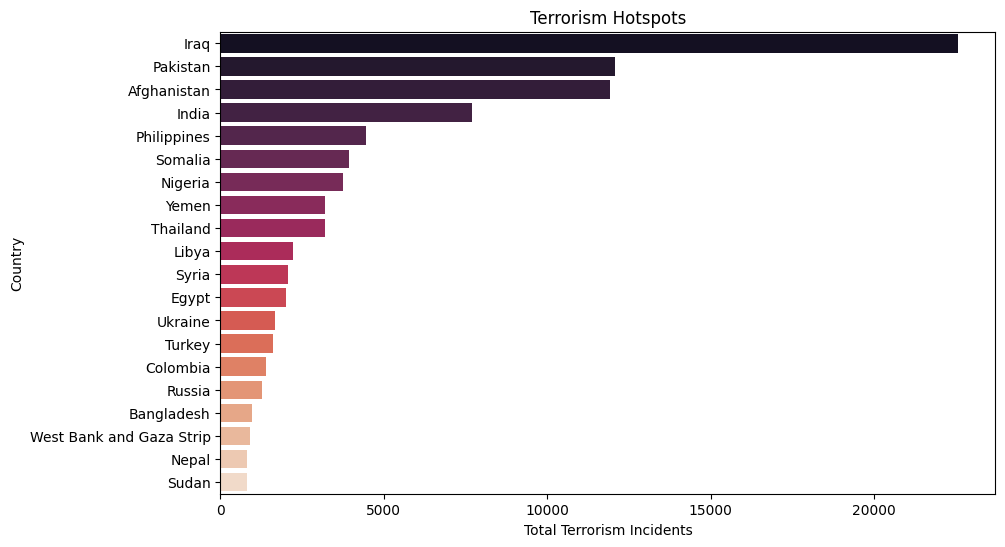

In [ ]:
# Identify terrorism hotspots
terrorism_hotspots = df2.groupby('country')['total_incidents'].sum().sort_values(ascending=False).head(20).reset_index()

# Plot terrorism hotspots
plt.figure(figsize=(10, 6))
sns.barplot(data=terrorism_hotspots, x='total_incidents', y='country', palette='rocket')
plt.title('Terrorism Hotspots')
plt.xlabel('Total Terrorism Incidents')
plt.ylabel('Country')
plt.show()

### Analysis of Terrorism Incidents (2007-2017)

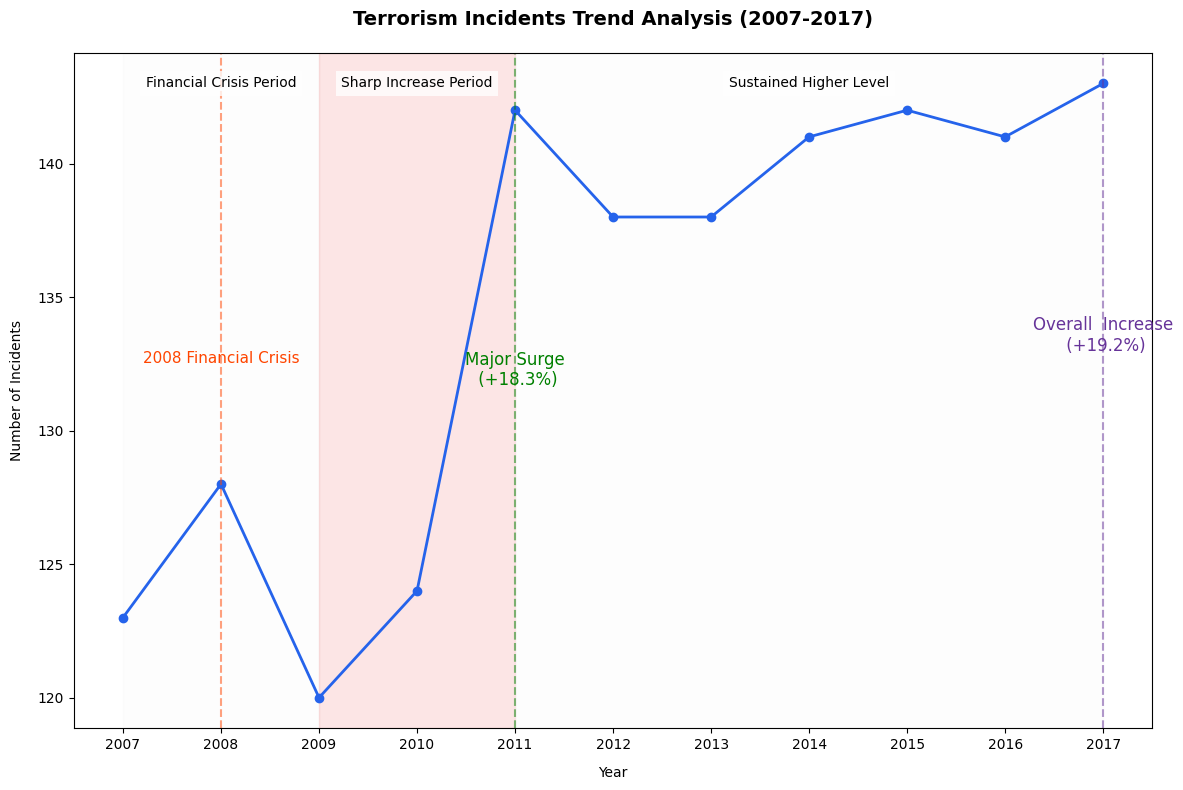


Statistical Analysis:
Minimum incidents: 120 (Year: 2009.0)
Maximum incidents: 143 (Year: 2017.0)
Average incidents per year: 134.5
Standard deviation: 8.9


In [ ]:
# Count the number of incidents per year
data = df2['incident_year'].value_counts().sort_index().reset_index()
data.columns = ['year', 'incidents']

# Calculate percentage changes
total_change = ((data['incidents'].iloc[-1] - data['incidents'].iloc[2]) / data['incidents'].iloc[2] * 100)
peak_change = ((data['incidents'].iloc[4] - data['incidents'].iloc[2]) / data['incidents'].iloc[2] * 100)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the main line
plt.plot(data['year'], data['incidents'], marker='o', linewidth=2, color='#2563eb')

# Add reference areas with annotations
plt.axvspan(2007, 2009, alpha=0.2, color='whitesmoke')
plt.text(2008, max(data['incidents']), 'Financial Crisis Period', ha='center', va='center', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

plt.axvspan(2009, 2011, alpha=0.2, color='lightcoral')
plt.text(2010, max(data['incidents']), 'Sharp Increase Period', ha='center', va='center', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

plt.axvspan(2011, 2017, alpha=0.2, color='whitesmoke')
plt.text(2014, max(data['incidents']), 'Sustained Higher Level', ha='center', va='center', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

# Add vertical lines for key events
plt.axvline(x=2008, color='orangered', linestyle='--', alpha=0.5)
plt.text(2008, max(data['incidents']) - 10, '2008 Financial Crisis', ha='center', va='top', fontsize=11, color='orangered')

plt.axvline(x=2011, color='green', linestyle='--', alpha=0.5)
plt.text(2011, max(data['incidents']) - 10, f'Major Surge\n (+{peak_change:.1f}%)', ha='center', va='top', fontsize=12, color='green')

# Add vertical line for total change
plt.axvline(x=data['year'].iloc[-1], color='rebeccapurple', linestyle='--', alpha=0.5)
plt.text(data['year'].iloc[-1], max(data['incidents']) - 10, f'Overall  Increase\n (+{total_change:.1f}%)', ha='center', va='baseline', fontsize=12, color='rebeccapurple')

# Customize the plot
plt.title('Terrorism Incidents Trend Analysis (2007-2017)', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Year', labelpad=10)
plt.ylabel('Number of Incidents', labelpad=10)
# plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=data['year'])


# Adjust layout and display
plt.tight_layout()
plt.show()

# Print additional analysis
print("\nStatistical Analysis:")
print(f"Minimum incidents: {data['incidents'].min()} (Year: {data.loc[data['incidents'].idxmin(), 'year']})")
print(f"Maximum incidents: {data['incidents'].max()} (Year: {data.loc[data['incidents'].idxmax(), 'year']})")
print(f"Average incidents per year: {data['incidents'].mean():.1f}")
print(f"Standard deviation: {data['incidents'].std():.1f}")


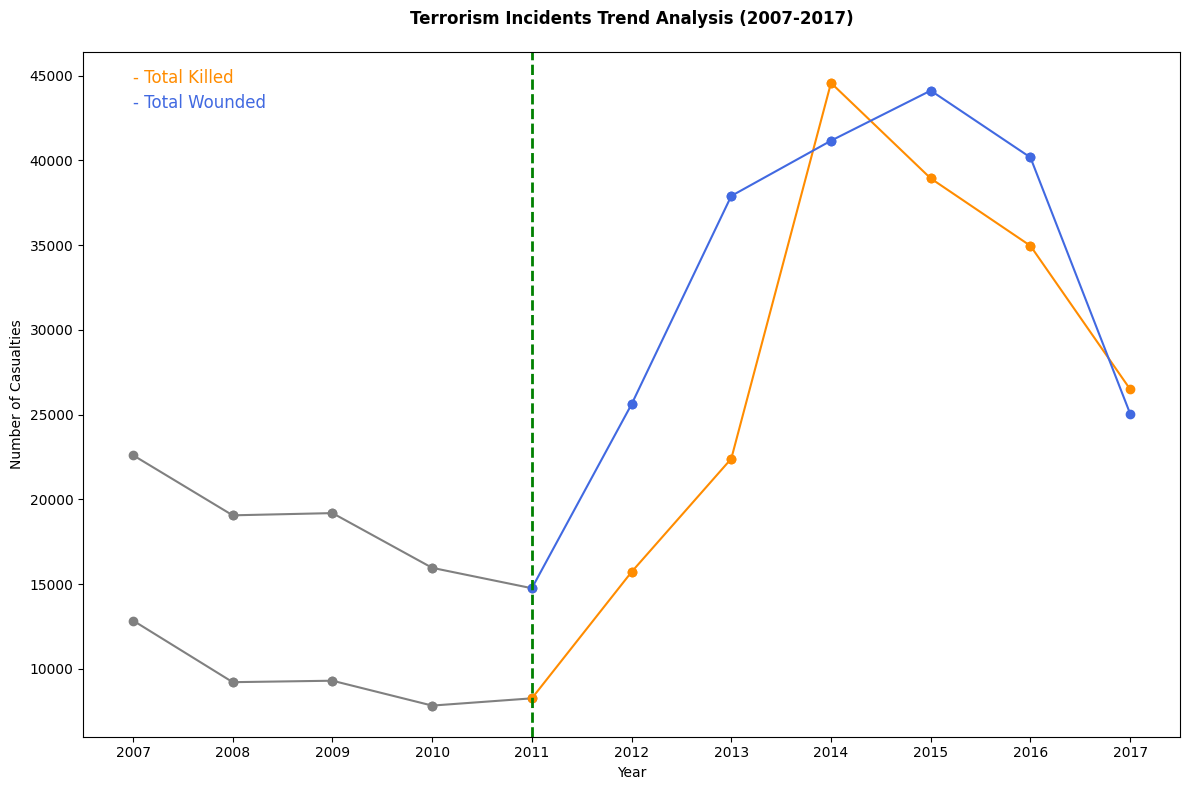

In [ ]:
# Year-wise trend of casualties
plt.figure(figsize=(12, 8))

yearly_data = df2.groupby('incident_year')[['total_killed', 'total_wounded']].sum().reset_index()

# Plot for total_killed with segment colors
for i in range(len(yearly_data) - 1):
    if yearly_data['incident_year'][i] < 2011:
        plt.plot(yearly_data['incident_year'][i:i+2], yearly_data['total_killed'][i:i+2], color='grey', marker='o')
    else:
        plt.plot(yearly_data['incident_year'][i:i+2], yearly_data['total_killed'][i:i+2], color='darkorange', marker='o')

# Plot for total_wounded with segment colors
for i in range(len(yearly_data) - 1):
    if yearly_data['incident_year'][i] < 2011:
        plt.plot(yearly_data['incident_year'][i:i+2], yearly_data['total_wounded'][i:i+2], color='grey', marker='o')
    else:
        plt.plot(yearly_data['incident_year'][i:i+2], yearly_data['total_wounded'][i:i+2], color='royalblue', marker='o')

# Add text annotations
plt.text(2007, max(yearly_data['total_killed']), '- Total Killed', color='darkorange', fontsize=12, ha='left')
plt.text(2007, max(yearly_data['total_wounded']) - 1000, '- Total Wounded', color='royalblue', fontsize=12, ha='left')

# Add a green dotted line at the year 2011
plt.axvline(x=2011, color='green', linestyle='--', linewidth=2)

plt.title('Terrorism Incidents Trend Analysis (2007-2017)', pad=20, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.xticks(ticks=yearly_data['incident_year'])

plt.tight_layout()
plt.show()




The analysis of terrorism incidents from **2007 to 2017** reveals a **strong correlation between the rise in the number of attacks and the surge in human casualties**. A notable escalation occurred between **2010 and 2014**, marked by a **sharp increase in both fatalities and injuries**, coinciding with a significant rise in the number of incidents. This period sustained high levels of violence until a decline in **2017**. The charts illustrate that as terrorism intensified, **human suffering also peaked**, emphasizing the **devastating consequences of such events on civilian life**.


#### Primary Targets


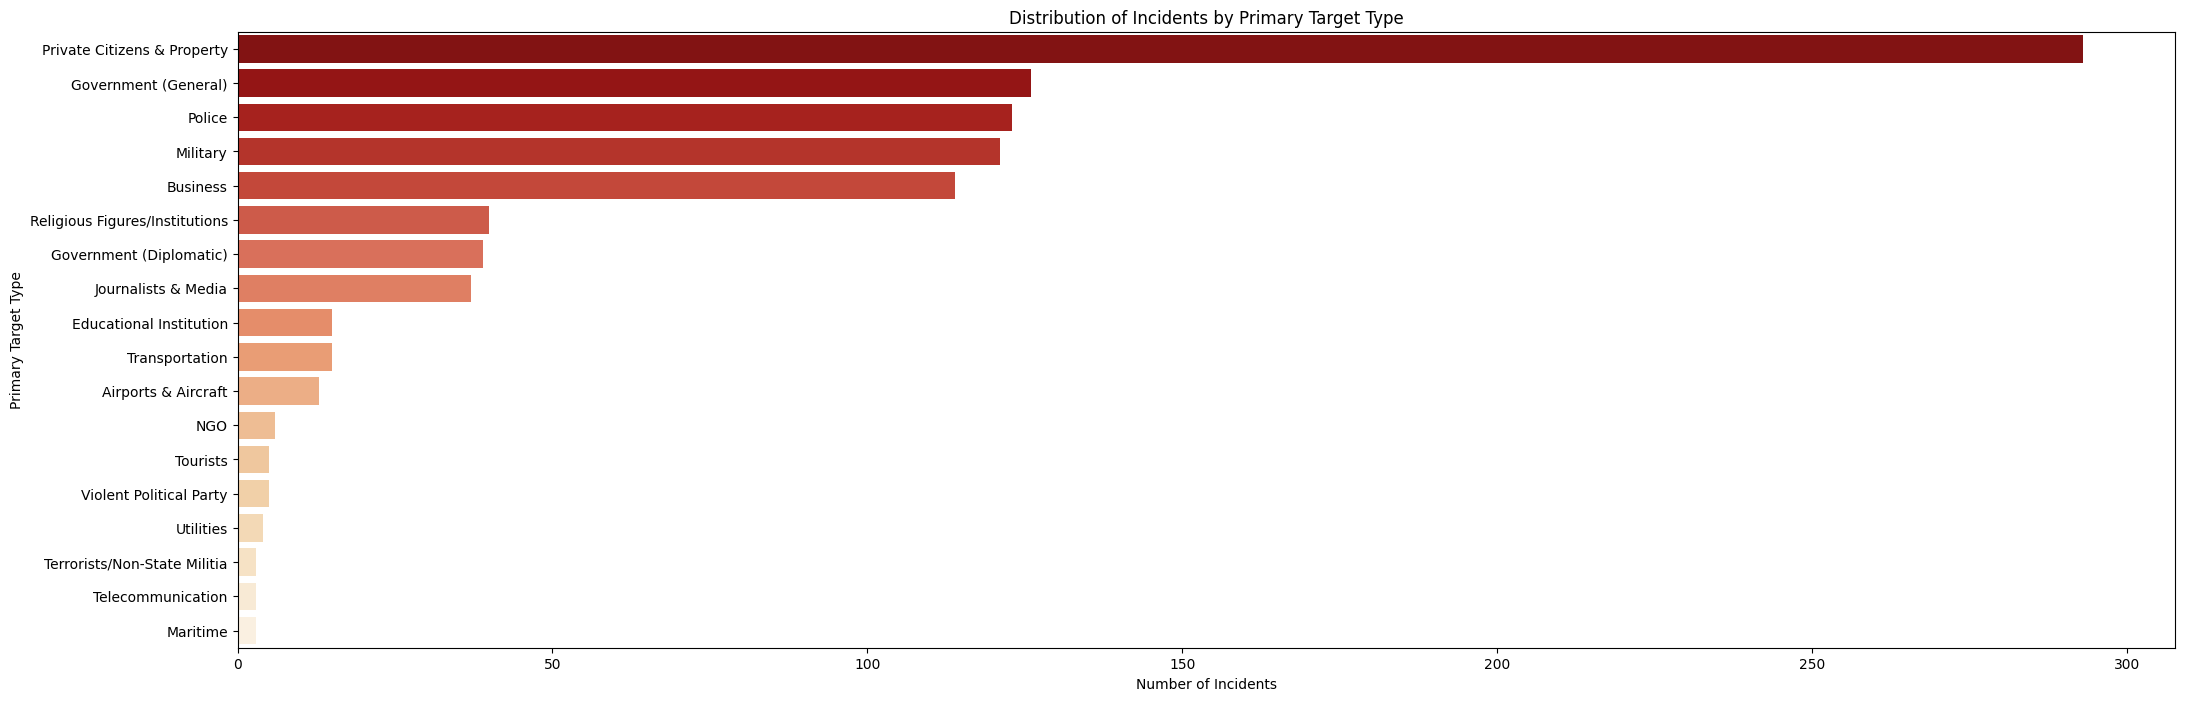

In [ ]:
# Filter out 'No Attack' and 'Unknown'
filtered_df2 = df2[~df2['primary_target_type'].isin(['No Attack', 'Unknown'])]

# Primary Target Type
plt.figure(figsize=(25, 8))
target_type_counts = filtered_df2['primary_target_type'].value_counts()
sns.barplot(y=target_type_counts.index, x=target_type_counts.values, palette='OrRd_r')
plt.title('Distribution of Incidents by Primary Target Type')
plt.ylabel('Primary Target Type')
plt.xlabel('Number of Incidents')
plt.show()


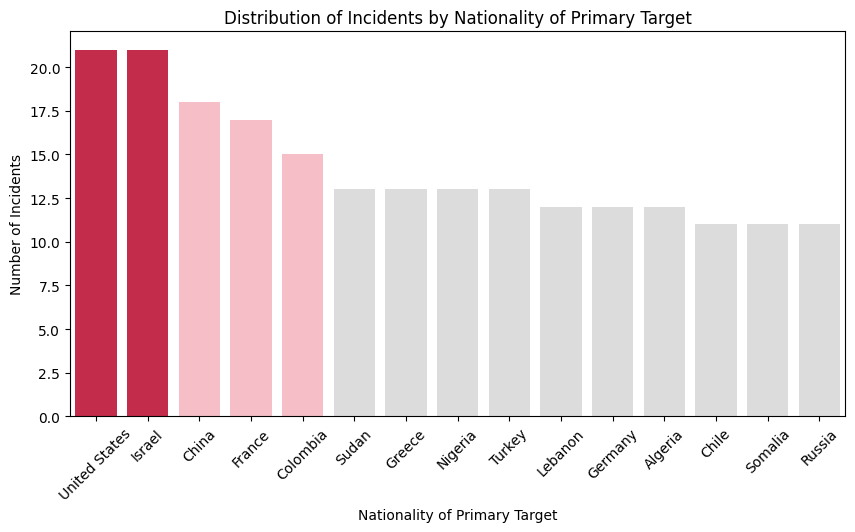

In [ ]:
# Filter out 'No target nationality'
filtered_df2 = df2[df2['nationality_of_primary_target'] != 'No Target Nationality']

# Nationality of Primary Target
plt.figure(figsize=(10, 5))
nationality_counts = filtered_df2['nationality_of_primary_target'].value_counts().head(15)

# Define colors
colors = ['crimson', 'crimson'] + ['lightpink', 'lightpink', 'lightpink'] + ['#dcdcdc'] * (len(nationality_counts) - 5)

sns.barplot(x=nationality_counts.index, y=nationality_counts.values, palette=colors)
plt.title('Distribution of Incidents by Nationality of Primary Target')
plt.xlabel('Nationality of Primary Target')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


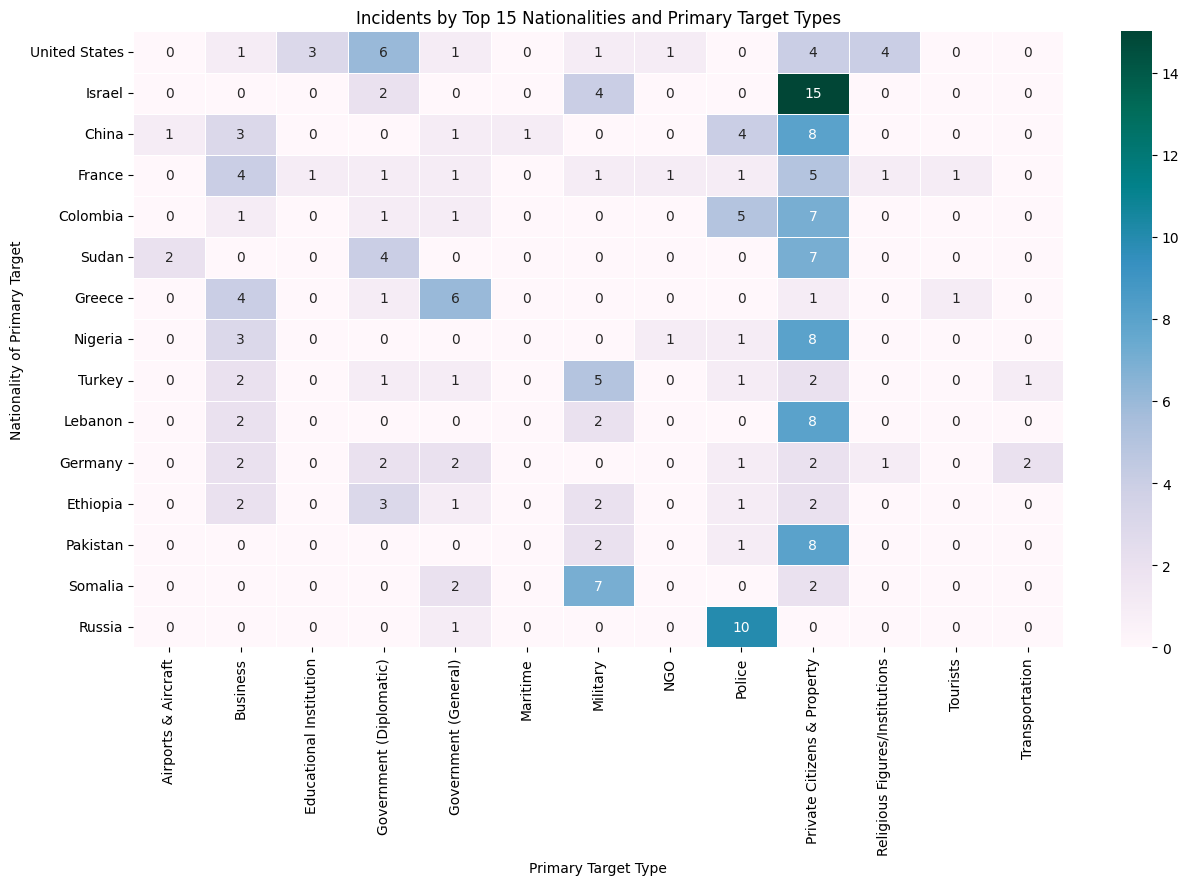

In [ ]:
# Filter out 'No Attack' and 'Unknown'
filtered_df = df2[~df2['primary_target_type'].isin(['No Attack', 'Unknown'])]

# Get the top 15 nationalities
top_15_nationalities = filtered_df['nationality_of_primary_target'].value_counts().head(15).index

# Filter the dataframe for the top 15 nationalities
filtered_df2 = filtered_df[filtered_df['nationality_of_primary_target'].isin(top_15_nationalities)]

# Create a pivot table for the heatmap
heatmap_data = filtered_df2.pivot_table(index='nationality_of_primary_target', columns='primary_target_type', aggfunc='size', fill_value=0)

# Sort the index based on the value counts of nationalities
heatmap_data = heatmap_data.loc[top_15_nationalities]

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='PuBuGn', linewidths=.5)
plt.title('Incidents by Top 15 Nationalities and Primary Target Types')
plt.xlabel('Primary Target Type')
plt.ylabel('Nationality of Primary Target')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()



Analysis of terrorist incident targets reveals a **clear hierarchy in nationality targeting**, with the **United States and Israel experiencing the highest number of incidents (~20 each)**, likely due to their **significant global political influence** and involvement in international affairs. The pattern shows a **strategic focus on major powers**, with **China, France, and Colombia forming the second tier of targeted nations**, highlighting how **economic strength and regional influence factor into target selection**.

The distribution then gradually decreases across other nations, including both developed and developing countries like **Greece, Nigeria, Turkey, and Indonesia**, suggesting that terrorist activities consider a **complex mix of factors including geopolitical importance, regional conflicts, and strategic value**. This targeting pattern ultimately reflects a **calculated approach focusing on nations with substantial global influence, economic power, or strategic regional importance**.



#### Weapon Preferences by Region


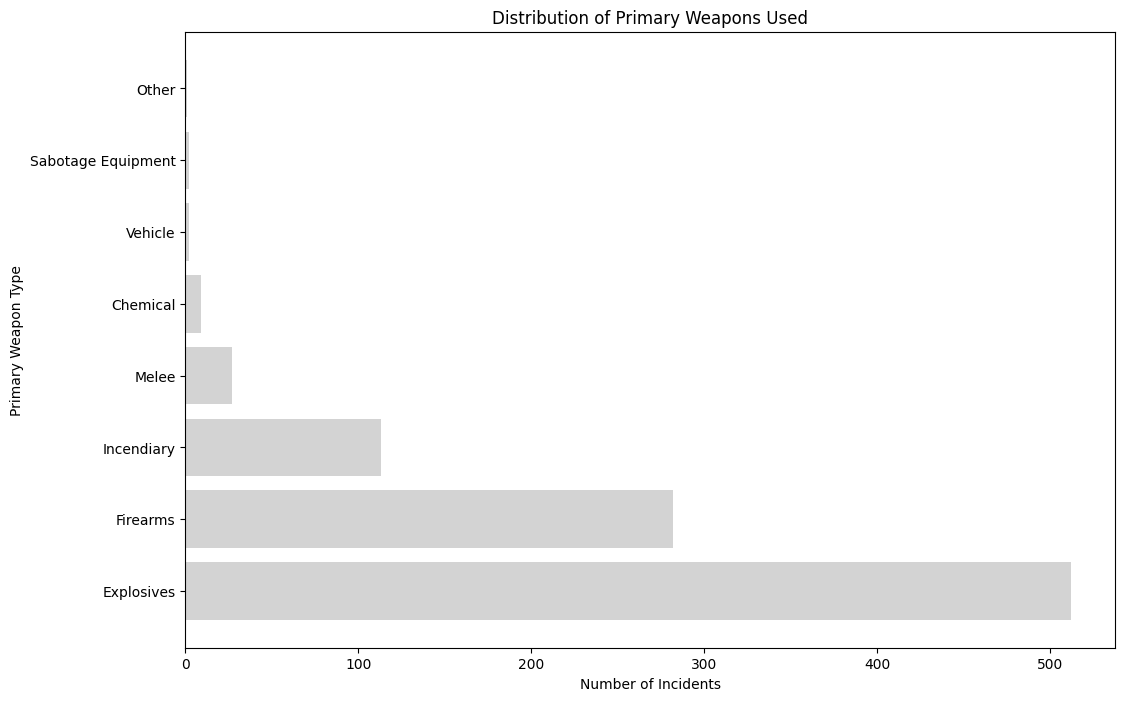

In [ ]:
# Filter out "No Attack" and "Unknown" weapon types
filtered_df2 = df2[~df2['primary_weapon_type'].isin(['No Attack', 'Unknown'])]

# Grouping data to count the occurrences of each primary weapon type
weapon_counts = filtered_df2['primary_weapon_type'].value_counts()

# Replace lengthy weapon type names with simplified versions for the plot
simplified_labels = weapon_counts.index.str.replace('^Vehicle.*', 'Vehicle', regex=True)

# Plotting the primary weapon types
plt.figure(figsize=(12, 8))
plt.barh(simplified_labels, weapon_counts.values, color='lightgrey')
plt.title('Distribution of Primary Weapons Used')
plt.xlabel('Number of Incidents')
plt.ylabel('Primary Weapon Type')
plt.show()


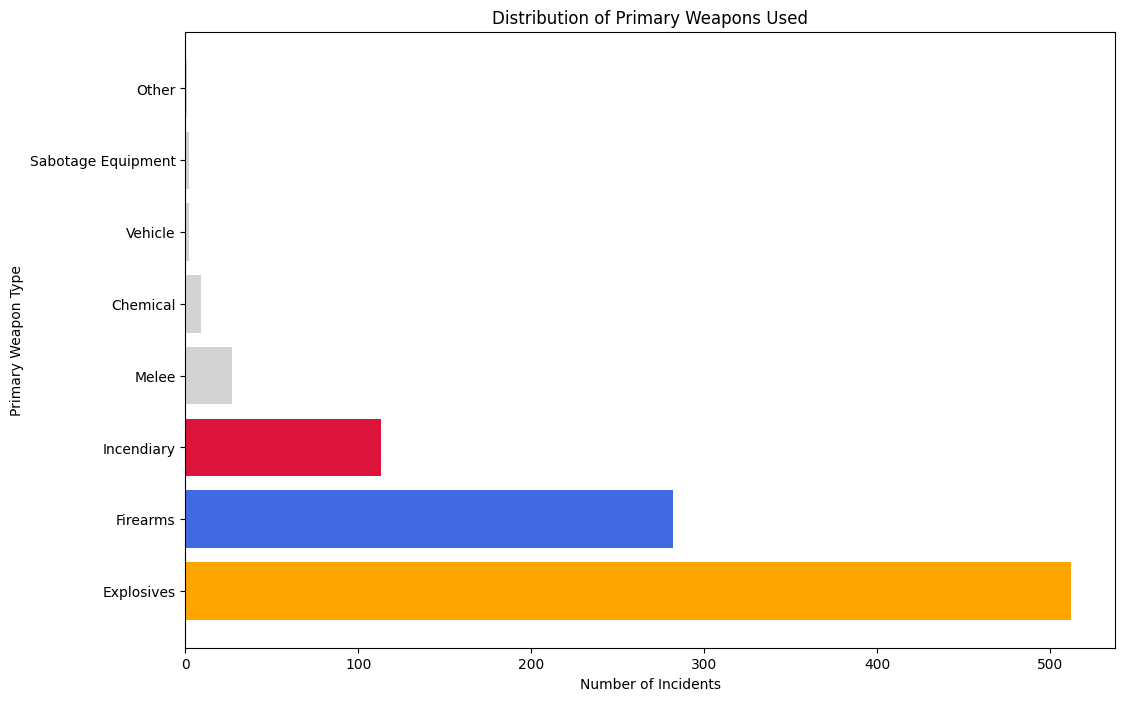

In [ ]:
# Filter out "No Attack" and "Unknown" weapon types
filtered_df2 = df2[~df2['primary_weapon_type'].isin(['No Attack', 'Unknown'])]

# Grouping data to count the occurrences of each primary weapon type
weapon_counts = filtered_df2['primary_weapon_type'].value_counts()

# Identify top 3 primary weapons
top_3_weapons = weapon_counts.head(3).index

# Assign colors to top 3 and others
colors = ['lightgrey'] * len(weapon_counts)
for i, weapon in enumerate(weapon_counts.index):
    if weapon in top_3_weapons:
        colors[i] = ['orange', 'royalblue', 'crimson'][list(top_3_weapons).index(weapon)]

# Replace lengthy weapon type names with simplified versions for the plot
simplified_labels = weapon_counts.index.str.replace('^Vehicle.*', 'Vehicle', regex=True)

# Plotting the primary weapon types
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.barh(simplified_labels, weapon_counts.values, color=colors)
ax1.set_xlabel('Number of Incidents')
ax1.set_ylabel('Primary Weapon Type')
ax1.set_title('Distribution of Primary Weapons Used')

plt.show()


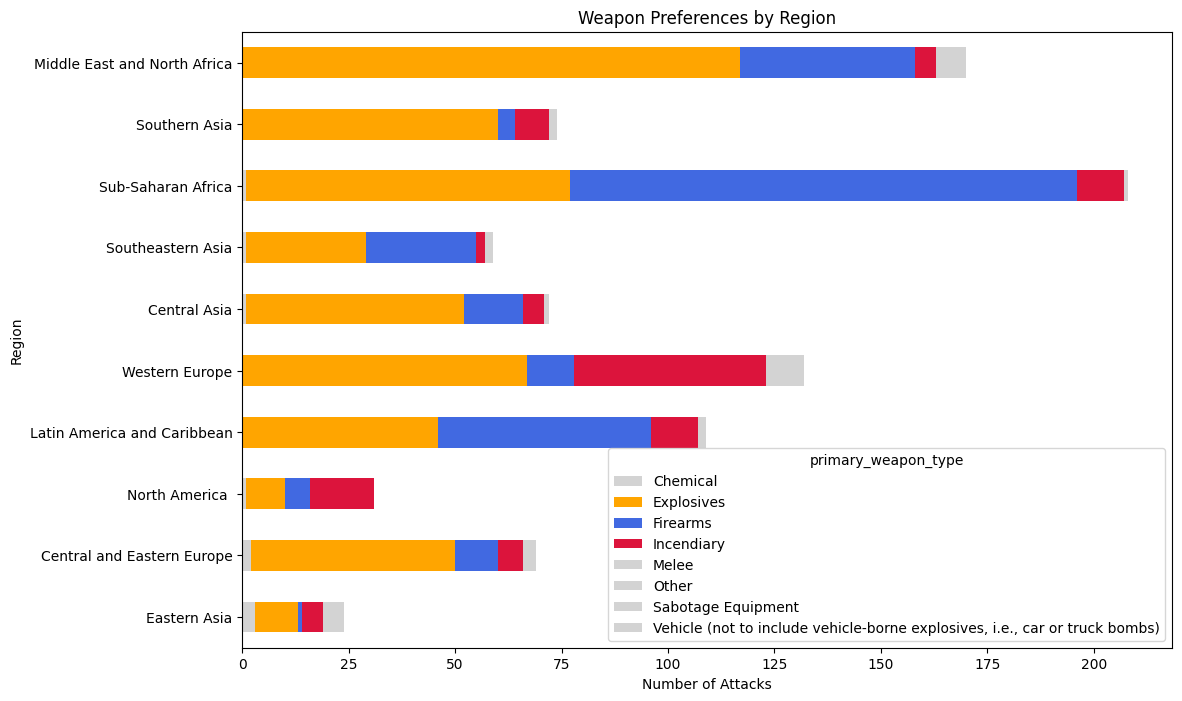

In [ ]:
# Filter out "No Attack" and "Unknown" weapon types
filtered_df2 = df2[~df2['primary_weapon_type'].isin(['No Attack', 'Unknown'])]

# Grouping data to count weapon types per region using Regional_Indicator
weapon_by_region = filtered_df2.groupby(['Regional_Indicator', 'primary_weapon_type']).size().unstack()

# Calculate total incidents per region
total_incidents_per_region = filtered_df2.groupby('Regional_Indicator')['total_incidents'].sum()

# Sort regions by total incidents
sorted_regions = total_incidents_per_region.sort_values().index

# Reorder the weapon_by_region DataFrame based on sorted regions
weapon_by_region = weapon_by_region.loc[sorted_regions]

# Identify top 3 primary weapons overall
top_3_weapons = filtered_df2['primary_weapon_type'].value_counts().head(3).index

# Plot weapon preferences by region
fig, ax = plt.subplots(figsize=(12, 8))
colors = {weapon: 'lightgrey' for weapon in weapon_by_region.columns}
colors.update({top_3_weapons[0]: 'orange', top_3_weapons[1]: 'royalblue', top_3_weapons[2]: 'crimson'})

weapon_by_region.plot(kind='barh', stacked=True, figsize=(12, 8), color=[colors.get(x, 'lightgrey') for x in weapon_by_region.columns], ax=ax)
plt.title('Weapon Preferences by Region')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.show()



The bar chart highlights **regional weapon preferences** in terrorism. **Explosives** are the most commonly used weapon type, especially in the **Middle East and North Africa**, **Southern Asia**, and **Western Europe**. **Firearms** also see significant usage in **Sub-Saharan Africa** and **Southern Asia**. Interestingly, **incendiary weapons** are notably used in **Western Europe** and the **Latin America and Caribbean** regions. This regional variation reflects differences in **access to materials** and **tactical preferences**.


### Socio-Economic Analysis Across Regions

#### GDP

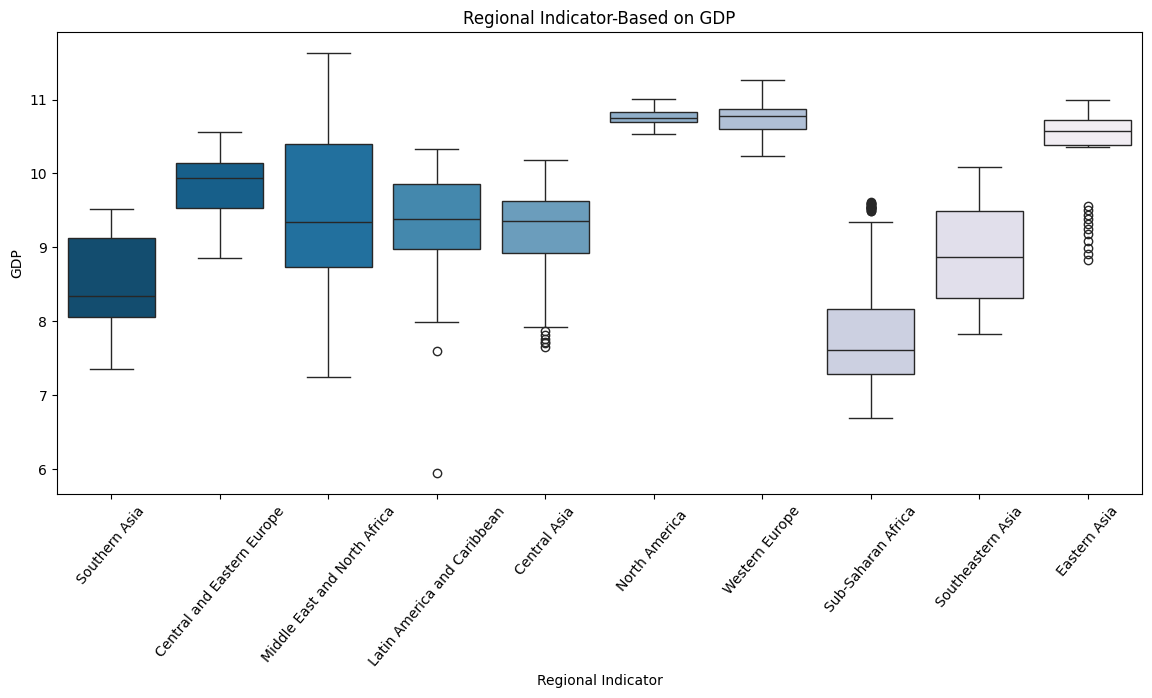

In [ ]:
# Regional Indicator-Based GDP
plt.figure(figsize=(14,6))
sns.boxplot(x='Regional_Indicator', y='Log_GDP_Per_Capita', data=df2, palette='PuBu_r')
plt.title('Regional Indicator-Based on GDP')
plt.xlabel('Regional Indicator')
plt.ylabel('GDP')
plt.xticks(rotation=50)
plt.show()


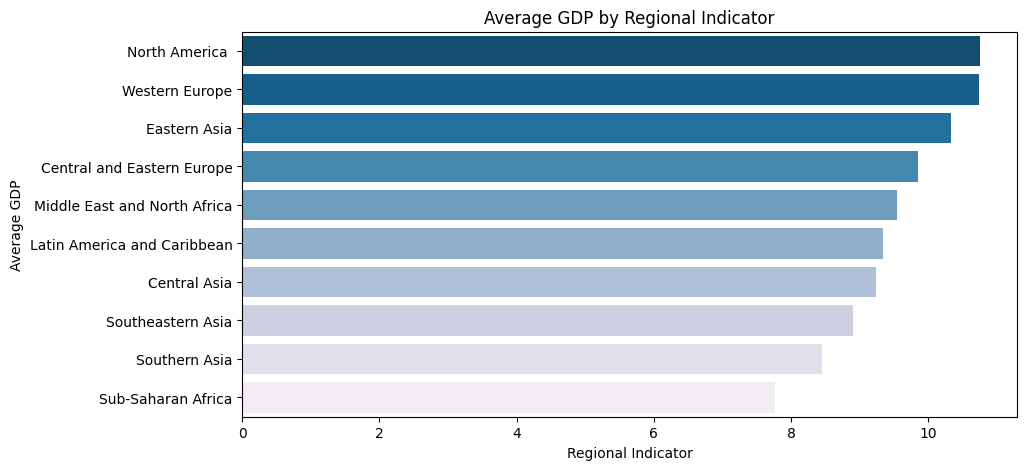

In [ ]:
# Calculate average happiness score for each region
average_happiness_by_region = df2.groupby('Regional_Indicator')['Log_GDP_Per_Capita'].mean().reset_index()

# Sort values for better visualization
average_happiness_by_region = average_happiness_by_region.sort_values(by='Log_GDP_Per_Capita', ascending=False)

# Plot the bar graph
plt.figure(figsize=(10,5))
sns.barplot(x='Log_GDP_Per_Capita', y='Regional_Indicator', data=average_happiness_by_region, palette='PuBu_r')
plt.title('Average GDP by Regional Indicator')
plt.ylabel('Average GDP')
plt.xlabel('Regional Indicator')
plt.show()

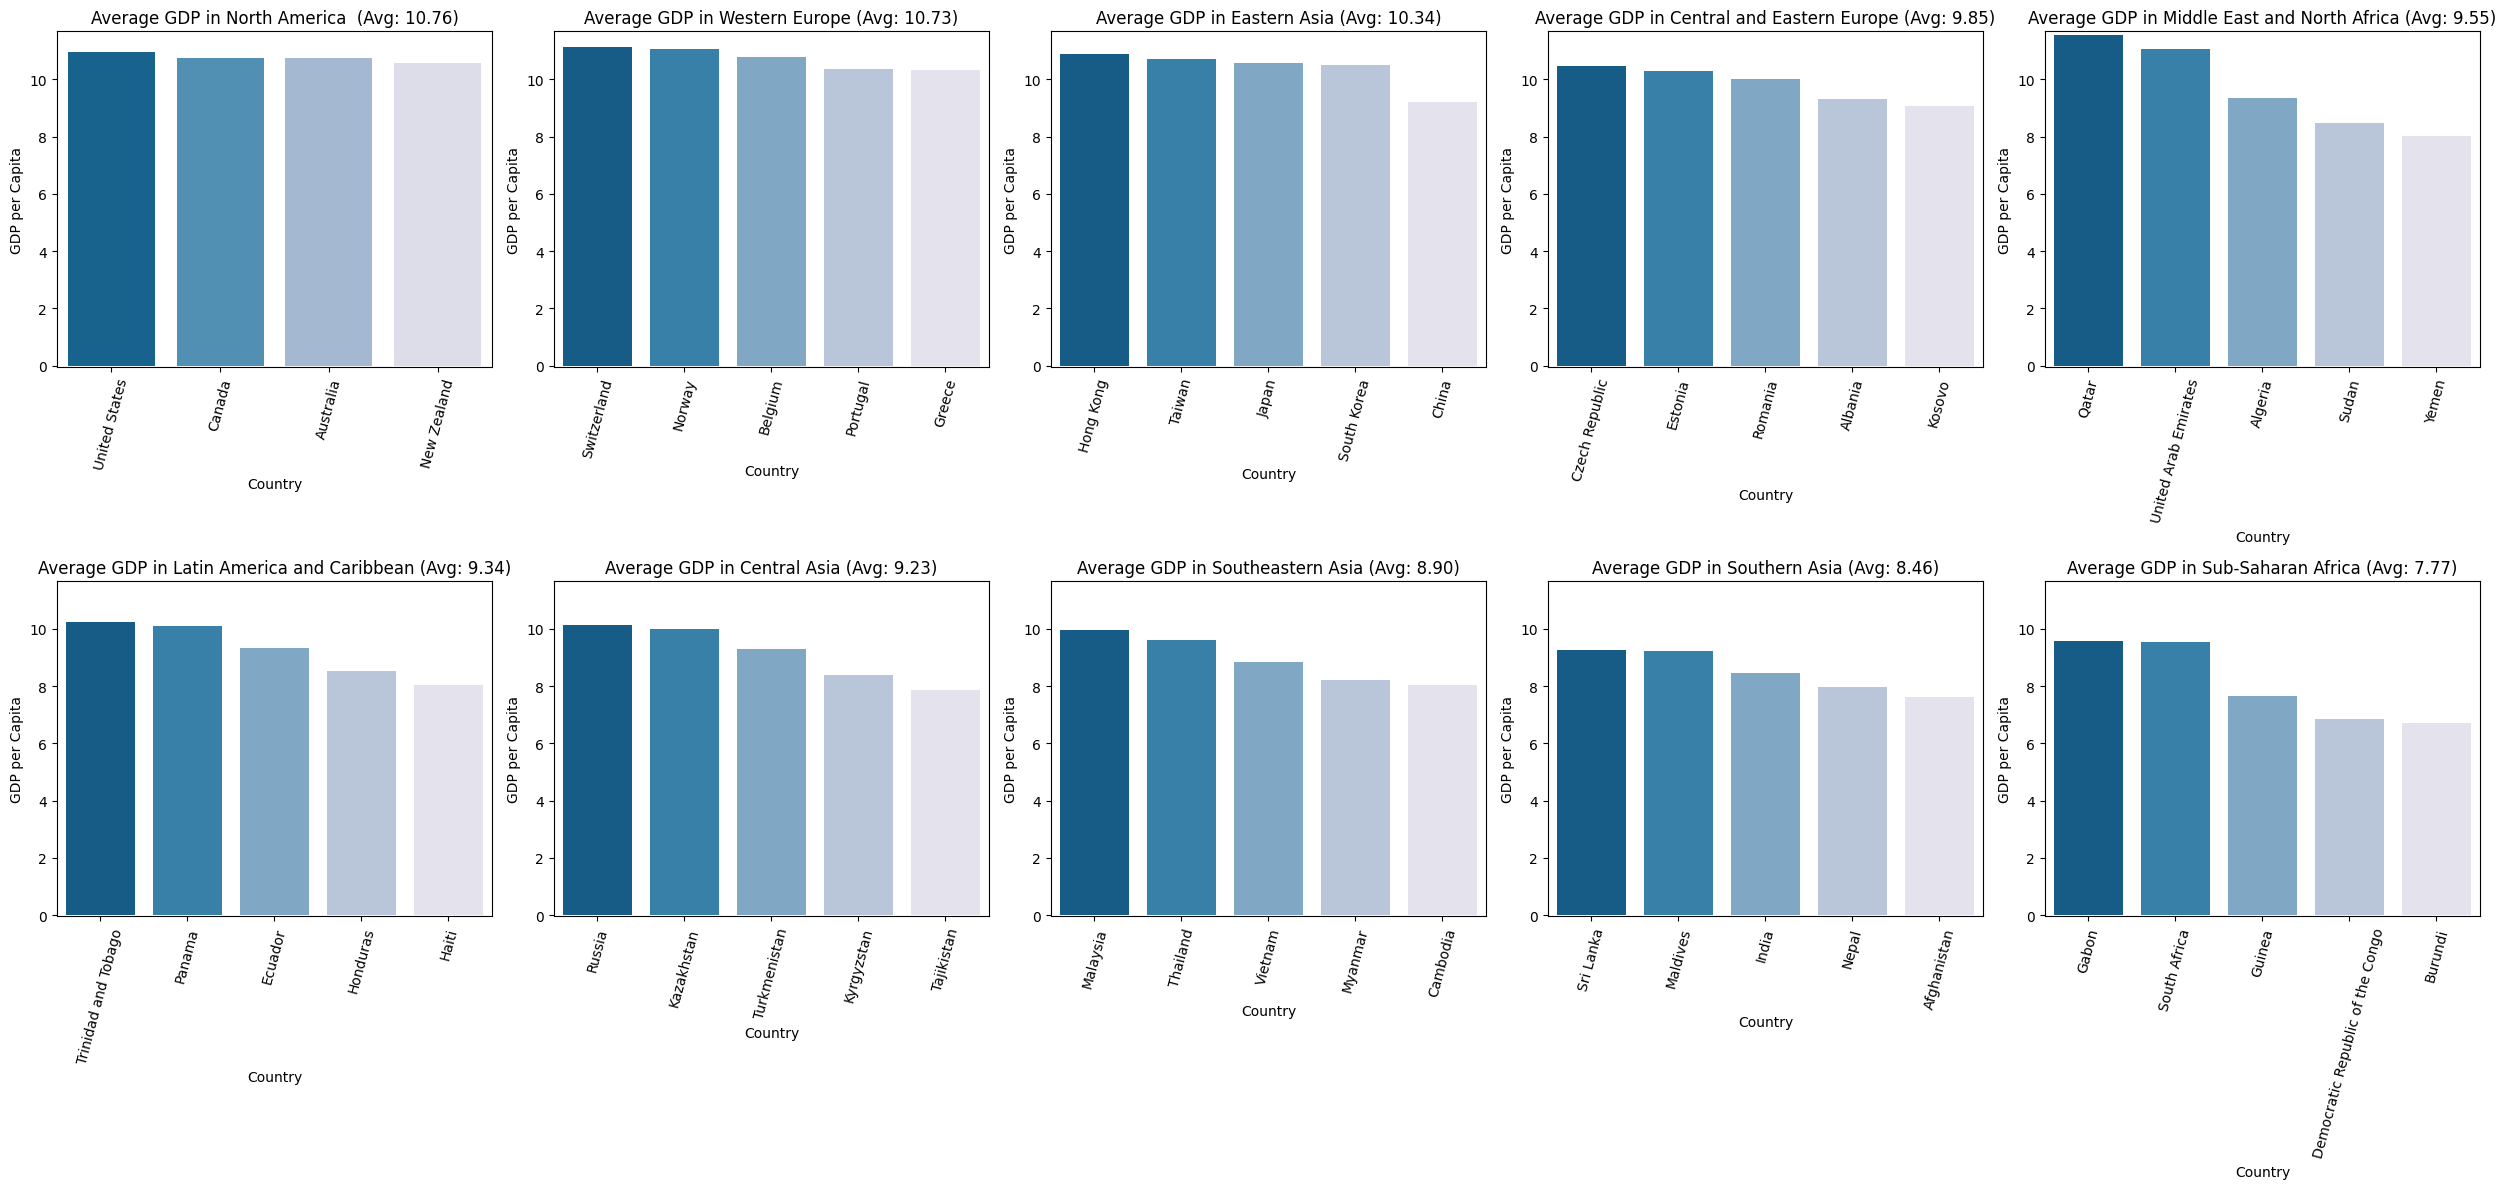

In [ ]:
# Function to get top, middle, and bottom countries by Social Support within each region
def get_top_middle_bottom_countries(df, region, top_n=2, middle_n=1, bottom_n=2):
    regional_df = df[df['Regional_Indicator'] == region]
    sorted_countries = regional_df.groupby('country')['Log_GDP_Per_Capita'].mean().sort_values()
    top_countries = sorted_countries[-top_n:]
    middle_countries = sorted_countries[len(sorted_countries)//2 : len(sorted_countries)//2 + middle_n]
    bottom_countries = sorted_countries[:bottom_n]
    return pd.concat([top_countries, middle_countries, bottom_countries])

# Calculate regional averages
regional_averages = df2.groupby('Regional_Indicator')['Log_GDP_Per_Capita'].mean().sort_values(ascending=False)

# Get the unique regions sorted by average social support
regions = regional_averages.index

# DataFrame to hold top, middle, and bottom countries for each region
top_middle_bottom_df = pd.DataFrame()

# Loop through each region and get the top, middle, and bottom countries
for region in regions:
    top_middle_bottom_countries = get_top_middle_bottom_countries(df2, region, top_n=2, middle_n=1, bottom_n=2)
    region_df = pd.DataFrame({
        'country': top_middle_bottom_countries.index,
        'Log_GDP_Per_Capita': top_middle_bottom_countries.values,
        'Regional_Indicator': region
    })
    top_middle_bottom_df = pd.concat([top_middle_bottom_df, region_df])

# Create a 4x3 plot grid
fig, axes = plt.subplots(2, 5, figsize=(25, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define y-axis limits for uniform scaling
y_min = -0.05
y_max = df2['Log_GDP_Per_Capita'].max() + 0.05

# Plotting each region
for idx, region in enumerate(regions):
  if idx < len(axes):
    region_data = top_middle_bottom_df[top_middle_bottom_df['Regional_Indicator'] == region].sort_values(by='Log_GDP_Per_Capita', ascending=False)
    sns.barplot(data=region_data, x='country', y='Log_GDP_Per_Capita', palette='PuBu_r', ax=axes[idx])
    axes[idx].set_title(f'Average GDP in {region} (Avg: {regional_averages[region]:.2f})')
    axes[idx].set_xlabel('Country')
    axes[idx].set_ylabel('GDP per Capita')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=75)
    axes[idx].set_ylim(y_min, y_max)  # Set uniform y-axis limits

# Adjust layout for the plots
plt.tight_layout()
plt.show()



The **GDP analysis across regions reveals significant economic disparities** that may influence regional stability and security dynamics. **North America leads** with the highest average GDP (10.76), followed closely by **Western Europe (10.73)** and **Eastern Asia (10.34)**, representing the world's most developed economies.

A second tier includes **Central and Eastern Europe (9.85)** and the **Middle East and North Africa (9.55)**, showing moderate economic development but with notable internal variations. The data shows a concerning economic gap when looking at regions like **Sub-Saharan Africa (7.77 average GDP)**, which displays the lowest regional GDP figures.

Key observations:
- **High-income stability** in North America and Western Europe, with minimal variation between countries.
- **Significant intra-regional disparities** in the Middle East and North Africa, reflecting diverse economic conditions.
- **Progressive decline in GDP** moving through Southeast Asia (8.90) to Southern Asia (8.46).


#### Global Social Support Patterns

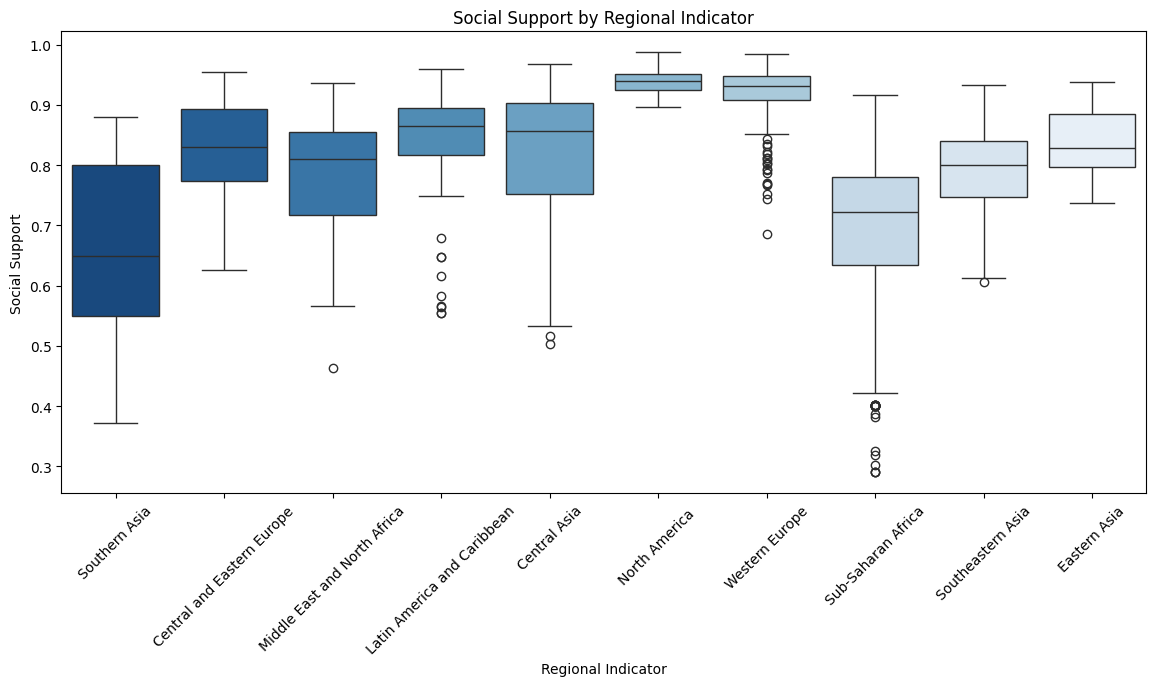

In [ ]:
# Social Support by Regions
plt.figure(figsize=(14,6))
sns.boxplot(data=df2, x='Regional_Indicator', y='Social_Support', palette='Blues_r')
plt.title('Social Support by Regional Indicator')
plt.xlabel('Regional Indicator')
plt.ylabel('Social Support')
plt.xticks(rotation=45)
plt.show()


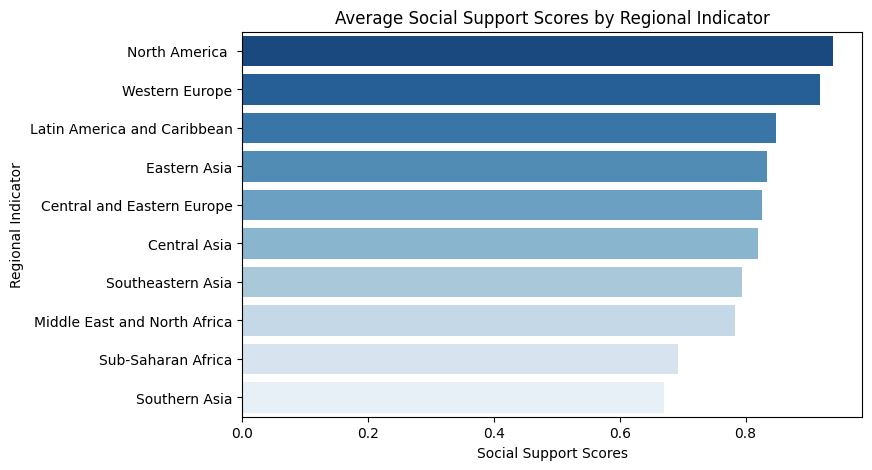

In [ ]:
# Calculate average happiness score for each region
average_happiness_by_region = df2.groupby('Regional_Indicator')['Social_Support'].mean().reset_index()

# Sort values for better visualization
average_happiness_by_region = average_happiness_by_region.sort_values(by='Social_Support', ascending=False)

# Plot the bar graph
plt.figure(figsize=(8,5))
sns.barplot(x='Social_Support', y='Regional_Indicator', data=average_happiness_by_region, palette='Blues_r')
plt.title('Average Social Support Scores by Regional Indicator')
plt.xlabel('Social Support Scores')
plt.ylabel('Regional Indicator')
plt.show()

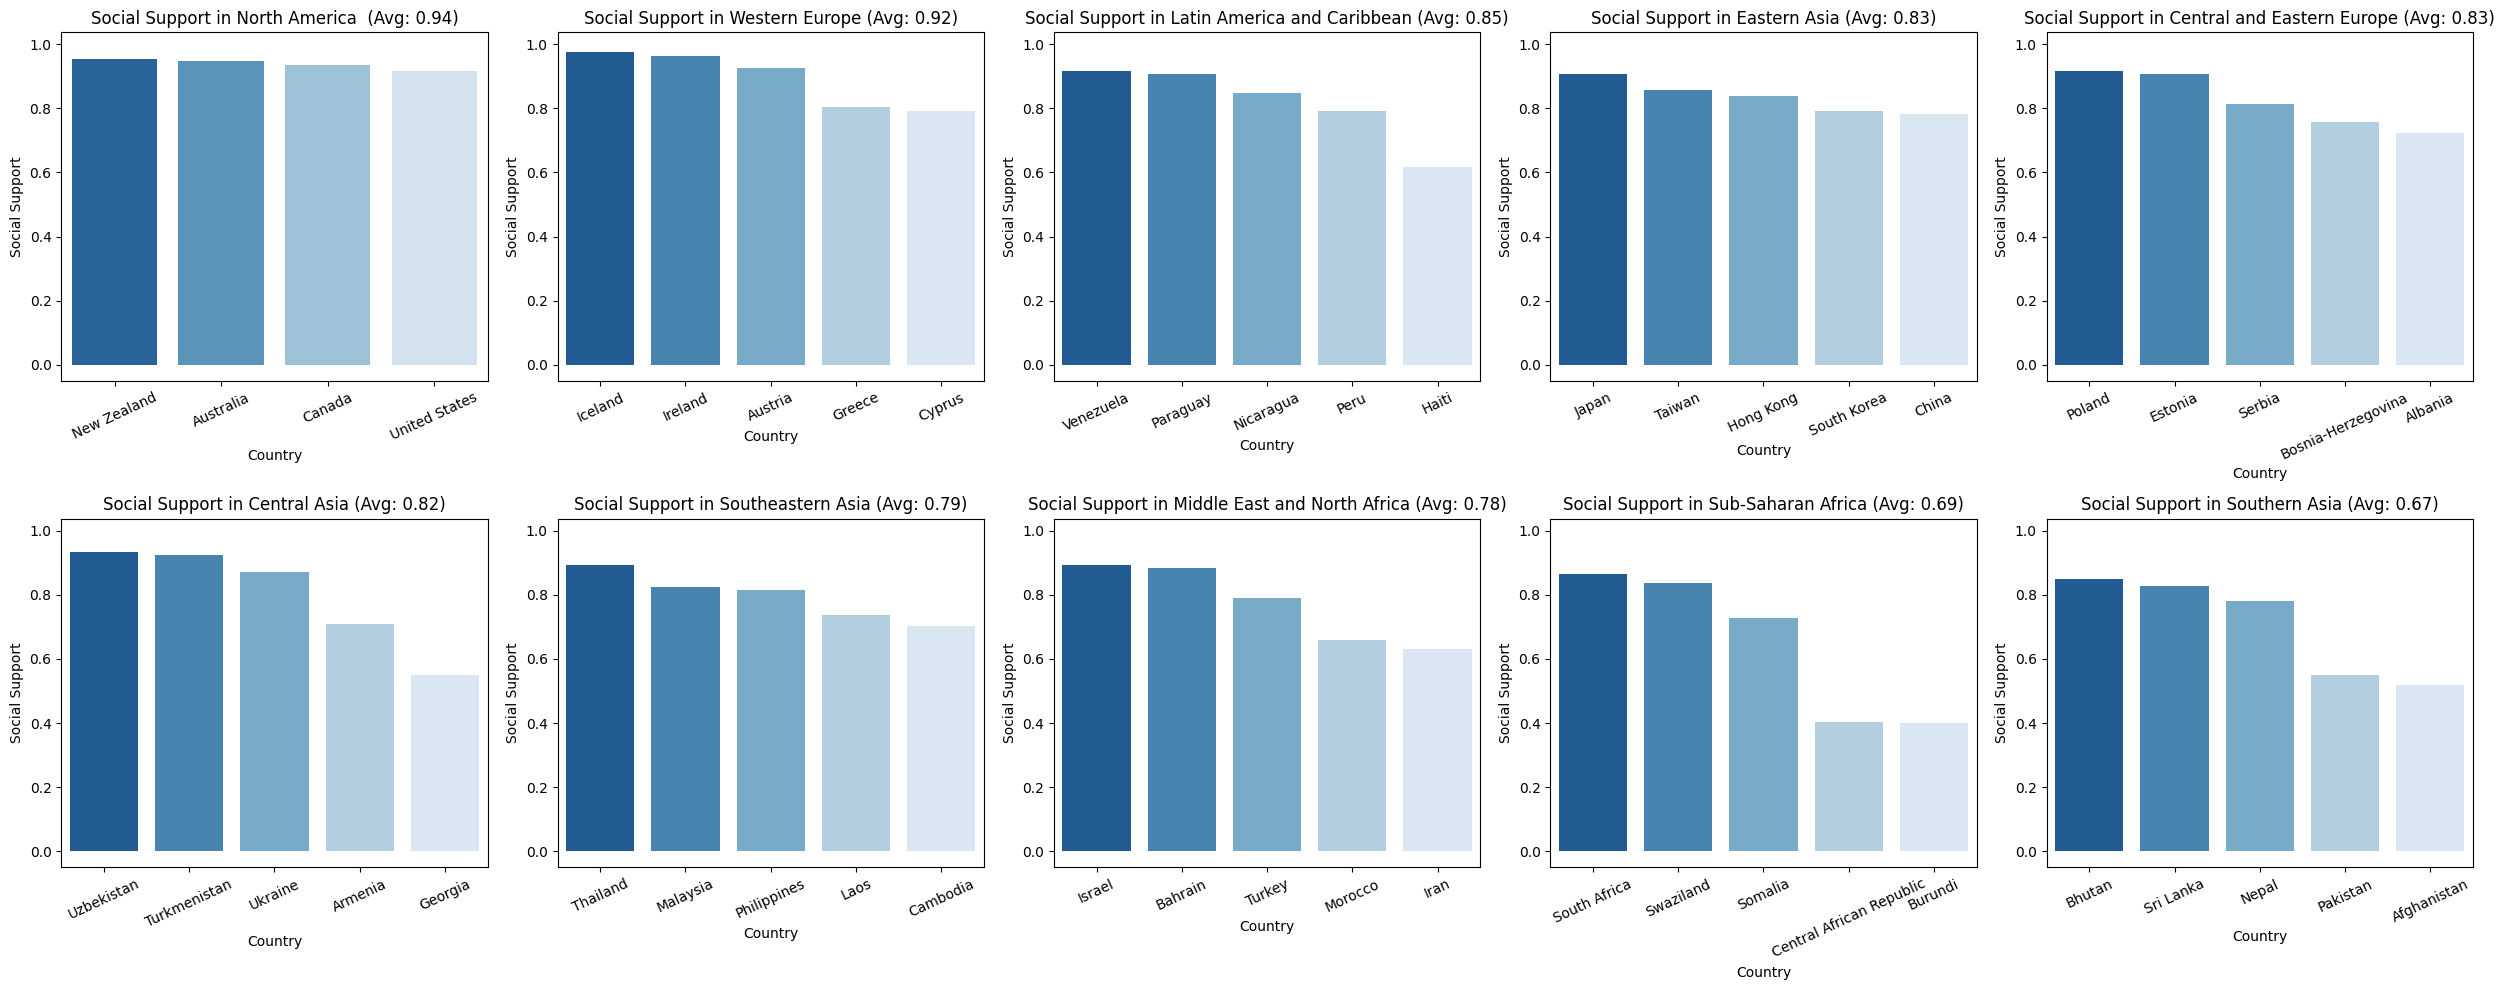

In [ ]:
# Function to get top, middle, and bottom countries by Social Support within each region
def get_top_middle_bottom_countries(df, region, top_n=2, middle_n=1, bottom_n=2):
    regional_df = df[df['Regional_Indicator'] == region]
    sorted_countries = regional_df.groupby('country')['Social_Support'].mean().sort_values()
    top_countries = sorted_countries[-top_n:]
    middle_countries = sorted_countries[len(sorted_countries)//2 : len(sorted_countries)//2 + middle_n]
    bottom_countries = sorted_countries[:bottom_n]
    return pd.concat([top_countries, middle_countries, bottom_countries])

# Calculate regional averages
regional_averages = df2.groupby('Regional_Indicator')['Social_Support'].mean().sort_values(ascending=False)

# Get the unique regions sorted by average social support
regions = regional_averages.index

# DataFrame to hold top, middle, and bottom countries for each region
top_middle_bottom_df = pd.DataFrame()

# Loop through each region and get the top, middle, and bottom countries
for region in regions:
    top_middle_bottom_countries = get_top_middle_bottom_countries(df2, region, top_n=2, middle_n=1, bottom_n=2)
    region_df = pd.DataFrame({
        'country': top_middle_bottom_countries.index,
        'Social_Support': top_middle_bottom_countries.values,
        'Regional_Indicator': region
    })
    top_middle_bottom_df = pd.concat([top_middle_bottom_df, region_df])

# Create a 4x3 plot grid
fig, axes = plt.subplots(2, 5, figsize=(25, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define y-axis limits for uniform scaling
y_min = -0.05
y_max = df2['Social_Support'].max() + 0.05

# Plotting each region
for idx, region in enumerate(regions):
  if idx < len(axes):
    region_data = top_middle_bottom_df[top_middle_bottom_df['Regional_Indicator'] == region].sort_values(by='Social_Support', ascending=False)
    sns.barplot(data=region_data, x='country', y='Social_Support', palette='Blues_r', ax=axes[idx])
    axes[idx].set_title(f'Social Support in {region} (Avg: {regional_averages[region]:.2f})')
    axes[idx].set_xlabel('Country')
    axes[idx].set_ylabel('Social Support')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=25)
    axes[idx].set_ylim(y_min, y_max)  # Set uniform y-axis limits

# Adjust layout for the plots
plt.tight_layout()
plt.show()


**Social support** is a measure of the assistance and comfort provided by others, including family, friends, and the community, which contributes to an individual's well-being and ability to cope with stress.

The **multi-panel visualization** effectively illustrates global social support patterns across different regions, revealing significant insights about socio-economic disparities worldwide. **North America and Western Europe** demonstrate consistently **high social support (>0.9)** across all countries, while **Sub-Saharan Africa** shows the most dramatic internal disparities, with **South Africa and Sudan** scoring relatively high but **Central African Republic and Burundi** showing markedly lower levels.

In contrast, **South Asia and the Middle East** exhibit wider gaps between their strongest and weakest performers, with countries like **Bhutan and Israel** leading their respective regions while **Afghanistan and Iran** show significantly lower support levels. **East Asia** presents an interesting case of relative homogeneity in social support levels, even among countries at different stages of economic development. The **Commonwealth of Independent States** shows a clear gradation from **Uzbekistan to Georgia**, reflecting post-Soviet transition differences. **Latin America and Caribbean** display moderate variation, with **Venezuela and Paraguay** performing notably better than **Haiti**.


#### Global Social Support Patterns

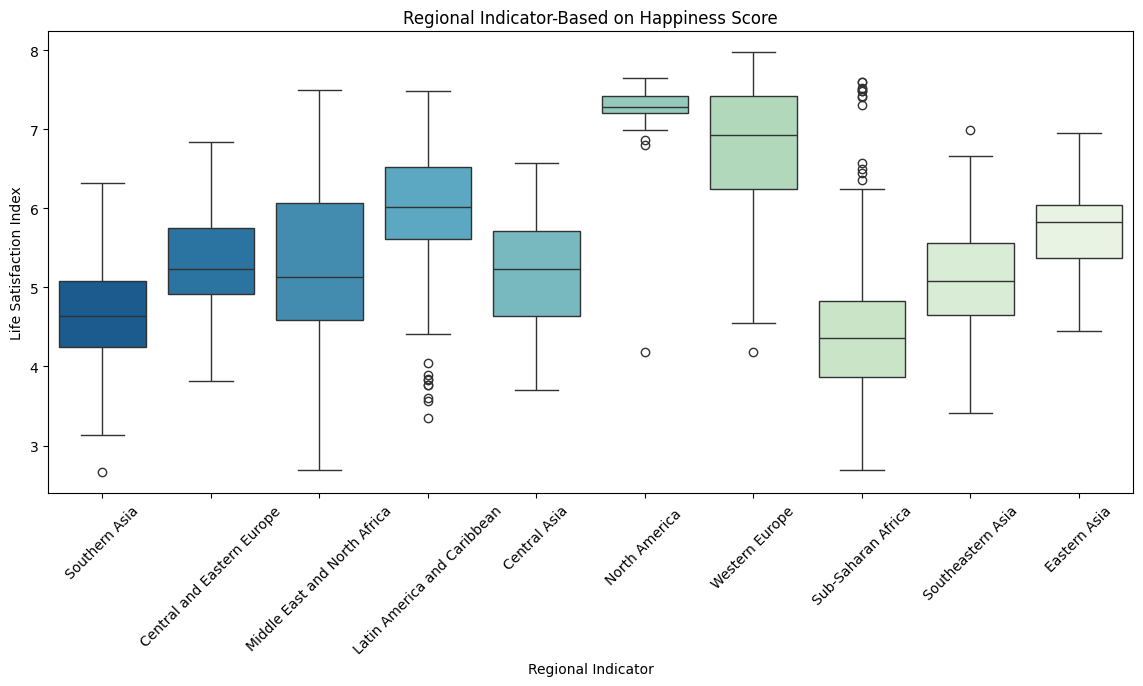

In [ ]:
# Regional Indicator-Based Life Ladder Scores
plt.figure(figsize=(14,6))
sns.boxplot(x='Regional_Indicator', y='Life_Ladder', data=df2, palette='GnBu_r')
plt.title('Regional Indicator-Based on Happiness Score')
plt.xlabel('Regional Indicator')
plt.ylabel('Life Satisfaction Index')
plt.xticks(rotation=45)
plt.show()


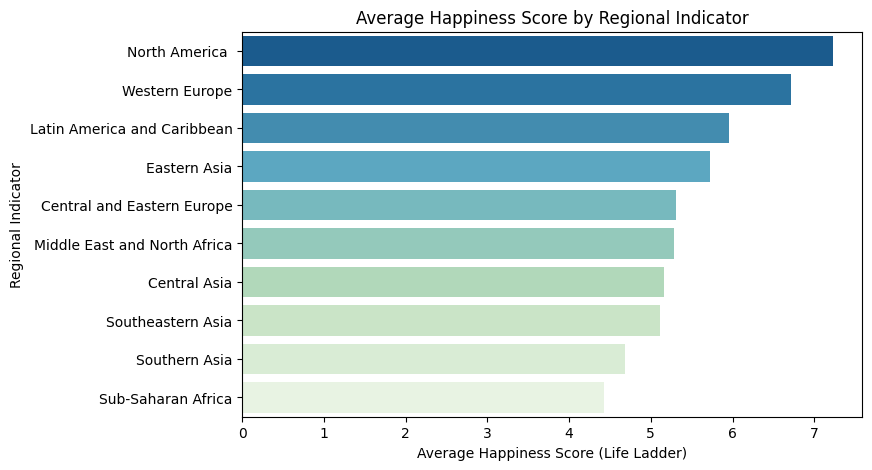

In [ ]:
# Calculate average happiness score for each region
average_happiness_by_region = df2.groupby('Regional_Indicator')['Life_Ladder'].mean().reset_index()

# Sort values for better visualization
average_happiness_by_region = average_happiness_by_region.sort_values(by='Life_Ladder', ascending=False)

# Plot the bar graph
plt.figure(figsize=(8,5))
sns.barplot(x='Life_Ladder', y='Regional_Indicator', data=average_happiness_by_region, palette='GnBu_r')
plt.title('Average Happiness Score by Regional Indicator')
plt.xlabel('Average Happiness Score (Life Ladder)')
plt.ylabel('Regional Indicator')
plt.show()


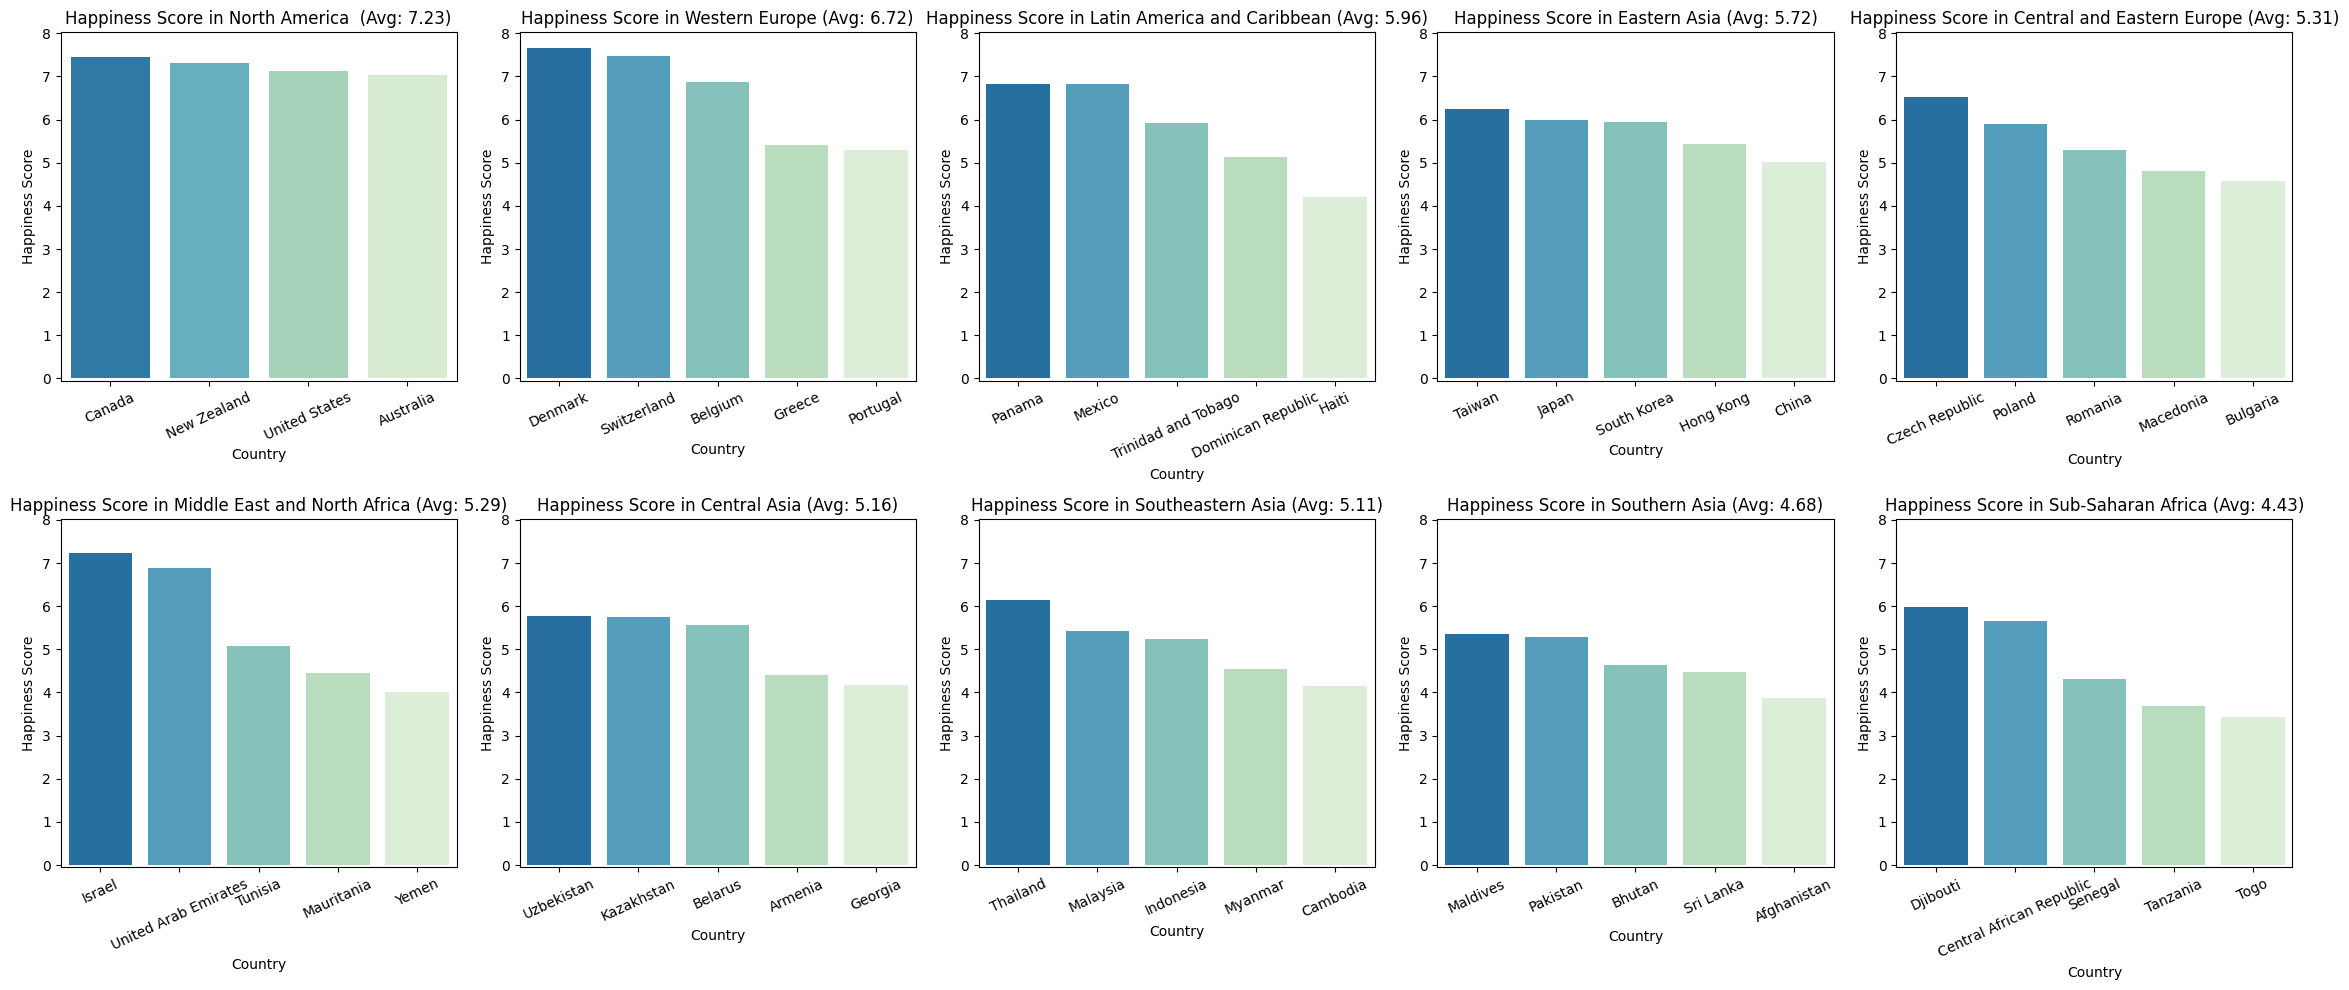

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to get top, middle, and bottom countries by Social Support within each region
def get_top_middle_bottom_countries(df, region, top_n=2, middle_n=1, bottom_n=2):
    regional_df = df[df['Regional_Indicator'] == region]
    sorted_countries = regional_df.groupby('country')['Life_Ladder'].mean().sort_values()
    top_countries = sorted_countries[-top_n:]
    middle_countries = sorted_countries[len(sorted_countries)//2 : len(sorted_countries)//2 + middle_n]
    bottom_countries = sorted_countries[:bottom_n]
    return pd.concat([top_countries, middle_countries, bottom_countries])

# Calculate regional averages
regional_averages = df2.groupby('Regional_Indicator')['Life_Ladder'].mean().sort_values(ascending=False)

# Get the unique regions sorted by average social support
regions = regional_averages.index

# DataFrame to hold top, middle, and bottom countries for each region
top_middle_bottom_df = pd.DataFrame()

# Loop through each region and get the top, middle, and bottom countries
for region in regions:
    top_middle_bottom_countries = get_top_middle_bottom_countries(df2, region, top_n=2, middle_n=1, bottom_n=2)
    region_df = pd.DataFrame({
        'country': top_middle_bottom_countries.index,
        'Life_Ladder': top_middle_bottom_countries.values,
        'Regional_Indicator': region
    })
    top_middle_bottom_df = pd.concat([top_middle_bottom_df, region_df])

# Create a 4x3 plot grid
fig, axes = plt.subplots(2, 5, figsize=(23, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define y-axis limits for uniform scaling
y_min = -0.05
y_max = df2['Life_Ladder'].max() + 0.05

# Plotting each region
for idx, region in enumerate(regions):
    if idx < len(axes):  # Ensure idx does not go out of bounds
        region_data = top_middle_bottom_df[top_middle_bottom_df['Regional_Indicator'] == region].sort_values(by='Life_Ladder', ascending=False)
        sns.barplot(data=region_data, x='country', y='Life_Ladder', palette='GnBu_r', ax=axes[idx])
        axes[idx].set_title(f'Happiness Score in {region} (Avg: {regional_averages[region]:.2f})')
        axes[idx].set_xlabel('Country')
        axes[idx].set_ylabel('Happiness Score')
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=25)
        axes[idx].set_ylim(y_min, y_max)  # Set uniform y-axis limits

# Adjust layout for the plots
plt.tight_layout()
plt.show()




**North America** has the highest life satisfaction index with an average of **7.23**, driven by countries like **Canada, New Zealand, the United States, and Australia**. **Western Europe** follows closely with an average of **6.72**, led by **Denmark and Switzerland**. Regions such as **Latin America and the Caribbean (5.96)**, **Eastern Asia (5.72)**, and **Central and Eastern Europe (5.31)** show moderate life satisfaction, with notable contributions from **Panama, Taiwan,** and **the Czech Republic** respectively.

**Southern Asia (4.68)** and **Sub-Saharan Africa (4.43)** have the lowest life satisfaction indices, facing challenges like **poverty and political instability**, but ongoing efforts aim to improve social support and living conditions to enhance overall happiness.


#### Global Net Affect Patterns


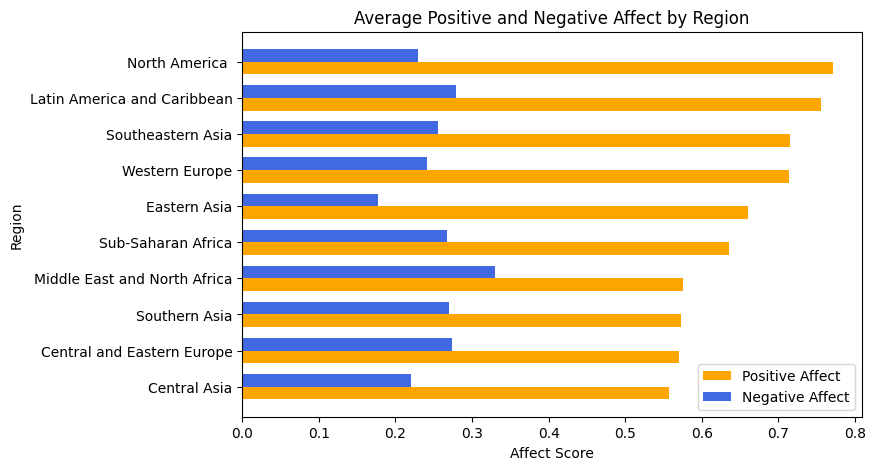

In [ ]:
# Aggregate by region and calculate mean values for Positive and Negative Affect
affect_data = df2.groupby('Regional_Indicator')[['Positive_Affect', 'Negative_Affect']].mean().reset_index()

# Sort regions by Positive Affect values
affect_data = affect_data.sort_values(by='Positive_Affect', ascending=True)

# Set the bar width
bar_width = 0.35

# Set the positions of the bars on the y-axis
positions = np.arange(len(affect_data))

# Create a bar chart with grouped bars
fig, ax = plt.subplots(figsize=(8,5))
bars1 = ax.barh(positions - bar_width/2, affect_data['Positive_Affect'], height=bar_width, label='Positive Affect', color='orange')
bars2 = ax.barh(positions + bar_width/2, affect_data['Negative_Affect'], height=bar_width, label='Negative Affect', color='royalblue')

# Set y-ticks and labels
ax.set_yticks(positions)
ax.set_yticklabels(affect_data['Regional_Indicator'])
ax.set_xlabel('Affect Score')
ax.set_ylabel('Region')
ax.set_title('Average Positive and Negative Affect by Region')
ax.legend()

# Display the plot
plt.show()


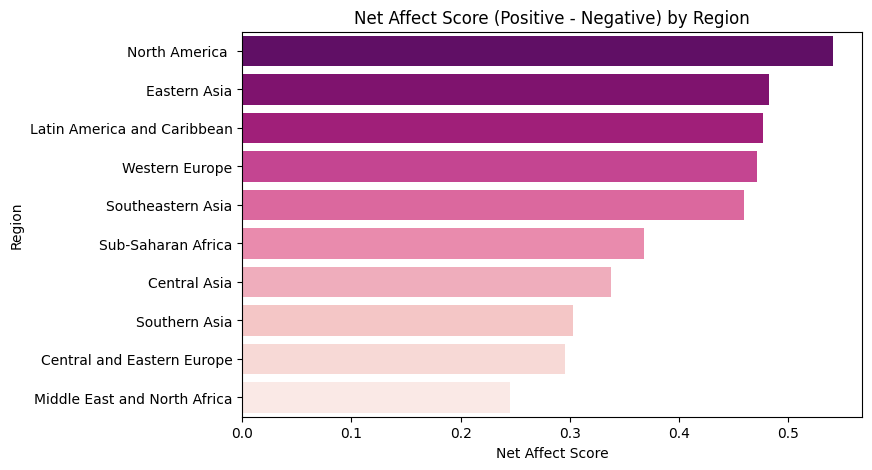

In [ ]:
# Aggregate by region and calculate mean values for Positive and Negative Affect
affect_data = df2.groupby('Regional_Indicator')[['Positive_Affect', 'Negative_Affect']].mean().reset_index()

# Calculate the net affect score
affect_data['Net_Affect'] = affect_data['Positive_Affect'] - affect_data['Negative_Affect']

# Sort regions by Net Affect values
affect_data = affect_data.sort_values(by='Net_Affect', ascending=False)

# Create a bar chart for Net Affect
plt.figure(figsize=(8, 5))
sns.barplot(x='Net_Affect', y='Regional_Indicator', data=affect_data, palette='RdPu_r')
# plt.barh(affect_data['Regional_Indicator'], affect_data['Net_Affect'], color='PuBuGn_r')
plt.title('Net Affect Score (Positive - Negative) by Region')
plt.xlabel('Net Affect Score')
plt.ylabel('Region')

# Display the plot
plt.show()


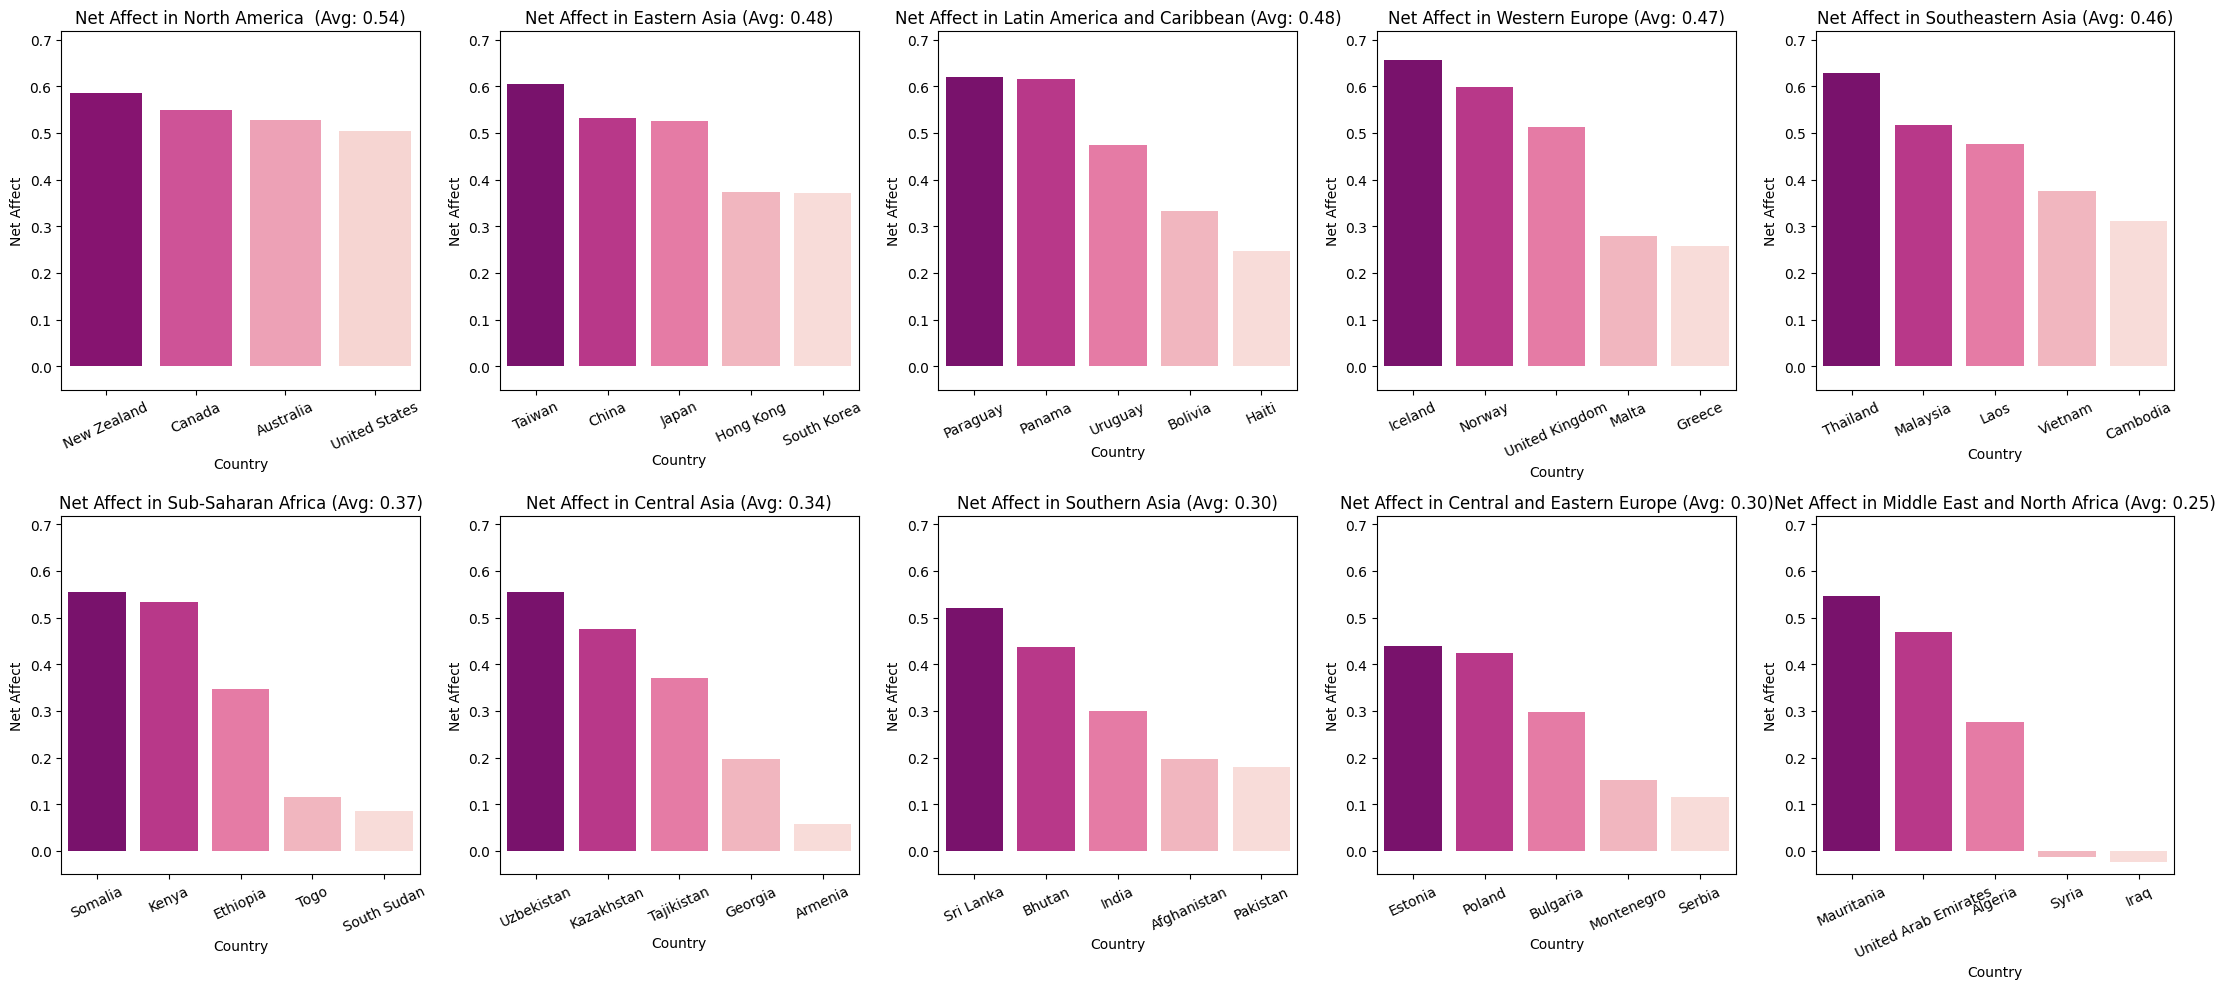

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Net Affect (Positive - Negative Affect)
df2['Net_Affect'] = df2['Positive_Affect'] - df2['Negative_Affect']

# Function to get top, middle, and bottom countries by Net Affect within each region
def get_top_middle_bottom_countries(df, region, top_n=2, middle_n=1, bottom_n=2):
    regional_df = df[df['Regional_Indicator'] == region]
    sorted_countries = regional_df.groupby('country')['Net_Affect'].mean().sort_values()
    top_countries = sorted_countries[-top_n:]
    middle_index = len(sorted_countries) // 2
    middle_countries = sorted_countries[middle_index:middle_index + middle_n]
    bottom_countries = sorted_countries[:bottom_n]
    return pd.concat([top_countries, middle_countries, bottom_countries])

# Calculate regional averages for Net Affect
regional_averages = df2.groupby('Regional_Indicator')['Net_Affect'].mean().sort_values(ascending=False)

# Get the unique regions sorted by average Net Affect
regions = regional_averages.index

# DataFrame to hold top, middle, and bottom countries for each region
top_middle_bottom_df = pd.DataFrame()

# Loop through each region and get the top, middle, and bottom countries
for region in regions:
    top_middle_bottom_countries = get_top_middle_bottom_countries(df2, region, top_n=2, middle_n=1, bottom_n=2)
    region_df = pd.DataFrame({
        'country': top_middle_bottom_countries.index,
        'Net_Affect': top_middle_bottom_countries.values,
        'Regional_Indicator': region
    })
    top_middle_bottom_df = pd.concat([top_middle_bottom_df, region_df])

# Create a 2x5 plot grid (10 subplots)
fig, axes = plt.subplots(2, 5, figsize=(22, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define y-axis limits for uniform scaling
y_min = -0.05
y_max = df2['Net_Affect'].max()

# Plotting each region
for idx, region in enumerate(regions):
    if idx < len(axes):  # Ensure idx does not go out of bounds
        region_data = top_middle_bottom_df[top_middle_bottom_df['Regional_Indicator'] == region].sort_values(by='Net_Affect', ascending=False)
        sns.barplot(data=region_data, x='country', y='Net_Affect', palette='RdPu_r', ax=axes[idx])
        axes[idx].set_title(f'Net Affect in {region} (Avg: {regional_averages[region]:.2f})')
        axes[idx].set_xlabel('Country')
        axes[idx].set_ylabel('Net Affect')
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=25)
        axes[idx].set_ylim(y_min, y_max)  # Set uniform y-axis limits

# Remove any unused subplots
for idx in range(len(regions), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout for the plots
plt.tight_layout()
plt.show()



**Affect**, as measured by positive and negative emotional experiences, plays a crucial role in understanding societal well-being and resilience. This analysis reveals a nuanced landscape, offering insights into how emotional climates vary across regions.

**Key Observations:**

- **North America (0.54)** and **Eastern Asia (0.51)** exhibit the highest net affect scores, indicating a generally positive emotional climate.
- A second tier includes **Latin America and the Caribbean (0.48)**, **Western Europe (0.47)**, and **Southeastern Asia (0.46)**, showing positive net affect scores with greater internal variability.
- The most challenging emotional climates are in the **Middle East and North Africa (0.25)**, **Central and Eastern Europe (0.30)**, **Southern Asia (0.30)**, **Central Asia (0.34)**, and **Sub-Saharan Africa (0.37)**, indicating a prevalence of negative emotions or reduced capacity for positive experiences.


#### Global Freedom

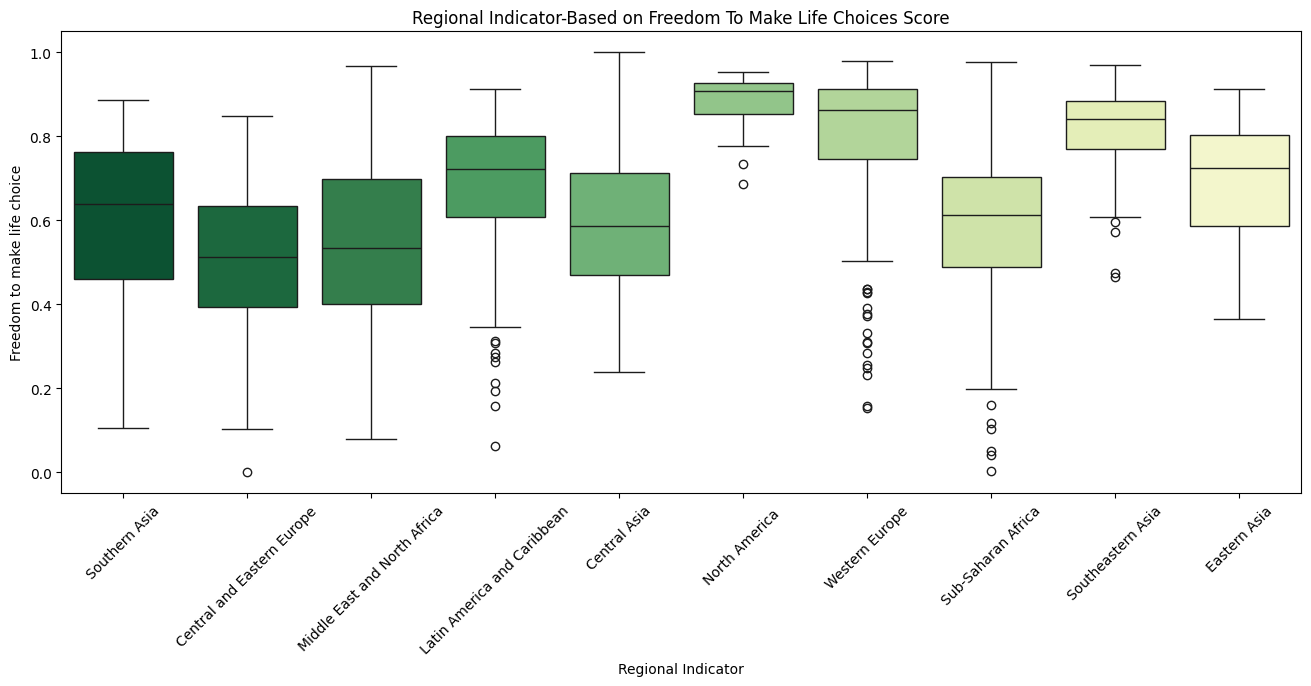

In [ ]:
# Regional Indicator-Based on Freedom in Making Life choice Scores
plt.figure(figsize=(16,6))
sns.boxplot(x='Regional_Indicator', y='Freedom_To_Make_Life_Choices', data=df2, palette='YlGn_r')
plt.title('Regional Indicator-Based on Freedom To Make Life Choices Score')
plt.xlabel('Regional Indicator')
plt.ylabel('Freedom to make life choice')
plt.xticks(rotation=45)
plt.show()

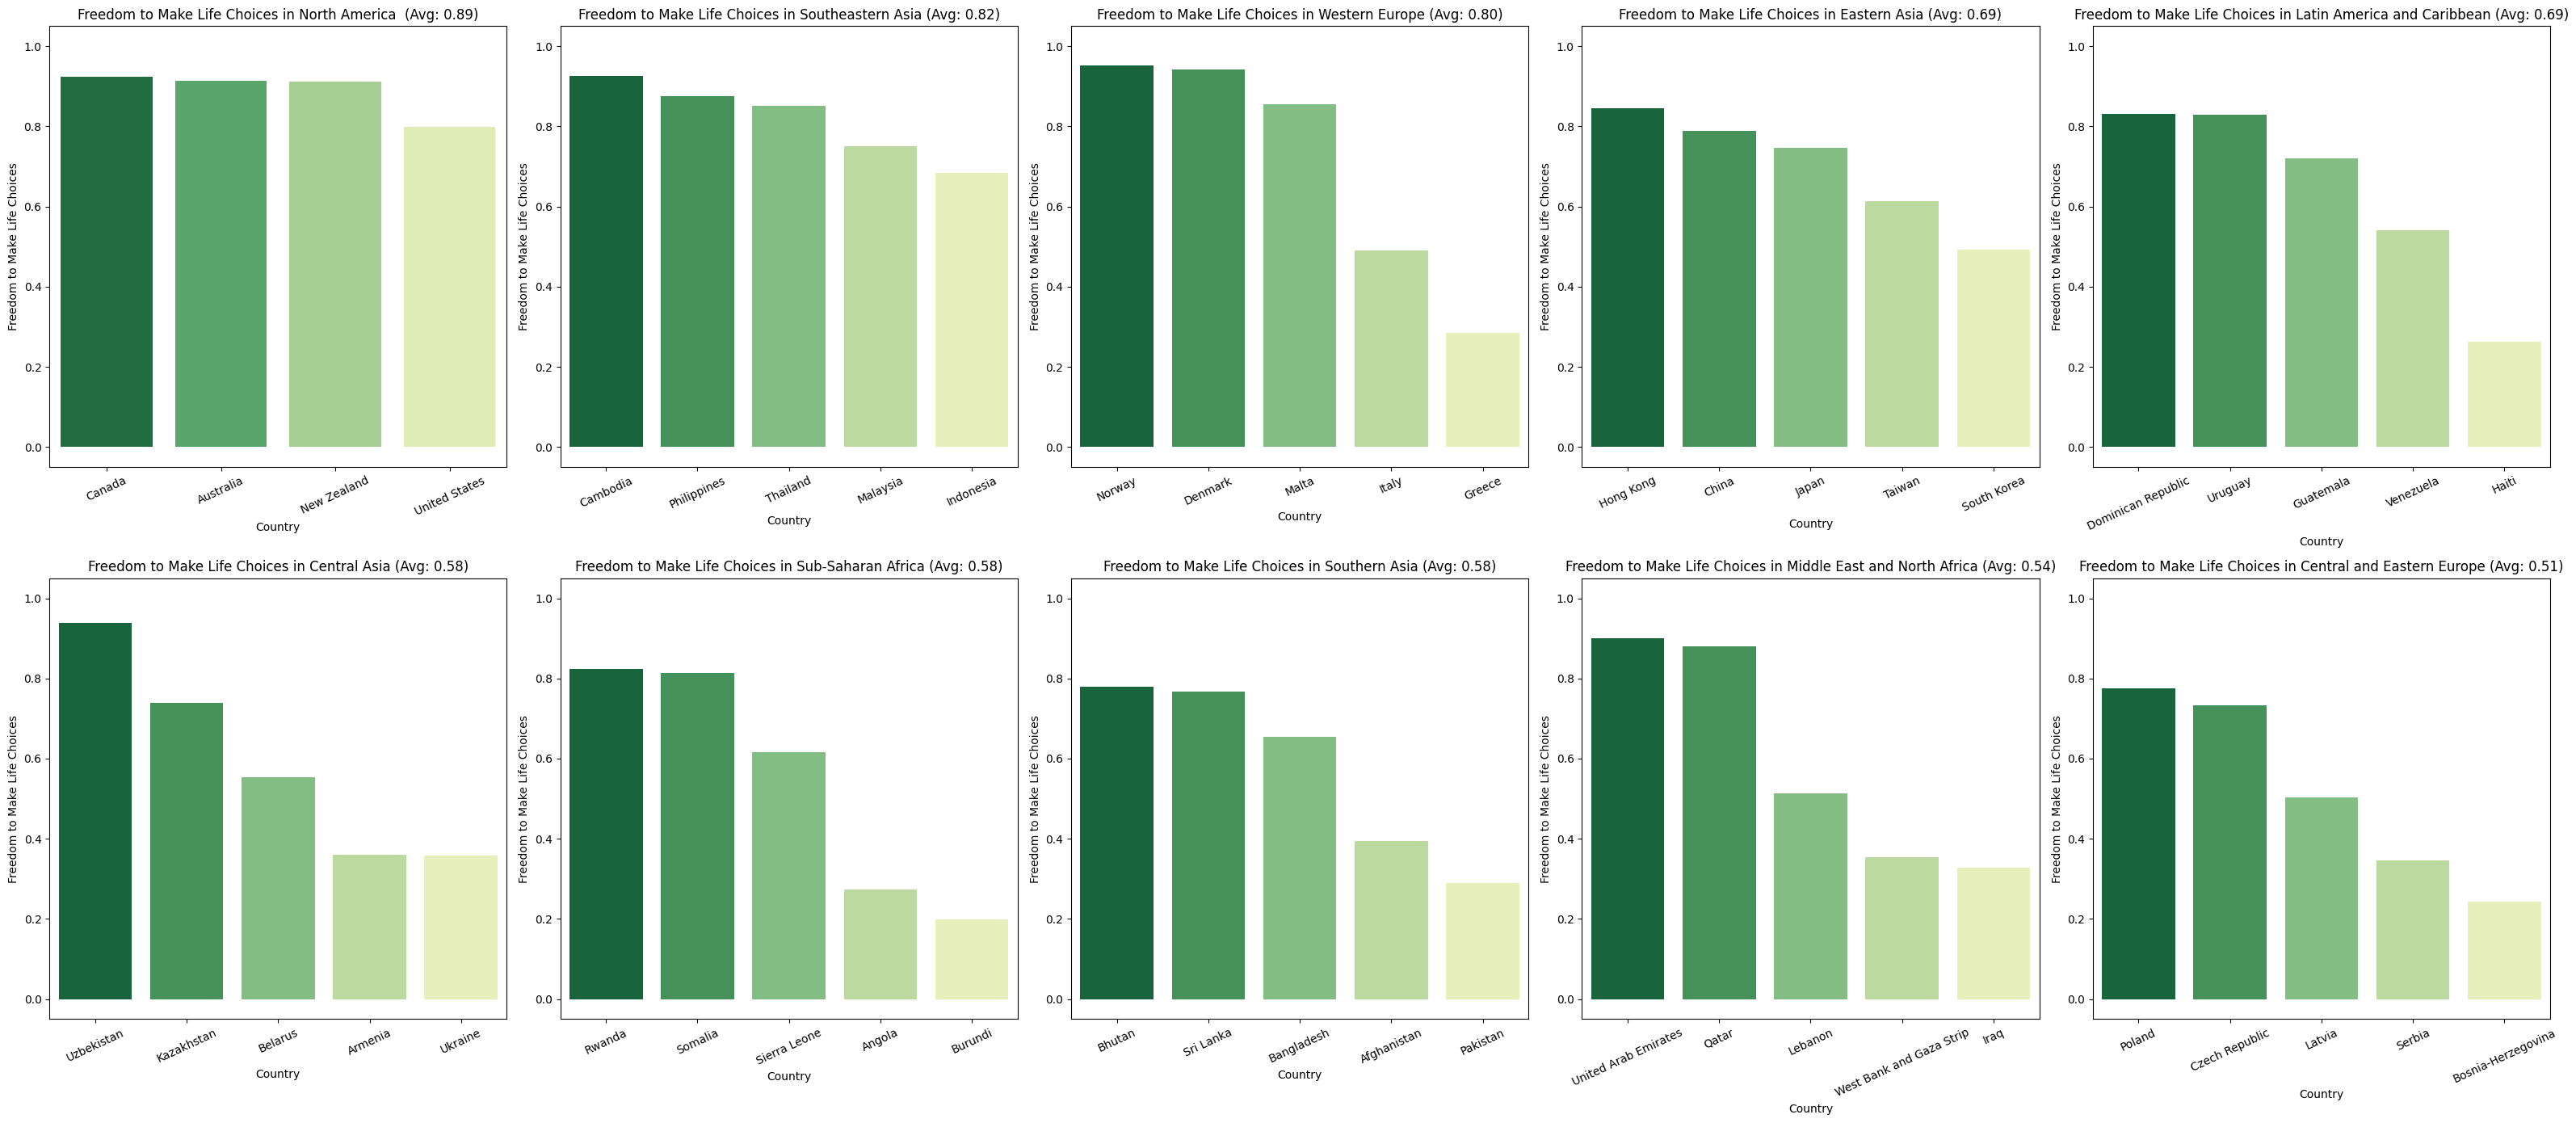

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to get top, middle, and bottom countries by Freedom_To_Make_Life_Choices within each region
def get_top_middle_bottom_countries(df, region, top_n=2, middle_n=1, bottom_n=2):
    regional_df = df[df['Regional_Indicator'] == region]
    sorted_countries = regional_df.groupby('country')['Freedom_To_Make_Life_Choices'].mean().sort_values()
    top_countries = sorted_countries[-top_n:]
    middle_index = len(sorted_countries) // 2
    middle_countries = sorted_countries[middle_index:middle_index + middle_n]
    bottom_countries = sorted_countries[:bottom_n]
    return pd.concat([top_countries, middle_countries, bottom_countries])

# Calculate regional averages for Freedom_To_Make_Life_Choices
regional_averages = df2.groupby('Regional_Indicator')['Freedom_To_Make_Life_Choices'].mean().sort_values(ascending=False)

# Get the unique regions sorted by average Freedom_To_Make_Life_Choices
regions = regional_averages.index

# DataFrame to hold top, middle, and bottom countries for each region
top_middle_bottom_df = pd.DataFrame()

# Loop through each region and get the top, middle, and bottom countries
for region in regions:
    top_middle_bottom_countries = get_top_middle_bottom_countries(df2, region, top_n=2, middle_n=1, bottom_n=2)
    region_df = pd.DataFrame({
        'country': top_middle_bottom_countries.index,
        'Freedom_To_Make_Life_Choices': top_middle_bottom_countries.values,
        'Regional_Indicator': region
    })
    top_middle_bottom_df = pd.concat([top_middle_bottom_df, region_df])

# Create a 2x5 plot grid (10 subplots)
fig, axes = plt.subplots(2, 5, figsize=(32, 14))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define y-axis limits for uniform scaling
y_min = -0.05
y_max = df2['Freedom_To_Make_Life_Choices'].max() + 0.05

# Plotting each region
for idx, region in enumerate(regions):
    if idx < len(axes):  # Ensure idx does not go out of bounds
        region_data = top_middle_bottom_df[top_middle_bottom_df['Regional_Indicator'] == region].sort_values(by='Freedom_To_Make_Life_Choices', ascending=False)
        sns.barplot(data=region_data, x='country', y='Freedom_To_Make_Life_Choices', palette='YlGn_r', ax=axes[idx])
        axes[idx].set_title(f'Freedom to Make Life Choices in {region} (Avg: {regional_averages[region]:.2f})')
        axes[idx].set_xlabel('Country')
        axes[idx].set_ylabel('Freedom to Make Life Choices')
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=25)
        axes[idx].set_ylim(y_min, y_max)  # Set uniform y-axis limits

# Remove any unused subplots
for idx in range(len(regions), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout for the plots
plt.tight_layout()
plt.show()


A notable pattern across all socio-economic indicators is that developed regions,
particularly North America and Western Europe, consistently rank at the top. These
regions benefit from robust economies, strong social support networks, and high personal
autonomy, which collectively contribute to greater stability. In contrast, regions with
lower development indicators such as Sub-Saharan Africa, Southern Asia, and parts of
the Middle East face significant socio-economic constraints, often correlating with
higher instability and vulnerability to unrest.
Freedom to make life choices emerges as another key factor influencing regional
resilience. Regions where individuals have greater autonomy in shaping their
education, careers, and economic opportunities tend to exhibit lower instability and
stronger societal cohesion. North America and Western Europe, which rank highest in
personal freedoms, also report strong economic and social metrics. Meanwhile, regions
with restricted freedoms, whether due to political instability, economic hardship, or
governance issues, often face higher levels of social unrest and dissatisfaction.

### Social Support and Terrorism Incidents


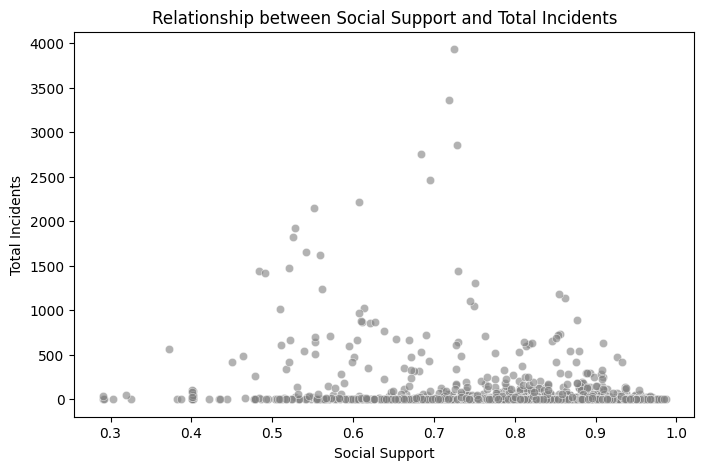

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df2, x='Social_Support', y='total_incidents', color='grey', alpha=0.6)
plt.title('Relationship between Social Support and Total Incidents')
plt.xlabel('Social Support')
plt.ylabel('Total Incidents')
plt.show()


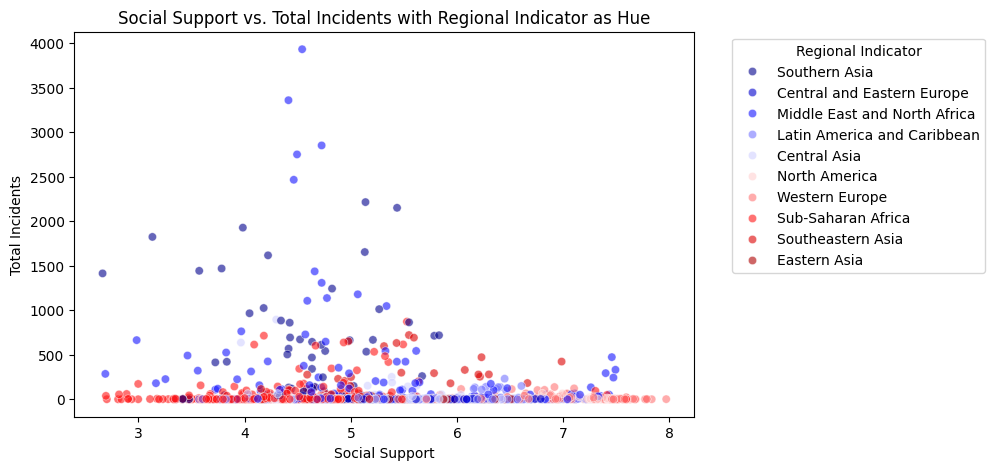

In [ ]:
# Plot Social Support vs. Total Incidents with Regional Indicator as hue
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df2, x='Life_Ladder', y='total_incidents', hue='Regional_Indicator', palette='seismic', alpha=0.6)
plt.title('Social Support vs. Total Incidents with Regional Indicator as Hue')
plt.xlabel('Social Support')
plt.ylabel('Total Incidents')
plt.legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


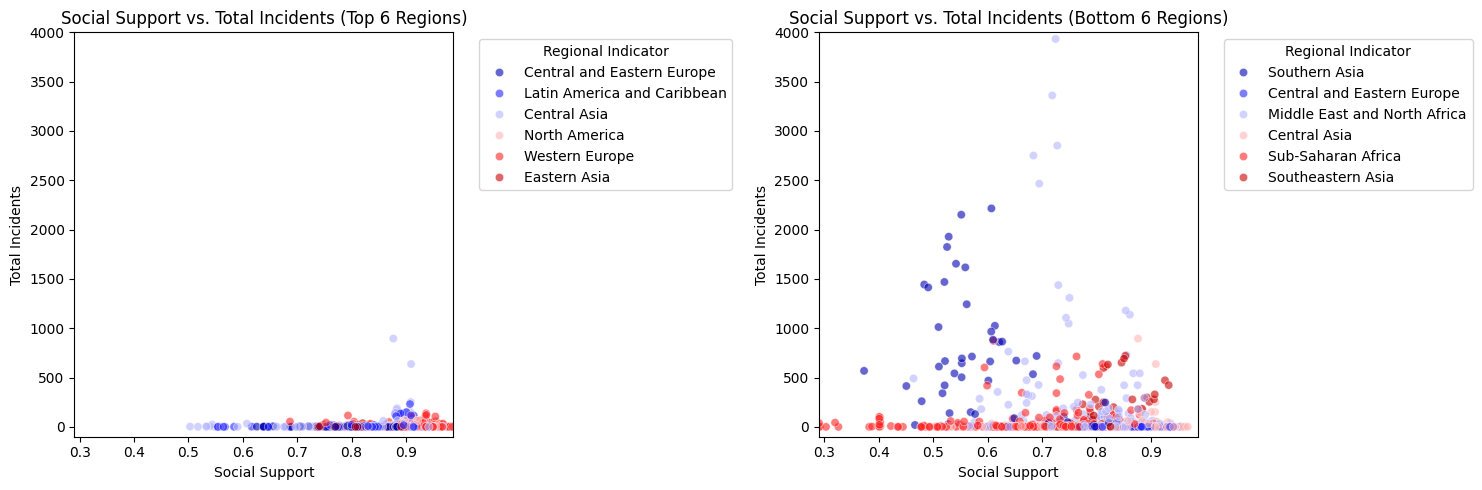

In [ ]:
# Calculate regional averages
regional_averages = df2.groupby('Regional_Indicator')['Social_Support'].mean().sort_values(ascending=False)

# Get the top six and bottom six regions
top_6_regions = regional_averages.head(6).index
bottom_6_regions = regional_averages.tail(6).index

# Combine top six and bottom six regions
selected_regions = top_6_regions.union(bottom_6_regions)

# Filter the dataset for the selected regions
selected_region_data = df2[df2['Regional_Indicator'].isin(selected_regions)]

# Determine the axis limits based on the overall data range
x_min, x_max = df2['Social_Support'].min(), df2['Social_Support'].max()
y_min, y_max = -100, 4000

# Create a 1x2 plot grid
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotting top six regions
top_6_data = selected_region_data[selected_region_data['Regional_Indicator'].isin(top_6_regions)]
sns.scatterplot(data=top_6_data, x='Social_Support', y='total_incidents', hue='Regional_Indicator', palette='seismic', alpha=0.6, ax=axes[0])
axes[0].set_title('Social Support vs. Total Incidents (Top 6 Regions)')
axes[0].set_xlabel('Social Support')
axes[0].set_ylabel('Total Incidents')
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)
axes[0].legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plotting bottom six regions
bottom_6_data = selected_region_data[selected_region_data['Regional_Indicator'].isin(bottom_6_regions)]
sns.scatterplot(data=bottom_6_data, x='Social_Support', y='total_incidents', hue='Regional_Indicator', palette='seismic', alpha=0.6, ax=axes[1])
axes[1].set_title('Social Support vs. Total Incidents (Bottom 6 Regions)')
axes[1].set_xlabel('Social Support')
axes[1].set_ylabel('Total Incidents')
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)
axes[1].legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for the plots
plt.tight_layout()
plt.show()


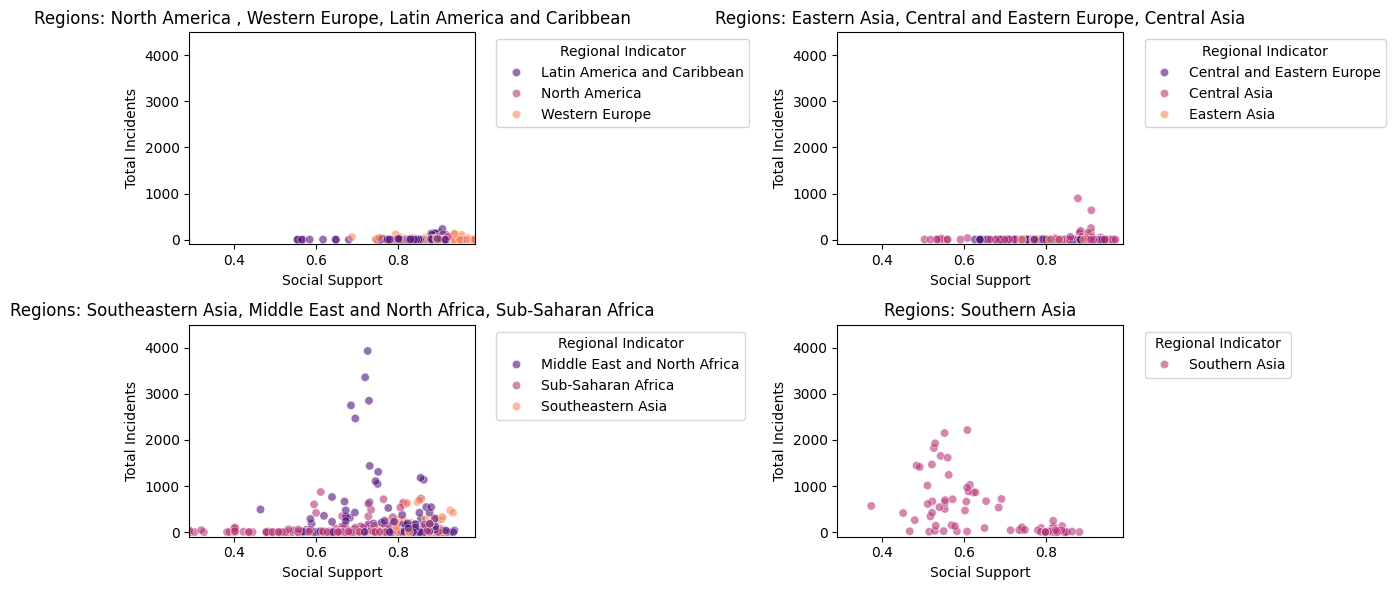

In [ ]:
# Calculate regional averages
regional_averages = df2.groupby('Regional_Indicator')['Social_Support'].mean().sort_values(ascending=False)

# Split the regions into groups of 3 for plotting
region_groups = [regional_averages.index[i:i+3] for i in range(0, len(regional_averages), 3)]

# Determine the axis limits based on the overall data range
x_min, x_max = df2['Social_Support'].min(), df2['Social_Support'].max()
y_min, y_max = -100, 4500

# Create a 2x2 plot grid
fig, axes = plt.subplots(2, 2, figsize=(13, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting each group of regions
for i, group in enumerate(region_groups):
    group_data = df2[df2['Regional_Indicator'].isin(group)]
    sns.scatterplot(data=group_data, x='Social_Support', y='total_incidents', hue='Regional_Indicator', palette='magma', alpha=0.6, ax=axes[i])
    axes[i].set_title(f'Regions: {", ".join(group)}')
    axes[i].set_xlabel('Social Support')
    axes[i].set_ylabel('Total Incidents')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    axes[i].legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for the plots
plt.tight_layout()
plt.show()



The analysis of social support's relationship with terrorism incidents reveals a compelling inverse correlation across global regions, with notable variations in pattern strength and consistency.

**Key Observations:**

- Developed regions (**North America, Western Europe, parts of Latin America**) show **high social support (0.7-0.9)** and consistently **low incident rates** (generally below 100 incidents).
- In the **Middle East and North Africa**, countries exhibit a **wide range of incident counts** (near zero to ~4,000) even within similar social support levels (0.6-0.8), indicating other influential regional factors.
- **Southern Asia** displays a **clear negative correlation** between social support and incident counts, with **lower support scores (0.3-0.5)** correlating with **higher incidents** (1,000-2,000 range) and **higher support scores (0.7-0.8)** correlating with significantly fewer incidents.
- **Eastern Asia, Central and Eastern Europe, Central Asia** show relatively **consistent social support levels (0.7-0.9)** with **lower incident counts**, but occasional spikes indicate that social support alone isn't a guaranteed preventive measure.
- **Sub-Saharan Africa** and **Southeastern Asia** show mixed patterns, suggesting that **regional factors** may moderate the relationship between social support and terrorism incidents.


#### GDP Levels and Terrorism Incidents

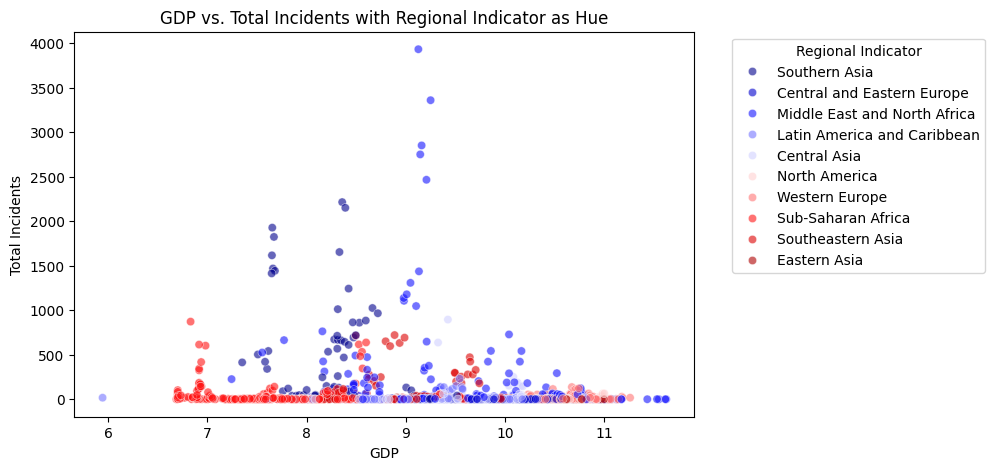

In [ ]:
# Plot Social Support vs. Total Incidents with Regional Indicator as hue
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df2, x='Log_GDP_Per_Capita', y='total_incidents', hue='Regional_Indicator', palette='seismic', alpha=0.6)
plt.title('GDP vs. Total Incidents with Regional Indicator as Hue')
plt.xlabel('GDP')
plt.ylabel('Total Incidents')
plt.legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


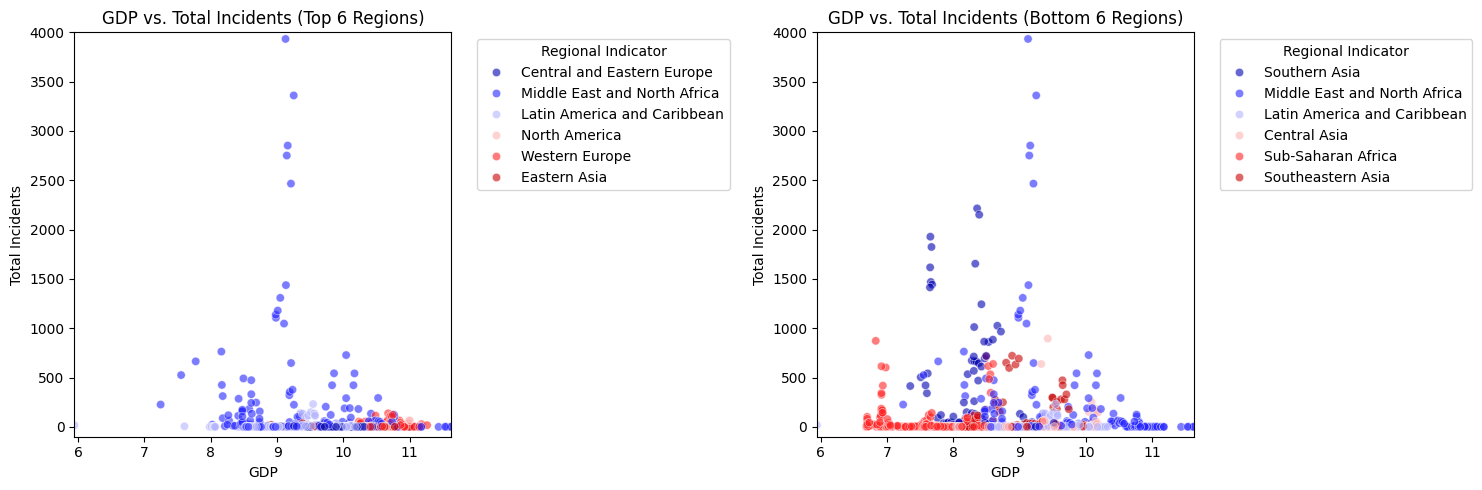

In [ ]:
# Calculate regional averages
regional_averages = df2.groupby('Regional_Indicator')['Log_GDP_Per_Capita'].mean().sort_values(ascending=False)

# Get the top six and bottom six regions
top_6_regions = regional_averages.head(6).index
bottom_6_regions = regional_averages.tail(6).index

# Combine top six and bottom six regions
selected_regions = top_6_regions.union(bottom_6_regions)

# Filter the dataset for the selected regions
selected_region_data = df2[df2['Regional_Indicator'].isin(selected_regions)]

# Determine the axis limits based on the overall data range
x_min, x_max = df2['Log_GDP_Per_Capita'].min(), df2['Log_GDP_Per_Capita'].max()
y_min, y_max = -100, 4000

# Create a 1x2 plot grid
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotting top six regions
top_6_data = selected_region_data[selected_region_data['Regional_Indicator'].isin(top_6_regions)]
sns.scatterplot(data=top_6_data, x='Log_GDP_Per_Capita', y='total_incidents', hue='Regional_Indicator', palette='seismic', alpha=0.6, ax=axes[0])
axes[0].set_title('GDP vs. Total Incidents (Top 6 Regions)')
axes[0].set_xlabel('GDP')
axes[0].set_ylabel('Total Incidents')
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)
axes[0].legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plotting bottom six regions
bottom_6_data = selected_region_data[selected_region_data['Regional_Indicator'].isin(bottom_6_regions)]
sns.scatterplot(data=bottom_6_data, x='Log_GDP_Per_Capita', y='total_incidents', hue='Regional_Indicator', palette='seismic', alpha=0.6, ax=axes[1])
axes[1].set_title('GDP vs. Total Incidents (Bottom 6 Regions)')
axes[1].set_xlabel('GDP')
axes[1].set_ylabel('Total Incidents')
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)
axes[1].legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for the plots
plt.tight_layout()
plt.show()


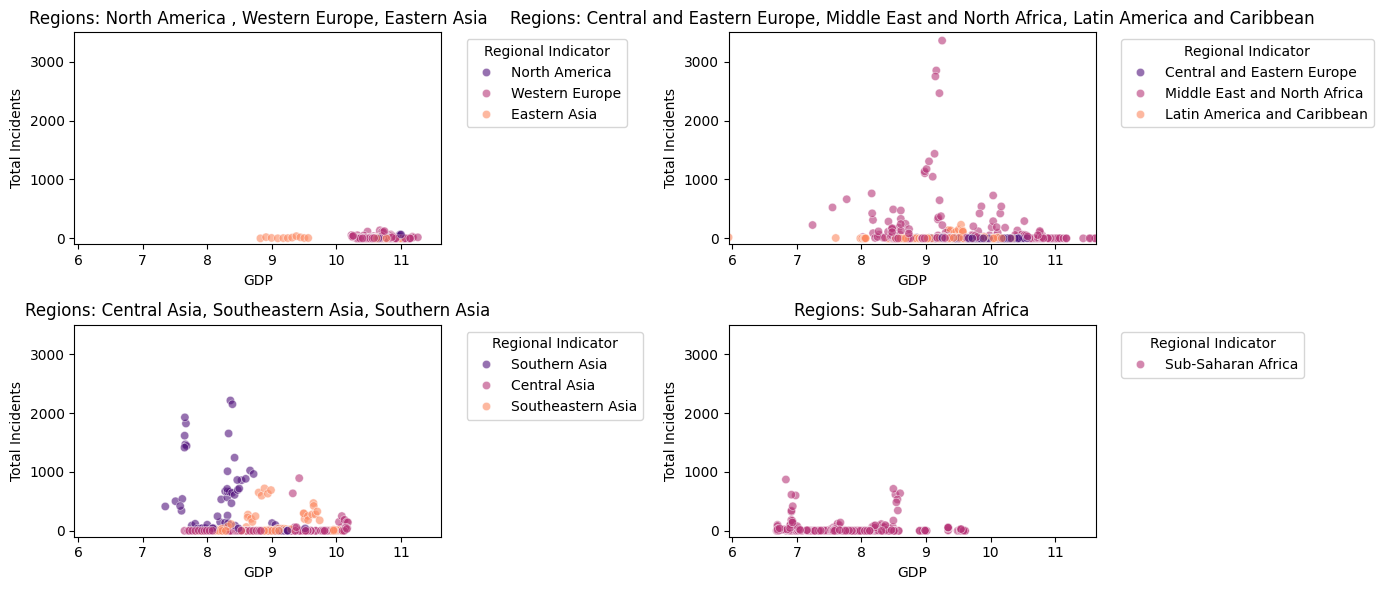

In [ ]:
# Calculate regional averages
regional_averages = df2.groupby('Regional_Indicator')['Log_GDP_Per_Capita'].mean().sort_values(ascending=False)

# Split the regions into groups of 3 for plotting
region_groups = [regional_averages.index[i:i+3] for i in range(0, len(regional_averages), 3)]

# Determine the axis limits based on the overall data range
x_min, x_max = df2['Log_GDP_Per_Capita'].min(), df2['Log_GDP_Per_Capita'].max()
y_min, y_max = -100, 3500

# Create a 2x2 plot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting each group of regions
for i, group in enumerate(region_groups):
    group_data = df2[df2['Regional_Indicator'].isin(group)]
    sns.scatterplot(data=group_data, x='Log_GDP_Per_Capita', y='total_incidents', hue='Regional_Indicator', palette='magma', alpha=0.6, ax=axes[i])
    axes[i].set_title(f'Regions: {", ".join(group)}')
    axes[i].set_xlabel('GDP')
    axes[i].set_ylabel('Total Incidents')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    axes[i].legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for the plots
plt.tight_layout()
plt.show()




The analysis shows a correlation between GDP levels and terrorism incidents, with variations across regions.

**Key Observations:**

- **North America, Western Europe, and Eastern Asia**: Higher GDP levels correspond to significantly lower incidents, aligning with stronger institutions and security infrastructure.
- **Central & Eastern Europe, the Middle East & North Africa, and Latin America**: More varied patterns, with mid-range GDP countries experiencing a concentration of incidents.
- **Southern Asia, Central Asia, and Southeastern Asia**: Highly clustered incidents, particularly in **Southern Asia**, where even moderate GDP countries experience considerable terrorism activity.
- **Sub-Saharan Africa**: Despite lower GDP levels, varied incident rates suggest governance, policy, and social factors are equally critical.


#### Healthy Life Expectancy and Terrorism Incidents


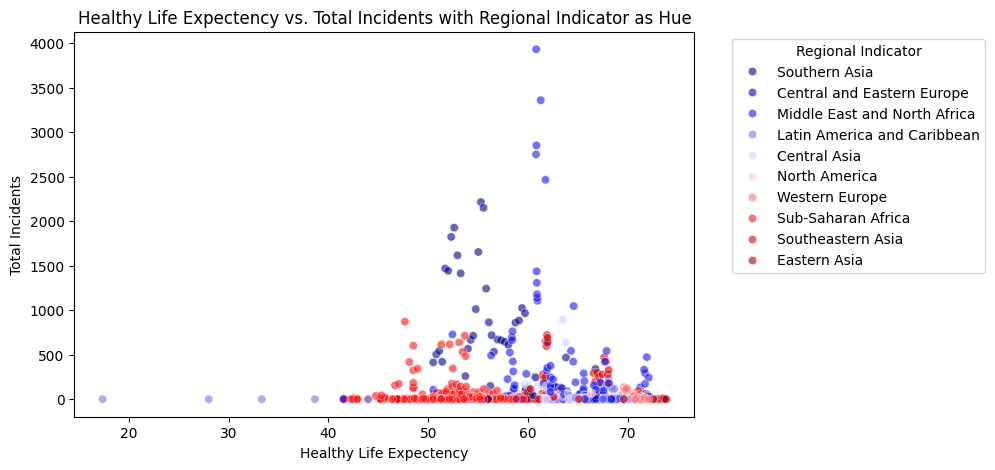

In [ ]:
# Plot Social Support vs. Total Incidents with Regional Indicator as hue
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df2, x='Healthy_Life_Expectancy_At_Birth', y='total_incidents', hue='Regional_Indicator', palette='seismic', alpha=0.6)
plt.title('Healthy Life Expectency vs. Total Incidents with Regional Indicator as Hue')
plt.xlabel('Healthy Life Expectency')
plt.ylabel('Total Incidents')
plt.legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


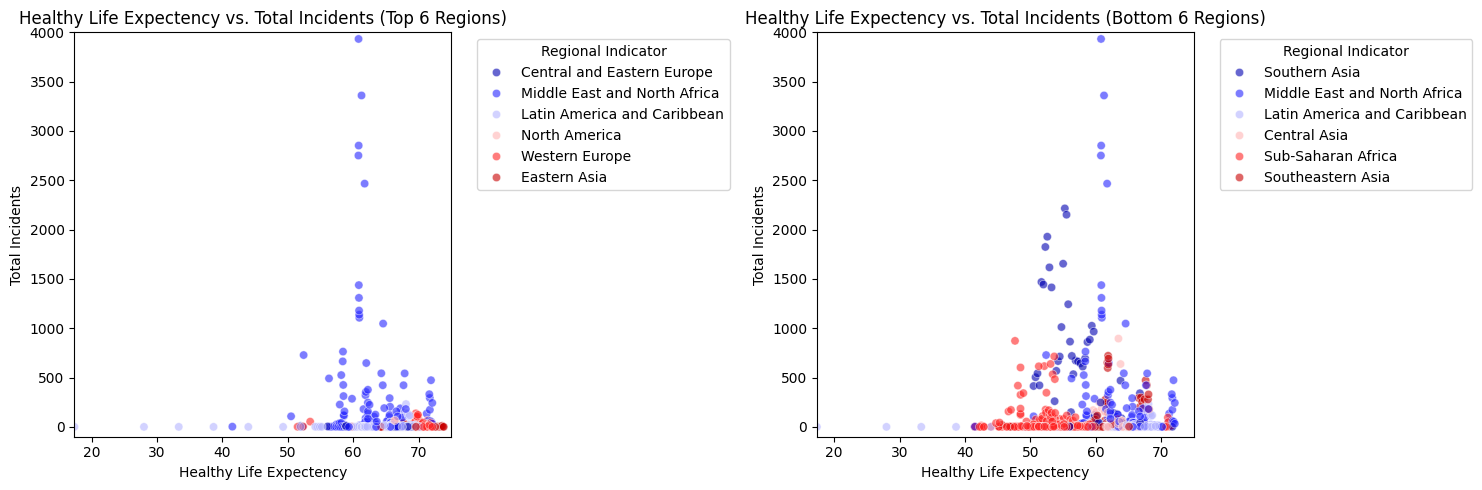

In [ ]:
# Calculate regional averages
regional_averages = df2.groupby('Regional_Indicator')['Healthy_Life_Expectancy_At_Birth'].mean().sort_values(ascending=False)

# Get the top six and bottom six regions
top_6_regions = regional_averages.head(6).index
bottom_6_regions = regional_averages.tail(6).index

# Combine top six and bottom six regions
selected_regions = top_6_regions.union(bottom_6_regions)

# Filter the dataset for the selected regions
selected_region_data = df2[df2['Regional_Indicator'].isin(selected_regions)]

# Determine the axis limits based on the overall data range
x_min, x_max = df2['Healthy_Life_Expectancy_At_Birth'].min(), 75
y_min, y_max = -100, 4000

# Create a 1x2 plot grid
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotting top six regions
top_6_data = selected_region_data[selected_region_data['Regional_Indicator'].isin(top_6_regions)]
sns.scatterplot(data=top_6_data, x='Healthy_Life_Expectancy_At_Birth', y='total_incidents', hue='Regional_Indicator', palette='seismic', alpha=0.6, ax=axes[0])
axes[0].set_title('Healthy Life Expectency vs. Total Incidents (Top 6 Regions)')
axes[0].set_xlabel('Healthy Life Expectency')
axes[0].set_ylabel('Total Incidents')
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)
axes[0].legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plotting bottom six regions
bottom_6_data = selected_region_data[selected_region_data['Regional_Indicator'].isin(bottom_6_regions)]
sns.scatterplot(data=bottom_6_data, x='Healthy_Life_Expectancy_At_Birth', y='total_incidents', hue='Regional_Indicator', palette='seismic', alpha=0.6, ax=axes[1])
axes[1].set_title('Healthy Life Expectency vs. Total Incidents (Bottom 6 Regions)')
axes[1].set_xlabel('Healthy Life Expectency')
axes[1].set_ylabel('Total Incidents')
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)
axes[1].legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for the plots
plt.tight_layout()
plt.show()


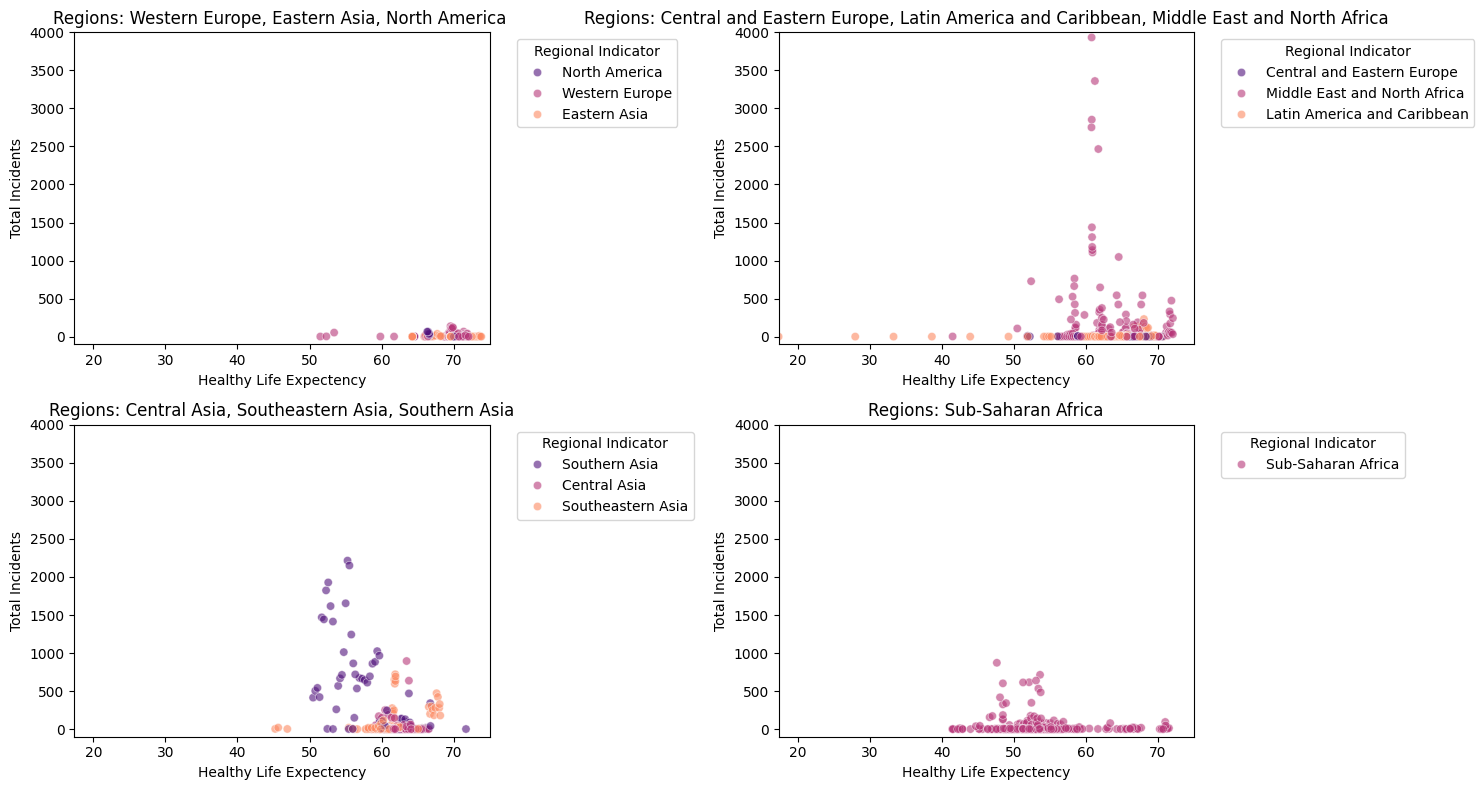

In [ ]:
# Calculate regional averages
regional_averages = df2.groupby('Regional_Indicator')['Healthy_Life_Expectancy_At_Birth'].mean().sort_values(ascending=False)

# Split the regions into groups of 3 for plotting
region_groups = [regional_averages.index[i:i+3] for i in range(0, len(regional_averages), 3)]

# Determine the axis limits based on the overall data range
x_min, x_max = df2['Healthy_Life_Expectancy_At_Birth'].min(), 75
y_min, y_max = -100, 4000

# Create a 2x2 plot grid
fig, axes = plt.subplots(2, 2, figsize=(15,8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting each group of regions
for i, group in enumerate(region_groups):
    group_data = df2[df2['Regional_Indicator'].isin(group)]
    sns.scatterplot(data=group_data, x='Healthy_Life_Expectancy_At_Birth', y='total_incidents', hue='Regional_Indicator', palette='magma', alpha=0.6, ax=axes[i])
    axes[i].set_title(f'Regions: {", ".join(group)}')
    axes[i].set_xlabel('Healthy Life Expectency')
    axes[i].set_ylabel('Total Incidents')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    axes[i].legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for the plots
plt.tight_layout()
plt.show()



This analysis reveals a correlation between healthy life expectancy and terrorism incidents, with variations across regions.

**Key Observations:**

- **Western Europe, Eastern Asia, and North America**: **High healthy life expectancy (65-75 years)** correlates with **consistently low incident rates** (generally below 100).
- **Middle East and North Africa**: Despite **moderate healthy life expectancy (50-65 years)**, the region shows a **high variation in incident counts** (near zero to ~4,000), indicating other influential factors.
- **Southern Asia**: **Lower healthy life expectancy (50-60 years)** correlates with **higher incident counts** (1,000-2,000), suggesting that poor health outcomes contribute to societal vulnerabilities.
- **Sub-Saharan Africa**: **Low healthy life expectancy (40-55 years)** but relatively **low incident counts**, indicating regional factors may moderate the relationship.


#### Happiness Scores and Terrorism Incidents


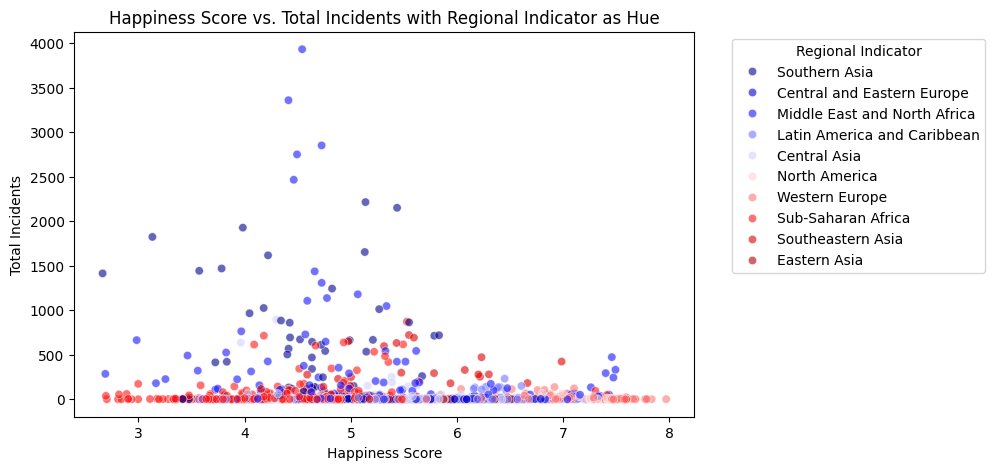

In [ ]:
# Plot Social Support vs. Total Incidents with Regional Indicator as hue
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df2, x='Life_Ladder', y='total_incidents', hue='Regional_Indicator', palette='seismic', alpha=0.6)
plt.title('Happiness Score vs. Total Incidents with Regional Indicator as Hue')
plt.xlabel('Happiness Score')
plt.ylabel('Total Incidents')
plt.legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


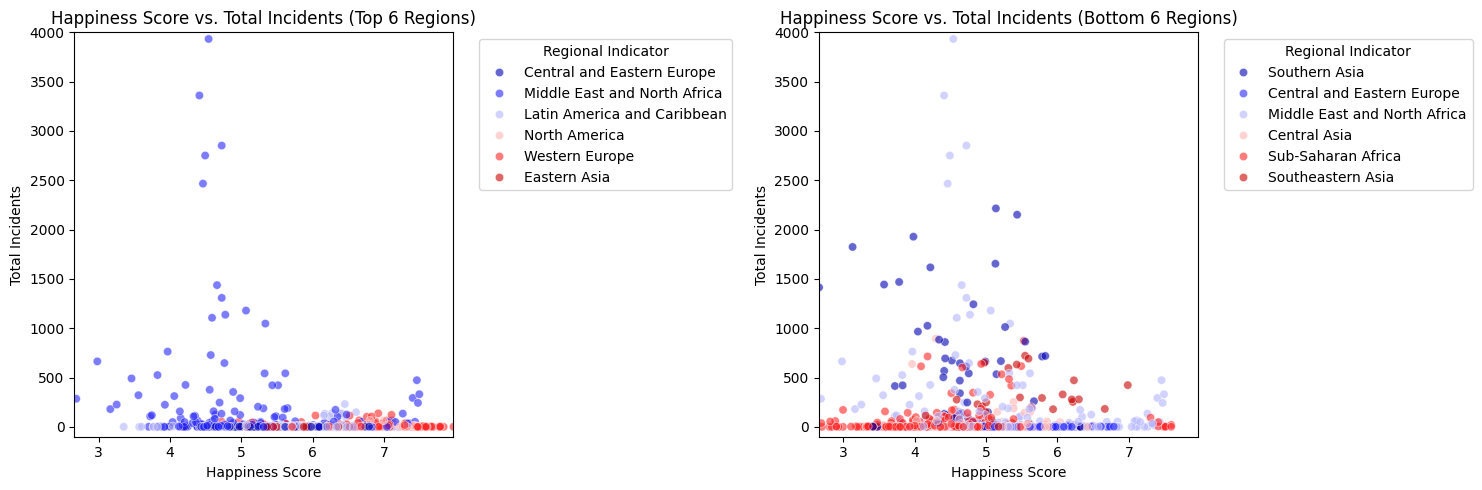

In [ ]:
# Calculate regional averages
regional_averages = df2.groupby('Regional_Indicator')['Life_Ladder'].mean().sort_values(ascending=False)

# Get the top six and bottom six regions
top_6_regions = regional_averages.head(6).index
bottom_6_regions = regional_averages.tail(6).index

# Combine top six and bottom six regions
selected_regions = top_6_regions.union(bottom_6_regions)

# Filter the dataset for the selected regions
selected_region_data = df2[df2['Regional_Indicator'].isin(selected_regions)]

# Determine the axis limits based on the overall data range
x_min, x_max = df2['Life_Ladder'].min(), df2['Life_Ladder'].max()
y_min, y_max = -100, 4000

# Create a 1x2 plot grid
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotting top six regions
top_6_data = selected_region_data[selected_region_data['Regional_Indicator'].isin(top_6_regions)]
sns.scatterplot(data=top_6_data, x='Life_Ladder', y='total_incidents', hue='Regional_Indicator', palette='seismic', alpha=0.6, ax=axes[0])
axes[0].set_title('Happiness Score vs. Total Incidents (Top 6 Regions)')
axes[0].set_xlabel('Happiness Score')
axes[0].set_ylabel('Total Incidents')
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)
axes[0].legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plotting bottom six regions
bottom_6_data = selected_region_data[selected_region_data['Regional_Indicator'].isin(bottom_6_regions)]
sns.scatterplot(data=bottom_6_data, x='Life_Ladder', y='total_incidents', hue='Regional_Indicator', palette='seismic', alpha=0.6, ax=axes[1])
axes[1].set_title('Happiness Score vs. Total Incidents (Bottom 6 Regions)')
axes[1].set_xlabel('Happiness Score')
axes[1].set_ylabel('Total Incidents')
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)
axes[1].legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for the plots
plt.tight_layout()
plt.show()


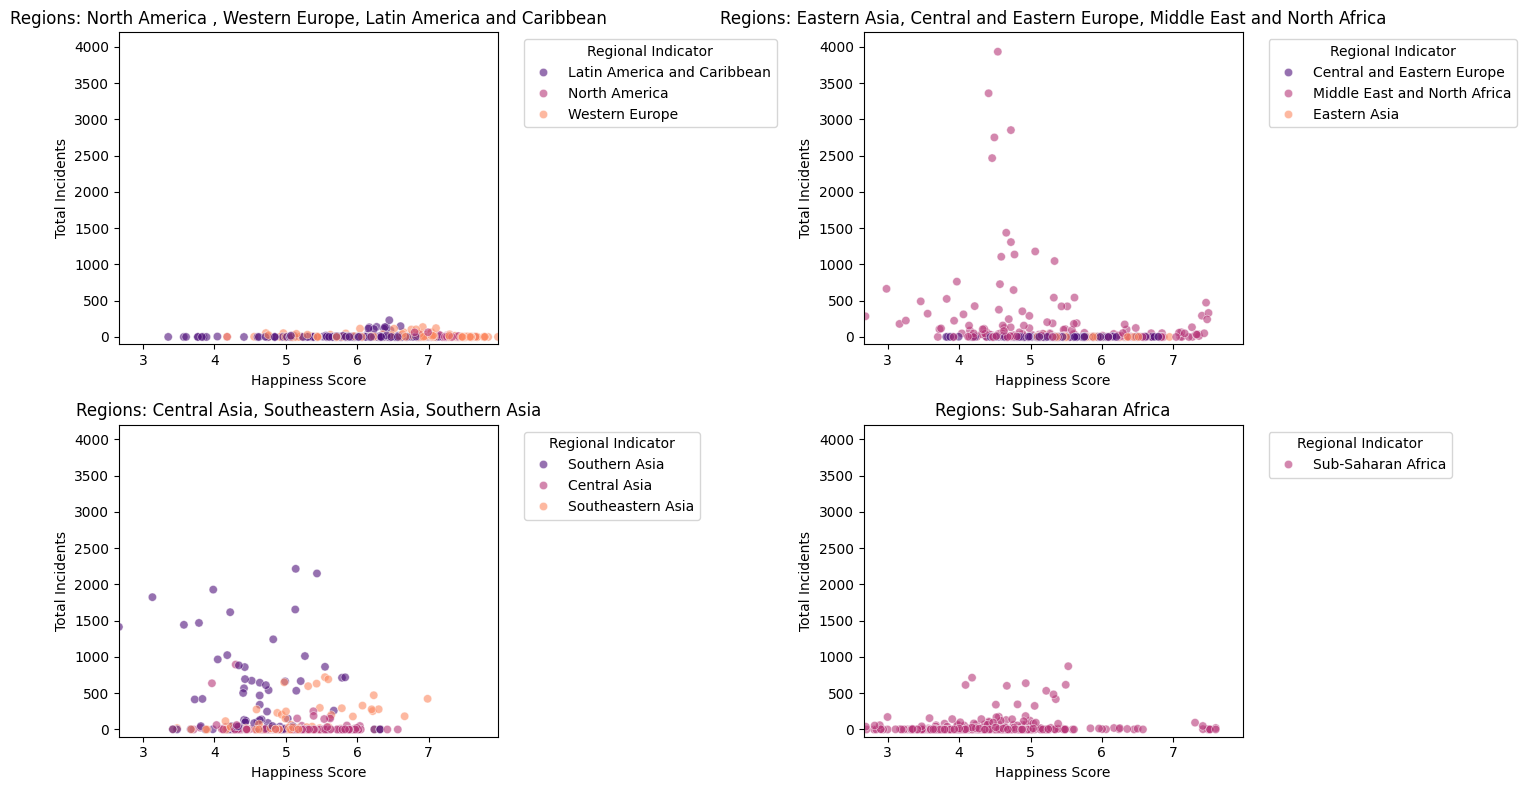

In [ ]:
# Calculate regional averages
regional_averages = df2.groupby('Regional_Indicator')['Life_Ladder'].mean().sort_values(ascending=False)

# Split the regions into groups of 3 for plotting
region_groups = [regional_averages.index[i:i+3] for i in range(0, len(regional_averages), 3)]

# Determine the axis limits based on the overall data range
x_min, x_max = df2['Life_Ladder'].min(), df2['Life_Ladder'].max()
y_min, y_max = -100, 4200

# Create a 2x2 plot grid
num_cols = 2
num_rows = 2  # For 2x2 plot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting each group of regions
for i, group in enumerate(region_groups):
    group_data = df2[df2['Regional_Indicator'].isin(group)]
    sns.scatterplot(data=group_data, x='Life_Ladder', y='total_incidents', hue='Regional_Indicator', palette='magma', alpha=0.6, ax=axes[i])
    axes[i].set_title(f'Regions: {", ".join(group)}')
    axes[i].set_xlabel('Happiness Score')
    axes[i].set_ylabel('Total Incidents')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    axes[i].legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for the plots
plt.tight_layout()
plt.show()


This analysis reveals the relationship between happiness scores and terrorism incidents, highlighting regional variations.

**Key Observations:**

- **North America, Western Europe, and Latin America**: **High happiness scores (5.5-7.5)** coupled with **low incident rates** (generally below 100) suggest higher societal satisfaction may reduce vulnerability to extremism.
- **Middle East and North Africa**: **Moderate happiness scores (4-6)** with extreme variation in incident counts (near zero to ~4,000) indicate other regional factors at play.
- **Southern Asia**: **Lower happiness scores (3-5)** correlate with **elevated incident counts** (1,000-2,000), showing a strong inverse relationship between happiness and security incidents.
- **Central and Eastern Europe**: **Moderate to good happiness scores (5-7)** generally correspond to lower incident rates, but with exceptions.
- **Sub-Saharan Africa**: **Relatively low happiness scores (3-5)** but moderate incident levels suggest other cultural or social factors may influence security.


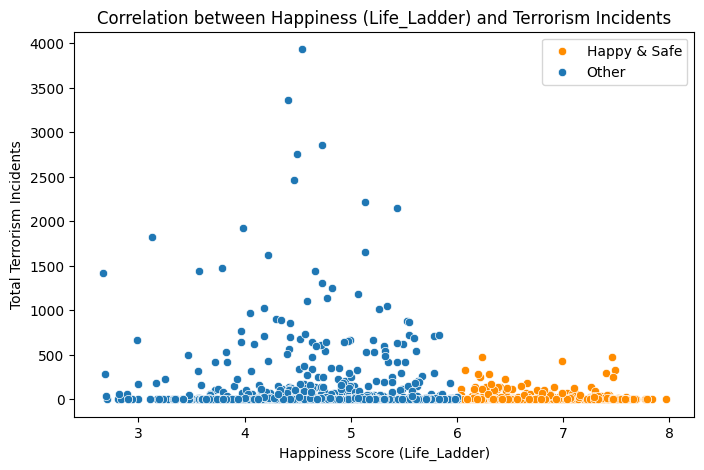

In [ ]:
# Separate the data based on the condition
highlight_data = df2[(df2['Life_Ladder'] > 6)]
other_data = df2[~(df2['Life_Ladder'] > 6)]

# Plotting the scatter plot
plt.figure(figsize=(8, 5))

# Scatter plot for highlighted data
sns.scatterplot(data=highlight_data, x='Life_Ladder', y='total_incidents', color='darkorange', label='Happy & Safe')

# Scatter plot for other data
sns.scatterplot(data=other_data, x='Life_Ladder', y='total_incidents', label='Other')

# Add vertical line for Happiness Score = 6
# plt.axvline(x=6, color='red', linestyle='--', label='Happiness Score = 6')

plt.title('Correlation between Happiness (Life_Ladder) and Terrorism Incidents')
plt.xlabel('Happiness Score (Life_Ladder)')
plt.ylabel('Total Terrorism Incidents')
plt.legend()
plt.show()



The relationship between happiness scores and terrorism incidents reveals a notable pattern: **countries with lower happiness scores (below 6) experience significantly more terrorism incidents, with some reaching up to 4000 incidents**. In contrast, **countries with higher happiness scores (above 6) consistently show fewer terrorism incidents, typically below 500**. This suggests a **strong negative correlation** - as happiness levels increase, terrorism incidents tend to decrease. The greater variance in terrorism incidents among countries with lower happiness scores (3-5 range) indicates that while happiness might be a factor, other socio-economic variables likely play important roles in the occurrence of terrorism.


#### Freedom to make Life Choice and Terrorism Incidents

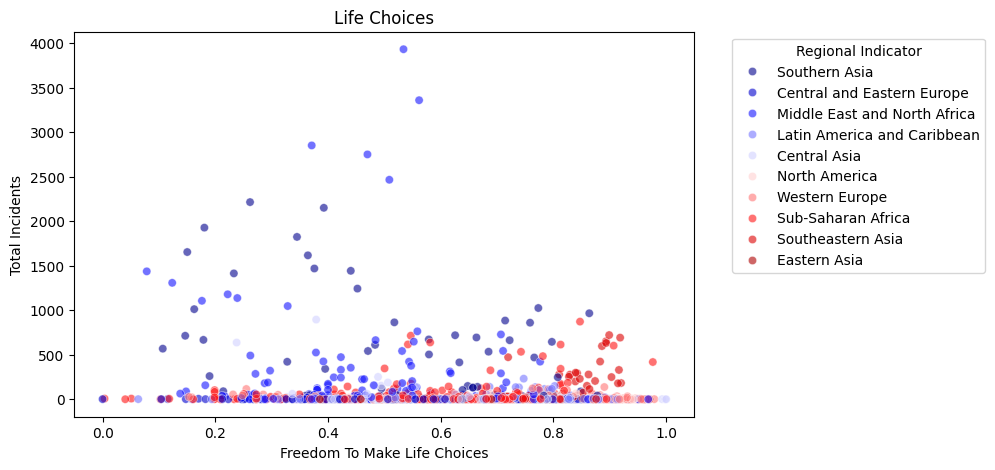

In [ ]:
# Plot Freedom to make Life Choice vs. Total Incidents with Regional Indicator as hue
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df2, x='Freedom_To_Make_Life_Choices', y='total_incidents', hue='Regional_Indicator', palette='seismic', alpha=0.6)
plt.title('Life Choices')
plt.xlabel('Freedom To Make Life Choices')
plt.ylabel('Total Incidents')
plt.legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


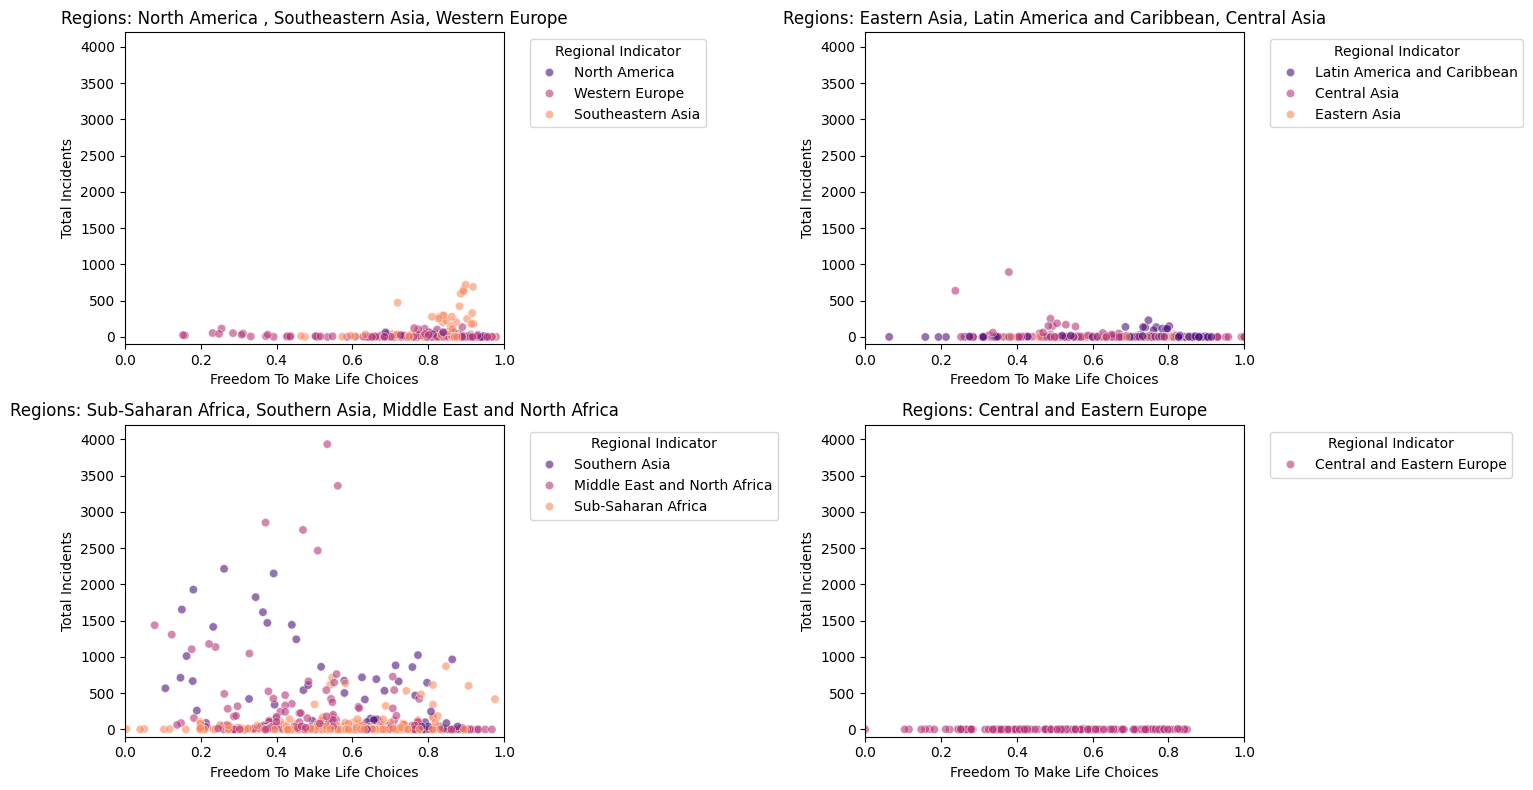

In [ ]:
# Calculate regional averages
regional_averages = df2.groupby('Regional_Indicator')['Freedom_To_Make_Life_Choices'].mean().sort_values(ascending=False)

# Split the regions into groups of 3 for plotting
region_groups = [regional_averages.index[i:i+3] for i in range(0, len(regional_averages), 3)]

# Determine the axis limits based on the overall data range
x_min, x_max = df2['Freedom_To_Make_Life_Choices'].min(), df2['Freedom_To_Make_Life_Choices'].max()
y_min, y_max = -100, 4200

# Create a 2x2 plot grid
num_cols = 2
num_rows = 2  # For 2x2 plot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting each group of regions
for i, group in enumerate(region_groups):
    group_data = df2[df2['Regional_Indicator'].isin(group)]
    sns.scatterplot(data=group_data, x='Freedom_To_Make_Life_Choices', y='total_incidents', hue='Regional_Indicator', palette='magma', alpha=0.6, ax=axes[i])
    axes[i].set_title(f'Regions: {", ".join(group)}')
    axes[i].set_xlabel('Freedom To Make Life Choices')
    axes[i].set_ylabel('Total Incidents')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    axes[i].legend(title='Regional Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for the plots
plt.tight_layout()
plt.show()


The analysis of multiple socio-economic indicators reveals a consistent inverse
relationship between positive development metrics and terrorism prevalence, though the
strength of this relationship varies by region. Countries with higher happiness scores,
stronger social support systems, greater economic stability, and better health
outcomes tend to experience fewer terrorist incidents. However, regional patterns show
important exceptions, particularly in mid-to-high GDP nations that continue to face
persistent terrorism threats, underscoring that economic growth alone does not
guarantee security.
Developed regions generally demonstrate greater resilience against terrorism,
suggesting that comprehensive socio-economic development enhances stability.
However, the degree of this impact varies, as seen in regions where economic growth
exists alongside persistent security challenges. This indicates that no single factor—
 whether economic prosperity, governance quality, or social stability—determines security
outcomes in isolation.
These findings highlight critical implications for policy and security strategies.
Strengthening social services, economic opportunities, public health infrastructure,
and community support systems appears to play a role in reducing terrorism risks.
48
Regions with lower socio-economic indicators likely require multi-faceted interventions
that address both development and security concerns simultaneously. The data
reinforces the need for integrated, region-specific approaches, recognizing socio
economic factors as essential components of resilience while acknowledging their
varying degrees of effectiveness depending on local conditions.

## **Final Thoughts**  

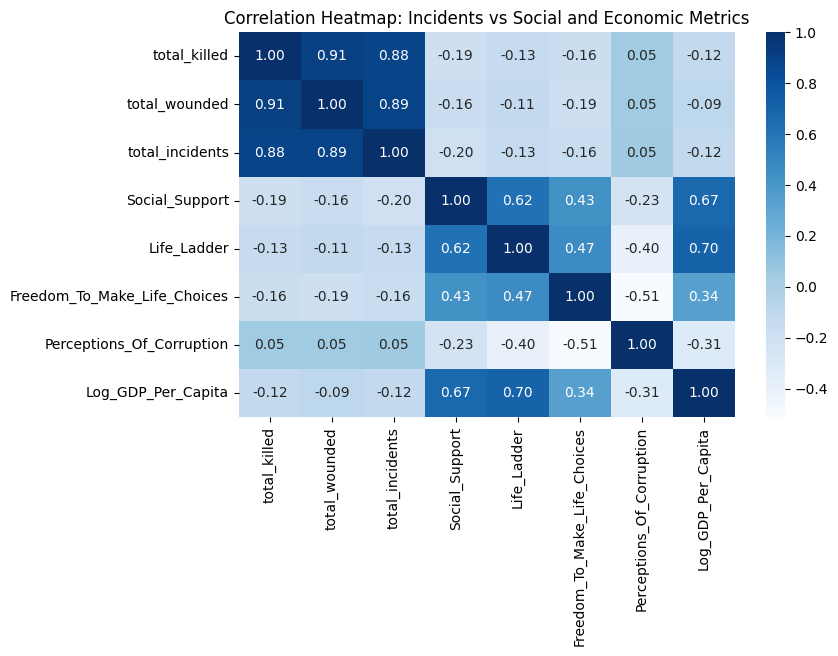

In [ ]:
# Select relevant columns for correlation
causality_df = df2[['total_killed', 'total_wounded','total_incidents', 'Social_Support',
                     'Life_Ladder', 'Freedom_To_Make_Life_Choices',
                     'Perceptions_Of_Corruption', 'Log_GDP_Per_Capita']]

# Calculate the correlation matrix
correlation_matrix = causality_df.corr()

# Plot heatmap for better visualization
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation Heatmap: Incidents vs Social and Economic Metrics")
plt.show()




The heatmap analysis provides compelling evidence of how economic and social factors influence terrorism. While no single factor can entirely eliminate violence, **stronger social support, higher GDP, greater freedom, and lower corruption** significantly reduce the likelihood and severity of terrorist incidents.  

Key insights from the correlation analysis reinforce this:  
- **Higher social support** correlates with fewer fatalities (-0.18), suggesting that **stronger communities are more resilient against extremism**.  
- **Happiness (Life Ladder) negatively correlates with total deaths (-0.13)**, indicating that **a more satisfied population is less prone to violent unrest**.  
- **Freedom to make life choices** also shows a negative relationship with fatalities (-0.16) and injuries (-0.18), emphasizing that **personal autonomy and socio-political stability play a crucial role in maintaining peace**.  
- **GDP per capita has a strong positive correlation with both social support (0.67) and happiness (0.70)**, highlighting that **wealthier nations generally provide better living conditions and security**.  
- Despite these positive trends, **corruption remains a persistent challenge**, with a **negative impact on both happiness (-0.39) and freedom (-0.51)**. A **slight positive correlation (0.04) between corruption perception and casualties** suggests that **governance failures may indirectly fuel violence**.  

While economic growth and social stability **do not completely eradicate terrorism**, they **diminish its frequency and intensity**, reducing it to a mere single-digit factor before it eventually fades. Addressing these issues holistically—by fostering economic stability, social trust, and transparent governance—can pave the way for a safer and more harmonious society.  

This analysis highlights the undeniable link between **socio-economic factors and global security**. It reinforces my understanding that **investing in education, economic opportunities, and institutional trust** is vital in combating extremism. I hope this study encourages further research and discussion on **data-driven solutions to global conflicts**, leading to a more peaceful world.  
